# Gorda Ridge sequence analysis
Hu et al. _in prep_
July 2020

In [1]:
library(tidyverse);library(reshape2);library(cowplot);library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [67]:
# Load ASV tables (long and wide format provided as R objects)
## ASV table also provided as .txt table: GR-rawASV-table.txt
load("data-input/GR-ASV-table-input.RData", verbose = T)

Loading objects:
  GR_tagseq_counts
  GR_tagseq_counts_wideASVtable


## Clean ASV table with 'decontam' in phyloseq

In [68]:
library(phyloseq);library(decontam)

Using COUNT as value column: use value.var to override.

Using COUNT as value column: use value.var to override.



[1] "matrix"

[1] "matrix"

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9175 taxa and 34 samples ]
tax_table()   Taxonomy Table:    [ 9175 taxa by 7 taxonomic ranks ]

Joining, by = "SAMPLE"



SAMPLE                                
Axial_ExtractControl_CTRL_2019         Axial_ExtractControl_CTRL_2019        
GordaRidge_BSW020_sterivex_2019_REPa   GordaRidge_BSW020_sterivex_2019_REPa  
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge_BSW056_sterivex_2019_REPb  
GordaRidge_BSW081_sterivex_2019        GordaRidge_BSW081_sterivex_2019       
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge_Plume001_sterivex_2019_REPa
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge_Plume001_sterivex_2019_REPb
GordaRidge_Plume001_T0_2019_REP12      GordaRidge_Plume001_T0_2019_REP12     
GordaRidge_Plume001_T0_2019_REP34      GordaRidge_Plume001_T0_2019_REP34     
GordaRidge_Plume001_T24_2019_REP12     GordaRidge_Plume001_T24_2019_REP12    
GordaRidge_Plume001_T36_2019_REP12     GordaRidge_Plume001_T36_2019_REP12    
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge_Plume036_sterivex_2019_REPb
GordaRidge_Plume096_sterivex_2019      GordaRidge_Plume096_sterivex_2019     
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge_Shipblank_CTRL_2019_S31    
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge_Shipblank_CTRL_2019_S32    
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge_Shipblank_CTRL_2019_S33    
GordaRidge_Vent009_SUPRS1_2019         GordaRidge_Vent009_SUPRS1_2019        
GordaRidge_Vent010_SUPRS2_2019         GordaRidge_Vent010_SUPRS2_2019        
GordaRidge_Vent011_SUPRS3_2019         GordaRidge_Vent011_SUPRS3_2019        
GordaRidge_Vent013_T0_2019_REP13       GordaRidge_Vent013_T0_2019_REP13      
GordaRidge_Vent013_T36_2019_REP12      GordaRidge_Vent013_T36_2019_REP12     
GordaRidge_Vent013_T36_2019_REP34      GordaRidge_Vent013_T36_2019_REP34     
GordaRidge_Vent039_SUPRS1_2019         GordaRidge_Vent039_SUPRS1_2019        
GordaRidge_Vent040_SUPRS2_2019         GordaRidge_Vent040_SUPRS2_2019        
GordaRidge_Vent041_SUPRS3_2019         GordaRidge_Vent041_SUPRS3_2019        
GordaRidge_Vent043_T0_2019_REP13       GordaRidge_Vent043_T0_2019_REP13      
GordaRidge_Vent043_T36_2019_REP13      GordaRidge_Vent043_T36_2019_REP13     
GordaRidge_Vent086_SUPRS1_2019         GordaRidge_Vent086_SUPRS1_2019        
GordaRidge_Vent087_SUPRS2_2019         GordaRidge_Vent087_SUPRS2_2019        
GordaRidge_Vent088_SUPRS3_2019         GordaRidge_Vent088_SUPRS3_2019        
GordaRidge_Vent090_T24_2019            GordaRidge_Vent090_T24_2019           
GordaRidge_Vent105_SUPRS9_2019         GordaRidge_Vent105_SUPRS9_2019        
GordaRidge_Vent106_SUPRS10_2019        GordaRidge_Vent106_SUPRS10_2019       
GordaRidge_Vent107_SUPRS11_2019        GordaRidge_Vent107_SUPRS11_2019       
GordaRidge_Vent110_T24_2019            GordaRidge_Vent110_T24_2019           
                                       LOCATION       LOCATION_SPECIFIC
Axial_ExtractControl_CTRL_2019         ExtractControl ExtractControl   
GordaRidge_BSW020_sterivex_2019_REPa   GordaRidge     BSW020           
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge     BSW056           
GordaRidge_BSW081_sterivex_2019        GordaRidge     BSW081           
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge     Plume001         
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP12      GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP34      GordaRidge     Plume001         
GordaRidge_Plume001_T24_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume001_T36_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge     Plume036         
GordaRidge_Plume096_sterivex_2019      GordaRidge     Plume096         
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge     Shipblank        
GordaRidge_Vent009_SUPRS1_2019         GordaRidge     Vent009          
GordaRidge_Vent010_SUPRS2_2019         GordaRidge     Vent010          
GordaRidge_Ve

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9175 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 9175 taxa by 7 taxonomic ranks ]


FALSE  TRUE 
 9141    34 


FALSE  TRUE 
 9141    34 

Joining, by = "Feature.ID"

`summarise()` regrouping output by 'SAMPLE' (override with `.groups` argument)



[1] 1479273

[1] 20643    18

[1] 20523    18

[1] 1.23581

Using SUM_CONTAM as value column: use value.var to override.



SAMPLE                                
Axial_ExtractControl_CTRL_2019         Axial_ExtractControl_CTRL_2019        
GordaRidge_BSW020_sterivex_2019_REPa   GordaRidge_BSW020_sterivex_2019_REPa  
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge_BSW056_sterivex_2019_REPb  
GordaRidge_BSW081_sterivex_2019        GordaRidge_BSW081_sterivex_2019       
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge_Plume001_sterivex_2019_REPa
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge_Plume001_sterivex_2019_REPb
GordaRidge_Plume001_T0_2019_REP12      GordaRidge_Plume001_T0_2019_REP12     
GordaRidge_Plume001_T0_2019_REP34      GordaRidge_Plume001_T0_2019_REP34     
GordaRidge_Plume001_T24_2019_REP12     GordaRidge_Plume001_T24_2019_REP12    
GordaRidge_Plume001_T36_2019_REP12     GordaRidge_Plume001_T36_2019_REP12    
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge_Plume036_sterivex_2019_REPb
GordaRidge_Plume096_sterivex_2019      GordaRidge_Plume096_sterivex_2019     
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge_Shipblank_CTRL_2019_S31    
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge_Shipblank_CTRL_2019_S32    
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge_Shipblank_CTRL_2019_S33    
GordaRidge_Vent009_SUPRS1_2019         GordaRidge_Vent009_SUPRS1_2019        
GordaRidge_Vent010_SUPRS2_2019         GordaRidge_Vent010_SUPRS2_2019        
GordaRidge_Vent011_SUPRS3_2019         GordaRidge_Vent011_SUPRS3_2019        
GordaRidge_Vent013_T0_2019_REP13       GordaRidge_Vent013_T0_2019_REP13      
GordaRidge_Vent013_T36_2019_REP12      GordaRidge_Vent013_T36_2019_REP12     
GordaRidge_Vent013_T36_2019_REP34      GordaRidge_Vent013_T36_2019_REP34     
GordaRidge_Vent039_SUPRS1_2019         GordaRidge_Vent039_SUPRS1_2019        
GordaRidge_Vent040_SUPRS2_2019         GordaRidge_Vent040_SUPRS2_2019        
GordaRidge_Vent041_SUPRS3_2019         GordaRidge_Vent041_SUPRS3_2019        
GordaRidge_Vent043_T0_2019_REP13       GordaRidge_Vent043_T0_2019_REP13      
GordaRidge_Vent043_T36_2019_REP13      GordaRidge_Vent043_T36_2019_REP13     
GordaRidge_Vent086_SUPRS1_2019         GordaRidge_Vent086_SUPRS1_2019        
GordaRidge_Vent087_SUPRS2_2019         GordaRidge_Vent087_SUPRS2_2019        
GordaRidge_Vent088_SUPRS3_2019         GordaRidge_Vent088_SUPRS3_2019        
GordaRidge_Vent090_T24_2019            GordaRidge_Vent090_T24_2019           
GordaRidge_Vent105_SUPRS9_2019         GordaRidge_Vent105_SUPRS9_2019        
GordaRidge_Vent106_SUPRS10_2019        GordaRidge_Vent106_SUPRS10_2019       
GordaRidge_Vent107_SUPRS11_2019        GordaRidge_Vent107_SUPRS11_2019       
GordaRidge_Vent110_T24_2019            GordaRidge_Vent110_T24_2019           
                                       LOCATION       LOCATION_SPECIFIC
Axial_ExtractControl_CTRL_2019         ExtractControl ExtractControl   
GordaRidge_BSW020_sterivex_2019_REPa   GordaRidge     BSW020           
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge     BSW056           
GordaRidge_BSW081_sterivex_2019        GordaRidge     BSW081           
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge     Plume001         
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP12      GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP34      GordaRidge     Plume001         
GordaRidge_Plume001_T24_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume001_T36_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge     Plume036         
GordaRidge_Plume096_sterivex_2019      GordaRidge     Plume096         
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge     Shipblank        
GordaRidge_Vent009_SUPRS1_2019         GordaRidge     Vent009          
GordaRidge_Vent010_SUPRS2_2019         GordaRidge     Vent010          
GordaRidge_Ve

SAMPLE                                
Axial_ExtractControl_CTRL_2019         Axial_ExtractControl_CTRL_2019        
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge_BSW056_sterivex_2019_REPb  
GordaRidge_BSW081_sterivex_2019        GordaRidge_BSW081_sterivex_2019       
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge_Plume001_sterivex_2019_REPa
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge_Plume001_sterivex_2019_REPb
GordaRidge_Plume001_T0_2019_REP12      GordaRidge_Plume001_T0_2019_REP12     
GordaRidge_Plume001_T0_2019_REP34      GordaRidge_Plume001_T0_2019_REP34     
GordaRidge_Plume001_T24_2019_REP12     GordaRidge_Plume001_T24_2019_REP12    
GordaRidge_Plume001_T36_2019_REP12     GordaRidge_Plume001_T36_2019_REP12    
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge_Plume036_sterivex_2019_REPb
GordaRidge_Plume096_sterivex_2019      GordaRidge_Plume096_sterivex_2019     
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge_Shipblank_CTRL_2019_S31    
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge_Shipblank_CTRL_2019_S32    
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge_Shipblank_CTRL_2019_S33    
GordaRidge_Vent009_SUPRS1_2019         GordaRidge_Vent009_SUPRS1_2019        
GordaRidge_Vent010_SUPRS2_2019         GordaRidge_Vent010_SUPRS2_2019        
GordaRidge_Vent011_SUPRS3_2019         GordaRidge_Vent011_SUPRS3_2019        
GordaRidge_Vent013_T0_2019_REP13       GordaRidge_Vent013_T0_2019_REP13      
GordaRidge_Vent013_T36_2019_REP12      GordaRidge_Vent013_T36_2019_REP12     
GordaRidge_Vent013_T36_2019_REP34      GordaRidge_Vent013_T36_2019_REP34     
GordaRidge_Vent039_SUPRS1_2019         GordaRidge_Vent039_SUPRS1_2019        
GordaRidge_Vent040_SUPRS2_2019         GordaRidge_Vent040_SUPRS2_2019        
GordaRidge_Vent041_SUPRS3_2019         GordaRidge_Vent041_SUPRS3_2019        
GordaRidge_Vent043_T0_2019_REP13       GordaRidge_Vent043_T0_2019_REP13      
GordaRidge_Vent043_T36_2019_REP13      GordaRidge_Vent043_T36_2019_REP13     
GordaRidge_Vent086_SUPRS1_2019         GordaRidge_Vent086_SUPRS1_2019        
GordaRidge_Vent087_SUPRS2_2019         GordaRidge_Vent087_SUPRS2_2019        
GordaRidge_Vent088_SUPRS3_2019         GordaRidge_Vent088_SUPRS3_2019        
GordaRidge_Vent090_T24_2019            GordaRidge_Vent090_T24_2019           
GordaRidge_Vent105_SUPRS9_2019         GordaRidge_Vent105_SUPRS9_2019        
GordaRidge_Vent106_SUPRS10_2019        GordaRidge_Vent106_SUPRS10_2019       
GordaRidge_Vent107_SUPRS11_2019        GordaRidge_Vent107_SUPRS11_2019       
GordaRidge_Vent110_T24_2019            GordaRidge_Vent110_T24_2019           
                                       LOCATION       LOCATION_SPECIFIC
Axial_ExtractControl_CTRL_2019         ExtractControl ExtractControl   
GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge     BSW056           
GordaRidge_BSW081_sterivex_2019        GordaRidge     BSW081           
GordaRidge_Plume001_sterivex_2019_REPa GordaRidge     Plume001         
GordaRidge_Plume001_sterivex_2019_REPb GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP12      GordaRidge     Plume001         
GordaRidge_Plume001_T0_2019_REP34      GordaRidge     Plume001         
GordaRidge_Plume001_T24_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume001_T36_2019_REP12     GordaRidge     Plume001         
GordaRidge_Plume036_sterivex_2019_REPb GordaRidge     Plume036         
GordaRidge_Plume096_sterivex_2019      GordaRidge     Plume096         
GordaRidge_Shipblank_CTRL_2019_S31     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S32     GordaRidge     Shipblank        
GordaRidge_Shipblank_CTRL_2019_S33     GordaRidge     Shipblank        
GordaRidge_Vent009_SUPRS1_2019         GordaRidge     Vent009          
GordaRidge_Vent010_SUPRS2_2019         GordaRidge     Vent010          
GordaRidge_Vent011_SUPRS3_2019         GordaRidge     Vent011          
GordaRidge_Vent013_T0_2019_REP13       GordaRidge     Vent013          
GordaRidge_Vent013_

[1] "Taxon"  "level1" "level2" "level3" "level4" "level5" "level6"

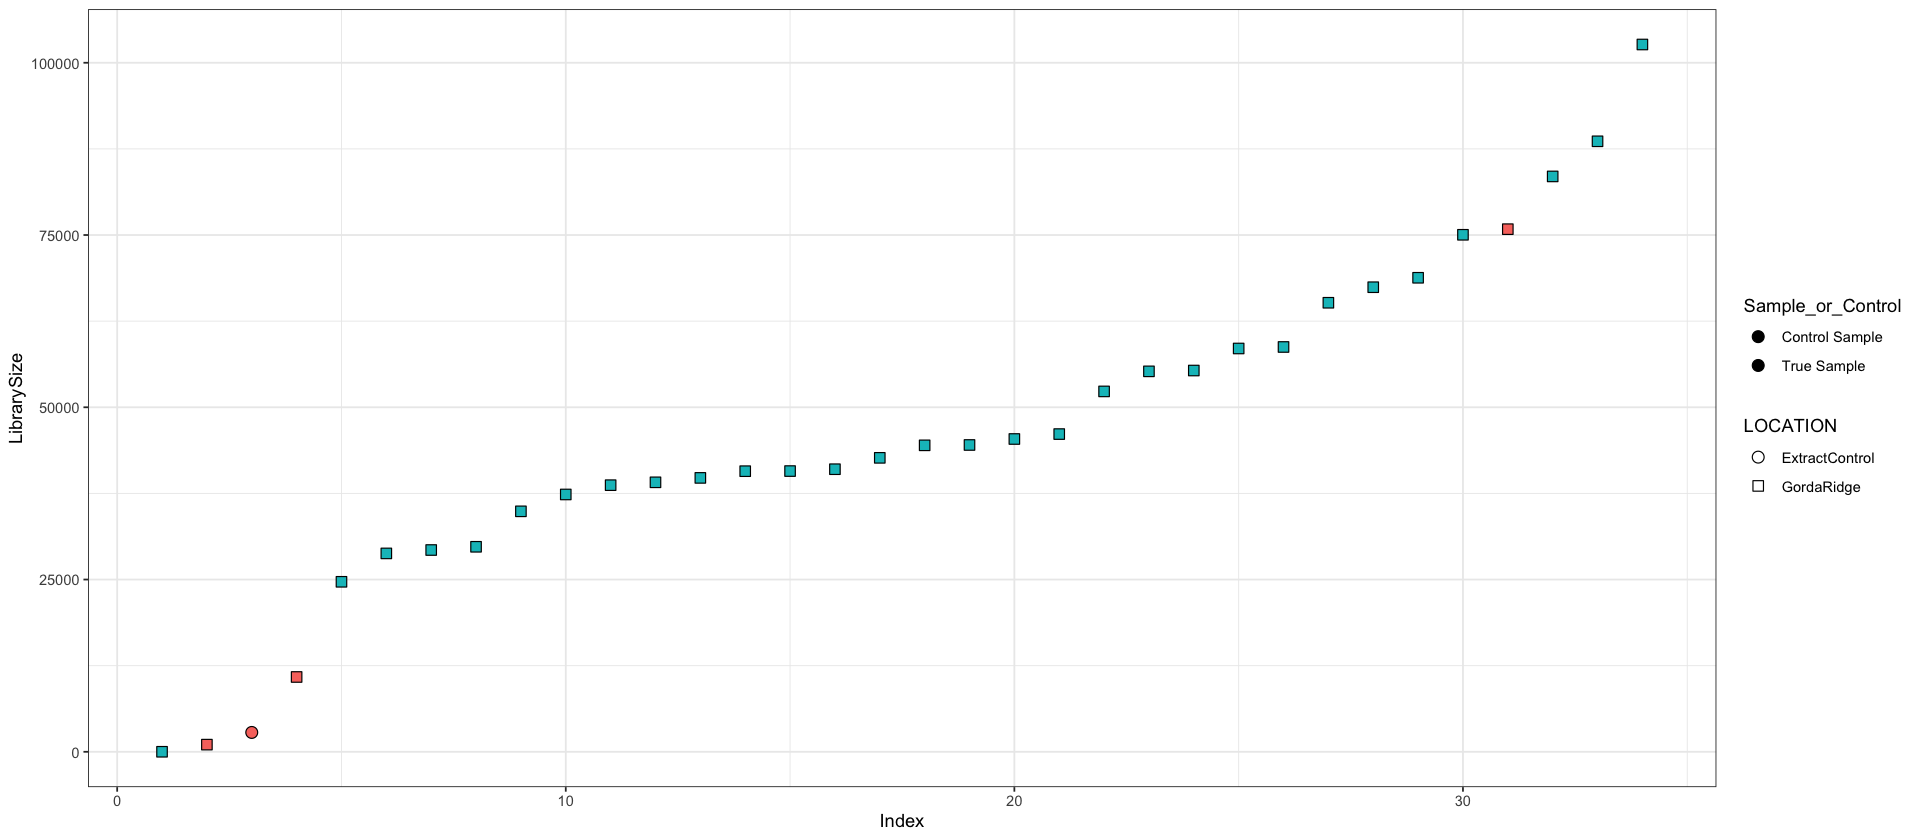

In [91]:
# Run decontam protocol
# Formatting: fix blank entries, widen data frame
GR_tagseq_counts$level2 <- sub("^$", "Unassigned", GR_tagseq_counts$level2) #Fill "blank" taxonomy assignments with "Unassigned"
# head(GR_tagseq_counts)
tmp <- GR_tagseq_counts[, c("Feature.ID", "SAMPLE", "COUNT")]
tmp$COUNT<-as.numeric(tmp$COUNT)
tmp_tax <- GR_tagseq_counts[, c("Taxon", "level1", "level2", "level3", "level4", "level5", "level6","Feature.ID", "SAMPLE", "COUNT")]
# head(tmp_tax)
asvtab <- dcast(tmp, Feature.ID ~ SAMPLE, fill = 0)
taxmat_tmp <- as.matrix(dcast(tmp_tax, Feature.ID+Taxon+level1+level2+level3+level4+level5+level6+level6~SAMPLE))
taxmat <- taxmat_tmp[, c("Taxon", "level1", "level2", "level3", "level4", "level5", "level6")]

# Set up data to be imported into phyloseq
# Rownames = feature.id
row.names(asvtab)<-asvtab$Feature.ID
# colnames(asvtab)
asvtab <- asvtab[2:35]
# head(asvtab); names(asvtab)
asvmat <- as.matrix(asvtab) #convert to matrix

# link up row names for each matrix
row.names(taxmat)<-row.names(asvmat)
# head(taxmat)
#
class(asvmat);class(taxmat)
# colnames(taxmat)
ASV = otu_table(asvmat, taxa_are_rows = TRUE) #phyloseq command
TAX = tax_table(taxmat)
physeq <- phyloseq(ASV, TAX)
physeq #Phyloseq object

# Include additional sample names
samplenames <- as.data.frame(colnames(asvtab))
# samplenames; head(asvtab)
colnames(samplenames)[1]<-"SAMPLE"

# Import metadata
ventnames <- read.delim("data-input/ventnames-gordaridge.txt")
# names(ventnames);head(ventnames)
# View(ventnames)
colnames(ventnames)[1]<-"SAMPLE"
#
samplenames_1 <- left_join(samplenames, ventnames)
# head(samplenames_1)
# View(samplenames_1)
row.names(samplenames_1)<-sample_names(physeq) 
samplenames_1 <- samplenames_1 %>% unite(LocationName_Sampletype, LocationName, Sampletype, sep = " ", remove = FALSE)

# Convert to phyloseq object
sampledata <- sample_data(samplenames_1); sampledata
# Merge with other data
physeq_names = merge_phyloseq(physeq, sampledata)
# physeq_names
# sample_data(physeq_names)

# Decontam:
physeq_names
# Check out library size of my data
df <- as.data.frame(sample_data(physeq_names))
df$LibrarySize <- sample_sums(physeq_names)
df <- df[order(df$LibrarySize),]
df$Index <- seq(nrow(df))
#
ggplot(data=df, aes(x=Index, y=LibrarySize, fill=Sample_or_Control, shape=LOCATION)) + 
  geom_point(color="black", size=3, aes(shape=LOCATION)) +
  scale_shape_manual(values = c(21,22,23)) +
  theme_bw()
# Shows that out of the 3 ship blanks I have, one of the sames has a pretty large library size, otherwise, control samples have very small library sizes.

# sample_data(physeq_names)
# assign negative control designation
sample_data(physeq_names)$is.neg <- sample_data(physeq_names)$Sample_or_Control == "Control Sample"

# ID contaminants
## Using Prevalence information
contamdf.prev <- isContaminant(physeq_names, method="prevalence", neg="is.neg", threshold = 0.5, normalize = TRUE) # 0.5 - this threshold will ID contaminants in all samples that are more prevalent in negative controls than in positive samplese
# ?isContaminant()
table(contamdf.prev$contaminant) # 34 seqs identified as contaminants
# which(contamdf.prev$contaminant)

# Make phyloseq object of presence-absence in negative controls and true samples
## change to presence absence
gr.pa <- transform_sample_counts(physeq_names, function(abund) 1*(abund>0))

# isolate PA of positive and negative samples
gr.pa.neg <- prune_samples(sample_data(gr.pa)$Sample_or_Control == "Control Sample", gr.pa)
gr.pa.pos <- prune_samples(sample_data(gr.pa)$Sample_or_Control == "True Sample", gr.pa)
                                 
                                 # Extracting contaminants:
table(contamdf.prev$contaminant) # 34 seqs identified as contaminants
# which(contamdf.prev$contaminant)
# head(contamdf.prev)

# Subset TRUE contaminants
contams <- subset(contamdf.prev, contaminant == "TRUE")
contams$Feature.ID <- row.names(contams)
# head(contams);dim(contams)
list_of_contams <- as.character(contams$Feature.ID)
#
# Explore taxa IDed as contaminants
taxa_list <- as.data.frame(taxmat)
taxa_list$Feature.ID <- row.names(taxa_list)
# head(taxa_list)
taxa_contams <- left_join(contams, taxa_list)
# write_delim(taxa_contams, path = "List-of-contaminant-ASVs.txt", delim = "\t")


# Plot total sequences and which are contaminants
# Remove contaminant and count sequence sums per sample to see which samples had the highest number of contamiant sequences removed.
# After remove contaminants, what % of sequences is removed?
# head(GR_tagseq_counts[1:2,])
GR_tagseq_counts$CONTAM <- "Pass"
# head(contams[1:2,])
# str(list_of_contams)
GR_tagseq_counts$CONTAM[GR_tagseq_counts$Feature.ID %in% list_of_contams] = "Fail"
# head(GR_tagseq_counts[1:2,])

# Make character list of all feature.ids to KEEP:
keep1<- subset(GR_tagseq_counts, CONTAM %in% "Pass")
# length(unique(keep1$Feature.ID))
keep_asvs <- as.character(unique(keep1$Feature.ID)) #see below
#
passfail <- GR_tagseq_counts %>%
  group_by(SAMPLE, CONTAM) %>%
  summarise(SUM_CONTAM = sum(COUNT)) %>%
  data.frame
# head(passfail[1:2,])
#
# names(ventnames);head(ventnames)
# View(ventnames)
# colnames(ventnames)[1]<-"SAMPLE"
#
passfail_wID <- left_join(passfail, ventnames, by = "SAMPLE")
# head(passfail_wID)

# Get number information:
# Total sequences:
# head(GR_tagseq_counts); sum(GR_tagseq_counts$COUNT) #1.57 million reads

# If we remove all the control samples:
# unique(GR_tagseq_counts$SAMPLEID)
GR_tagseq_counts_noCTRL <- subset(GR_tagseq_counts, !(SAMPLEID %in% "CTRL"))
sum(GR_tagseq_counts_noCTRL$COUNT) # 1.48 million reads

# Remove contaminants:
counts_decont <- subset(GR_tagseq_counts, !(Feature.ID %in% list_of_contams))
dim(GR_tagseq_counts); dim(counts_decont) #34 lines removed
# colnames(counts_decont)
100*(1-(sum(counts_decont$COUNT)/sum(GR_tagseq_counts_noCTRL$COUNT)))
# 1.24% of sequences was removed following decontam; this is counting the ship blank samples themselves

# Breakdown by samples:
# head(passfail)
passfail_wide <- dcast(passfail, SAMPLE ~ CONTAM)
passfail_wide$PercLossSeq <- paste(100*(passfail_wide$Fail/(passfail_wide$Fail+passfail_wide$Pass)))
# dim(passfail_wide)
# write.csv(passfail_wide, file="PercSeqLost-decontam.csv")
# breakdown by sample - reports % lost per sample

# Remove contaminant sequences from phyloseq object:
# Subset TRUE contaminants
# ?prune_taxa
# class(keep_asvs)
physeq_tmp <- prune_taxa(keep_asvs, physeq_names)
sample_data(physeq_tmp)

# Remove one sample with too few sequences
physeq_clean <- subset_samples(physeq_tmp, sample_names(physeq_tmp) !="GordaRidge_BSW020_sterivex_2019_REPa")
sample_data(physeq_clean)

# SAMPLE, LOCATION_SPECIFIC, LocationName
colnames(taxmat)

# Remove control samples from data frame
# head(GR_tagseq_counts)
tmp <- subset(GR_tagseq_counts, !(SAMPLEID %in% "CTRL")) # Remove controls, get list of sample names that are controls
samples_keep <- as.character(unique(tmp$SAMPLE))
physeq_clean_true <- prune_samples(samples_keep, physeq_clean)
#

                                 

# Save as R Data
# save(counts_decont, file="GR-ASV-table-clean-26-02-2020.RData")

In [92]:
physeq_clean_true

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9141 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9141 taxa by 7 taxonomic ranks ]

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



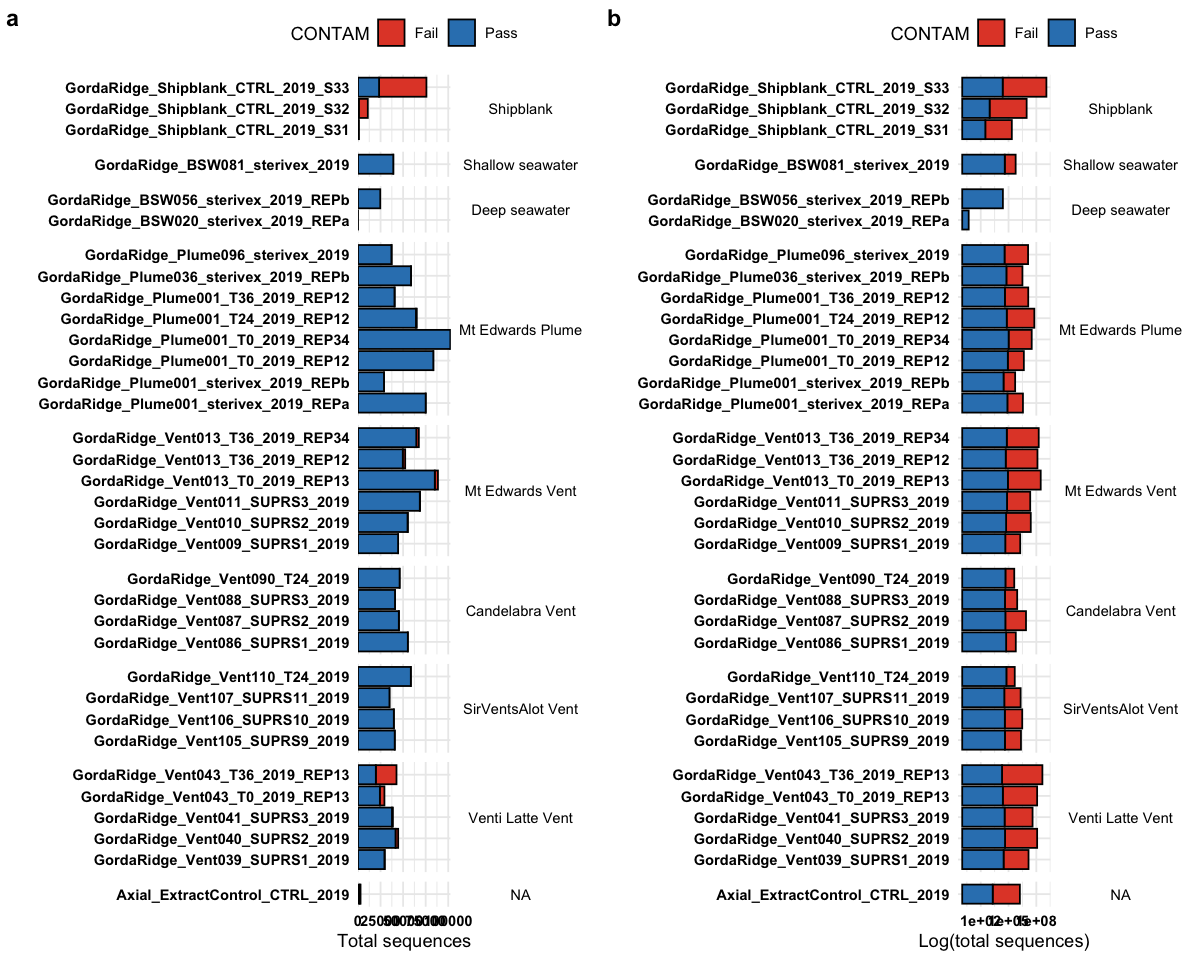

In [93]:
# Supplementary table to show sequence//ASV decontamination removal
options(repr.plot.width = 10, repr.plot.height = 8)

locations <- c("", "Shipblank","Shallow seawater", "Deep seawater", "Mt Edwards Plume", "Mt Edwards Vent", "Candelabra Vent", "SirVentsAlot Vent", "Venti Latte Vent")
passfail_wID$LOCATION_ORDER <- factor(passfail_wID$LocationName, levels = locations)
#
contam_plot <- ggplot(passfail_wID, aes(x=SAMPLE, y=SUM_CONTAM, fill=CONTAM))+
  geom_bar(stat = "identity", color="black")+
  scale_fill_manual(values = c("#e34a33", "#3182bd"))+
  coord_flip()+
  labs(x="", y="Total sequences")+
  theme_minimal()+
  theme(legend.position = "top", strip.text.y = element_text(angle=0, color="black"), axis.text = element_text(color="black", face="bold"))+
  scale_y_continuous(expand=c(0,0))+
  facet_grid(LOCATION_ORDER~., scales = "free", space="free")
# svg("GR-seq-contamination-breakdown.svg",w=13,h=6)
plot_grid(contam_plot, contam_plot+scale_y_log10()+labs(y="Log(total sequences)"), labels = c("a", "b"))
# dev.off()

## Plot high level taxonomy of protists in situ

In [6]:
load("data-input/GR-ASV-table-clean-26-02-2020.RData", verbose=TRUE) # after decontam clenaing
head(counts_decont)
#
gr_counts <- subset(counts_decont, COUNT > 0 & DATASET %in% "GordaRidge")
# head(gr_counts)
gr_counts$level2 <- sub("^$", "Unassigned", gr_counts$level2)
# head(gr_counts[1:3,])
#
# Import metadata for sample names & Join
ventnames <- read.delim("data-input/ventnames-gordaridge.txt")
names(ventnames)
colnames(ventnames)[1]<-"SAMPLE"
gr_counts_name <- left_join(gr_counts, ventnames[c(1,3,5:6)])
gr_counts_name$LocationName[gr_counts_name$LOCATION == "Shipblank"]="Shipblank"

Loading objects:
  counts_decont


DATASET LOCATION       SAMPLEID YEAR REP Feature.ID                      
87172 Axial   ExtractControl CTRL     2019     2fa21026b4047e354f119a43c0341a65
87273 Axial   ExtractControl CTRL     2019     01d46e90107929f3903e4b5bff58a630
88999 Axial   ExtractControl CTRL     2019     6d4984d3004dc93a767b711fce76c22a
89193 Axial   ExtractControl CTRL     2019     7f345942b109d8107ed8748e752b3b67
90196 Axial   ExtractControl CTRL     2019     7ba8f74df1b3dcb5c010795eb26bac7f
90635 Axial   ExtractControl CTRL     2019     5a2177bb7499febc60184a6a15dd3a9c
      Taxon                                                                                       
87172 Eukaryota;Opisthokonta                                                                      
87273 Eukaryota                                                                                   
88999 Eukaryota                                                                                   
89193 Eukaryota;Opisthokonta;Metazoa;Rotifera;Rotifera_X;Rotifera_XX;Rotaria;Rotaria_rotatoria;   
90196 Eukaryota;Archaeplastida;Streptophyta;Embryophyceae;Embryophyceae_X;Embryophyceae_XX        
90635 Eukaryota;Alveolata;Ciliophora;Oligohymenophorea;Scuticociliatia_2;Pleuronematida;Pleuronema
      Confidence level1    level2         level3       level4           
87172 0.7041164  Eukaryota Opisthokonta                                 
87273 1.0000000  Eukaryota Unassigned                                   
88999 1.0000000  Eukaryota Unassigned                                   
89193 0.8935792  Eukaryota Opisthokonta   Metazoa      Rotifera         
90196 0.9998972  Eukaryota Archaeplastida Streptophyta Embryophyceae    
90635 0.9484855  Eukaryota Alveolata      Ciliophora   Oligohymenophorea
      level5            level6           level7                    
87172                                                              
87273                                                              
88999                                                              
89193 Rotifera_X        Rotifera_XX      Rotaria;Rotaria_rotatoria;
90196 Embryophyceae_X   Embryophyceae_XX                           
90635 Scuticociliatia_2 Pleuronematida   Pleuronema                
      SAMPLE                         COUNT CONTAM
87172 Axial_ExtractControl_CTRL_2019 1520  Pass  
87273 Axial_ExtractControl_CTRL_2019   31  Pass  
88999 Axial_ExtractControl_CTRL_2019   96  Pass  
89193 Axial_ExtractControl_CTRL_2019   81  Pass  
90196 Axial_ExtractControl_CTRL_2019   39  Pass  
90635 Axial_ExtractControl_CTRL_2019   30  Pass

[1] "SAMPLENAME"        "LOCATION"          "LOCATION_SPECIFIC"
[4] "SAMPLEID"          "Sampletype"        "LocationName"     
[7] "Sample_or_Control" "Sample_or_BSW"

Joining, by = "SAMPLE"



In [7]:
unique(gr_counts_name$level3)

[1] Metazoa             Ciliophora          Fungi              
 [4] Ochrophyta          Dinoflagellata                         
 [7] Sagenista           Haptophyta          Radiolaria         
[10] Chlorophyta         Cryptophyta         Choanoflagellida   
[13] Picozoa             Katablepharidophyta Pseudofungi        
[16] Telonemia           Hilomonadea         Stramenopiles_X    
[19] Streptophyta        Apicomplexa         Opalozoa           
[22] Cercozoa            Metamonada          Discoba            
[25] Lobosa              Alveolata_X         Apusomonadidae     
[28] Perkinsea           Breviatea           Opisthokonta_X     
[31] Centroheliozoa     
32 Levels:  Alveolata_X Apicomplexa Apusomonadidae Breviatea ... Telonemia

In [8]:
# # Revise & explore taxonomy
# # hist(gr_counts_name$COUNT)
# # hist(log(gr_counts_name$COUNT))
# #
pr2_rename_taxa_w2<-function(split){
  split$Taxa<-"Unassigned"
  split$Taxa[split$level2 == ""]="No best hit"
  split$Taxa[split$level2 == "Alveolata"]="Alveolata-Other"
  split$Taxa[split$level3 == "Ciliophora"]="Alveolata-Ciliates"
  split$Taxa[split$level3 == "Dinoflagellata"]="Alveolata-Dinoflagellates"
  split$Taxa[split$level4 == "Syndiniales"] = "Alveolata-Syndiniales"
  # split$Taxa[split$level3 == "Apicomplexa"]="Alveolata-Apicomplexa"
  split$Taxa[split$level2 == "Hacrobia"]="Hacrobia-Other"
  split$Taxa[split$level3 == "Cryptophyta"]="Hacrobia-Cryptophyta"
  split$Taxa[split$level3 == "Haptophyta"]="Hacrobia-Haptophyta"
  # split$Taxa[split$level3 == "Katablepharidophyta"]="Hacrobia-Katablepharidophyta"
  # split$Taxa[split$level3 == "Telonemia"]="Hacrobia-Telonemia"
  split$Taxa[split$level2 == "Opisthokonta"]="Opisthokonta-Other"
  split$Taxa[split$level3 == "Fungi"]="Opisthokonta-Fungi"
  split$Taxa[split$level3 == "Metazoa"]="Opisthokonta-Metazoa"
  split$Taxa[split$level2 == "Stramenopiles"]="Stramenopiles-Other"
  split$Taxa[split$level3 == "Ochrophyta"]="Stramenopiles-Ochrophyta"
  mast <- unique(filter(gr_counts_name, grepl("MAST", level4)) %>% select(level4))
  mast_list <- as.character(mast$level4)
  split$Taxa[split$level4 %in% mast_list]="Stramenopiles-MAST"
  # split$Taxa[split$level3 == "Pseudofungi"]="Stramenopiles-Pseudofungi"
  # split$Taxa[split$level3 == "Sagenista"]="Stramenopiles-Sagenista"
  #
  split$Taxa[split$level2 == "Archaeplastida"]="Archaeplastida-Other"
  split$Taxa[split$level3 == "Chlorophyta"]="Archaeplastida-Chlorophyta"
  # split$Taxa[split$level3 == "Streptophyta"]="Archaeplastida-Streptophyta"
  #
  split$Taxa[split$level2 == "Excavata"]="Excavata"
  # split$Taxa[split$level3 == "Metamonada"]="Excavata-Metamonada"
  #
  split$Taxa[split$level2 == "Amoebozoa"]="Amoebozoa"
  # split$Taxa[split$level3 == "Lobosa"]="Amoebozoa-Lobosa"
  #
  split$Taxa[split$level2 == "Rhizaria"]="Rhizaria-other"
  split$Taxa[split$level3 == "Cercozoa"]="Rhizaria-Cercozoa"
  return(split)
}

gr_counts_wtax <- pr2_rename_taxa_w2(gr_counts_name)
head(gr_counts_wtax)
unique(gr_counts_wtax$Taxa)

DATASET    LOCATION SAMPLEID YEAR REP Feature.ID                      
1 GordaRidge Vent090  T24      2019     d1556173c68ab8e2aff268e351965276
2 GordaRidge Vent090  T24      2019     ffa3237237107b5e385a22e6a3b0c5da
3 GordaRidge Vent090  T24      2019     bae2052f4e06fa7e85bd9ca8000061ea
4 GordaRidge Vent090  T24      2019     1ec57dbba9f08644c82c8993cc0be047
5 GordaRidge Vent090  T24      2019     6d79dda1be8786b3376d5968384f7e74
6 GordaRidge Vent090  T24      2019     99ba81c88f63f83daf290add3918d38b
  Taxon                                                                                                             
1 Eukaryota;Opisthokonta;Metazoa;Annelida;Annelida_X;Annelida_XX;Paralvinella;Paralvinella_sulfincola;              
2 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
3 Eukaryota;Opisthokonta;Fungi;Basidiomycota;Pucciniomycotina;Microbotryomycetes                                    
4 Eukaryota;Alveolata;Ciliophora;Spirotrichea;Strombidiida;Tontoniidae_A;Spirotontonia;Spirotontonia_grandis;       
5 Eukaryota;Opisthokonta;Fungi                                                                                      
6 Eukaryota;Stramenopiles;Ochrophyta;Pelagophyceae;Pelagomonadales;Pelagomonadaceae                                 
  Confidence level1    level2        ⋯ level5           level6            
1 0.9998769  Eukaryota Opisthokonta  ⋯ Annelida_X       Annelida_XX       
2 0.8696720  Eukaryota Alveolata     ⋯ Heterotrichea_X  Folliculinidae    
3 0.9998153  Eukaryota Opisthokonta  ⋯ Pucciniomycotina Microbotryomycetes
4 0.8835951  Eukaryota Alveolata     ⋯ Strombidiida     Tontoniidae_A     
5 0.7477629  Eukaryota Opisthokonta  ⋯                                    
6 0.9865985  Eukaryota Stramenopiles ⋯ Pelagomonadales  Pelagomonadaceae  
  level7                                 SAMPLE                      COUNT
1 Paralvinella;Paralvinella_sulfincola;  GordaRidge_Vent090_T24_2019   65 
2 Folliculinidae_X;Folliculinidae_X_sp.; GordaRidge_Vent090_T24_2019  241 
3                                        GordaRidge_Vent090_T24_2019    7 
4 Spirotontonia;Spirotontonia_grandis;   GordaRidge_Vent090_T24_2019   24 
5                                        GordaRidge_Vent090_T24_2019 5884 
6                                        GordaRidge_Vent090_T24_2019 2053 
  CONTAM LOCATION_SPECIFIC Sampletype LocationName    Taxa                    
1 Pass   Vent090           Grazing    Candelabra Vent Opisthokonta-Metazoa    
2 Pass   Vent090           Grazing    Candelabra Vent Alveolata-Ciliates      
3 Pass   Vent090           Grazing    Candelabra Vent Opisthokonta-Fungi      
4 Pass   Vent090           Grazing    Candelabra Vent Alveolata-Ciliates      
5 Pass   Vent090           Grazing    Candelabra Vent Opisthokonta-Fungi      
6 Pass   Vent090           Grazing    Candelabra Vent Stramenopiles-Ochrophyta

[1] "Opisthokonta-Metazoa"       "Alveolata-Ciliates"        
 [3] "Opisthokonta-Fungi"         "Stramenopiles-Ochrophyta"  
 [5] "Alveolata-Dinoflagellates"  "Unassigned"                
 [7] "Opisthokonta-Other"         "Stramenopiles-MAST"        
 [9] "Hacrobia-Haptophyta"        "Rhizaria-other"            
[11] "Archaeplastida-Other"       "Archaeplastida-Chlorophyta"
[13] "Stramenopiles-Other"        "Hacrobia-Cryptophyta"      
[15] "Hacrobia-Other"             "Alveolata-Syndiniales"     
[17] "Alveolata-Other"            "Rhizaria-Cercozoa"         
[19] "Excavata"                   "Amoebozoa"

In [9]:
# Remove control - blank samples.
gr_counts_wtax_samplesonly <- subset(gr_counts_wtax, !(Sampletype == "control"))

## To average across replicates, modify SUPR sample names
gr_counts_filter <- gr_counts_wtax_samplesonly
gr_counts_filter$SAMPLEID<- sub("SUPRS9", "SUPR", gr_counts_filter$SAMPLEID)
gr_counts_filter$SAMPLEID<- sub("SUPRS11", "SUPR", gr_counts_filter$SAMPLEID)
gr_counts_filter$SAMPLEID<- sub("SUPRS10", "SUPR", gr_counts_filter$SAMPLEID)
gr_counts_filter$SAMPLEID<- sub("SUPRS2", "SUPR", gr_counts_filter$SAMPLEID)
gr_counts_filter$SAMPLEID<- sub("SUPRS3", "SUPR", gr_counts_filter$SAMPLEID)
gr_counts_filter$SAMPLEID<- sub("SUPRS1", "SUPR", gr_counts_filter$SAMPLEID)

# Average across replicates
colnames(gr_counts_filter)
gr_counts_avg_wtax <- gr_counts_filter %>%
  group_by(Feature.ID, SAMPLEID, Sampletype,  LOCATION_SPECIFIC, LocationName, Taxon, level1, level2, level3, level4, level5, level6, level7, Taxa) %>%
  summarise(COUNT_AVG = mean(COUNT)) %>%
  as.data.frame
# dim(gr_counts_filter);dim(gr_counts_avg_wtax)
head(gr_counts_avg_wtax)
# unique(gr_counts_avg_wtax$Taxa)

# save(gr_counts_filter,gr_counts_wtax, gr_counts_avg_wtax, file="data-input/GordaRidge-ASVtable-avg-22-07-2020.RData")

[1] "DATASET"           "LOCATION"          "SAMPLEID"         
 [4] "YEAR"              "REP"               "Feature.ID"       
 [7] "Taxon"             "Confidence"        "level1"           
[10] "level2"            "level3"            "level4"           
[13] "level5"            "level6"            "level7"           
[16] "SAMPLE"            "COUNT"             "CONTAM"           
[19] "LOCATION_SPECIFIC" "Sampletype"        "LocationName"     
[22] "Taxa"

`summarise()` regrouping output by 'Feature.ID', 'SAMPLEID', 'Sampletype', 'LOCATION_SPECIFIC', 'LocationName', 'Taxon', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 'level7' (override with `.groups` argument)



Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG
1 Unassigned           80       
2 Unassigned           36       
3 Unassigned           12       
4 Unassigned           34       
5 Unassigned           15       
6 Opisthokonta-Metazoa 21

In [10]:
# Sum to curated taxa level

## Average across all replicates samples
gr_counts_avg_TAXA <- gr_counts_filter %>%
    # average across replicates
    group_by(Feature.ID, SAMPLEID, Sampletype, LocationName, Taxon, level1, level2, level3, level4, level5, level6, level7, Taxa) %>%
    summarise(COUNT_AVG = mean(COUNT)) %>%
    ungroup() %>% 
    # sum by like taxa
    group_by(SAMPLEID, Sampletype, LocationName, Taxa) %>% 
    summarise(SUM = sum(COUNT_AVG)) %>% 
    unite(SAMPLE, LocationName, Sampletype, SAMPLEID, sep = "-", remove = FALSE) %>% 
    data.frame
head(gr_counts_avg_TAXA)

`summarise()` regrouping output by 'Feature.ID', 'SAMPLEID', 'Sampletype', 'LocationName', 'Taxon', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 'level7' (override with `.groups` argument)

`summarise()` regrouping output by 'SAMPLEID', 'Sampletype', 'LocationName' (override with `.groups` argument)



SAMPLE                         SAMPLEID Sampletype LocationName 
1 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
2 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
3 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
4 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
5 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
6 Deep seawater-in situ-sterivex sterivex in situ    Deep seawater
  Taxa                       SUM 
1 Alveolata-Ciliates         2416
2 Alveolata-Dinoflagellates  4969
3 Alveolata-Other              22
4 Alveolata-Syndiniales        50
5 Archaeplastida-Chlorophyta   31
6 Archaeplastida-Other        616

In [11]:
# Factor for plotting:
# unique(gr_counts_avg_TAXA$Taxa)
level2ORDER <- c("Alveolata-Ciliates","Alveolata-Dinoflagellates","Alveolata-Syndiniales","Alveolata-Other","Rhizaria-Cercozoa","Rhizaria-other","Stramenopiles-MAST","Stramenopiles-Ochrophyta","Stramenopiles-Other","Hacrobia-Cryptophyta","Hacrobia-Haptophyta","Hacrobia-Other","Amoebozoa","Excavata","Archaeplastida-Chlorophyta","Archaeplastida-Other","Opisthokonta-Fungi","Opisthokonta-Metazoa","Opisthokonta-Other","Unassigned")
level2color <- c("#f1eef6","#d7b5d8","#df65b0","#ce1256","#800026","#e31a1c","#fff7bc","#fec44f","#d95f0e","#c7e9b4","#7fcdbb","#41b6c4","#084081","#2b8cbe","#238443","#78c679","#cbc9e2","#9e9ac8","#756bb1","#54278f")
gr_counts_avg_TAXA$LEVEL2ORDER <- factor(gr_counts_avg_TAXA$Taxa, levels=level2ORDER)
names(level2color)<-level2ORDER

# Factor experiment
# unique(gr_counts_avg_TAXA$SAMPLEID)
exporder <- c("sterivex", "SUPR", "T0", "T24", "T36")
gr_counts_avg_TAXA$SAMPLEID_ORDER <- factor(gr_counts_avg_TAXA$SAMPLEID, levels = exporder)
gr_counts_avg_TAXA$LOCATION_ORDER <- factor(gr_counts_avg_TAXA$LocationName, levels=c("Shallow seawater", "Deep seawater", "Mt Edwards Plume", "Mt Edwards Vent", "Venti Latte Vent", "Candelabra Vent", "SirVentsAlot Vent"))
#
# head(gr_counts_avg_TAXA[1:2,])

In [12]:
barplot_lev2 <- function(df){
  ggplot(df, aes(x=SAMPLE, y=SUM, fill=LEVEL2ORDER)) +
    geom_bar(stat="identity", position="fill", color="black") +
    scale_fill_manual(values=level2color) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Relative abundance")+
    facet_grid(.~LOCATION_ORDER, space = "free", scales = "free")
}

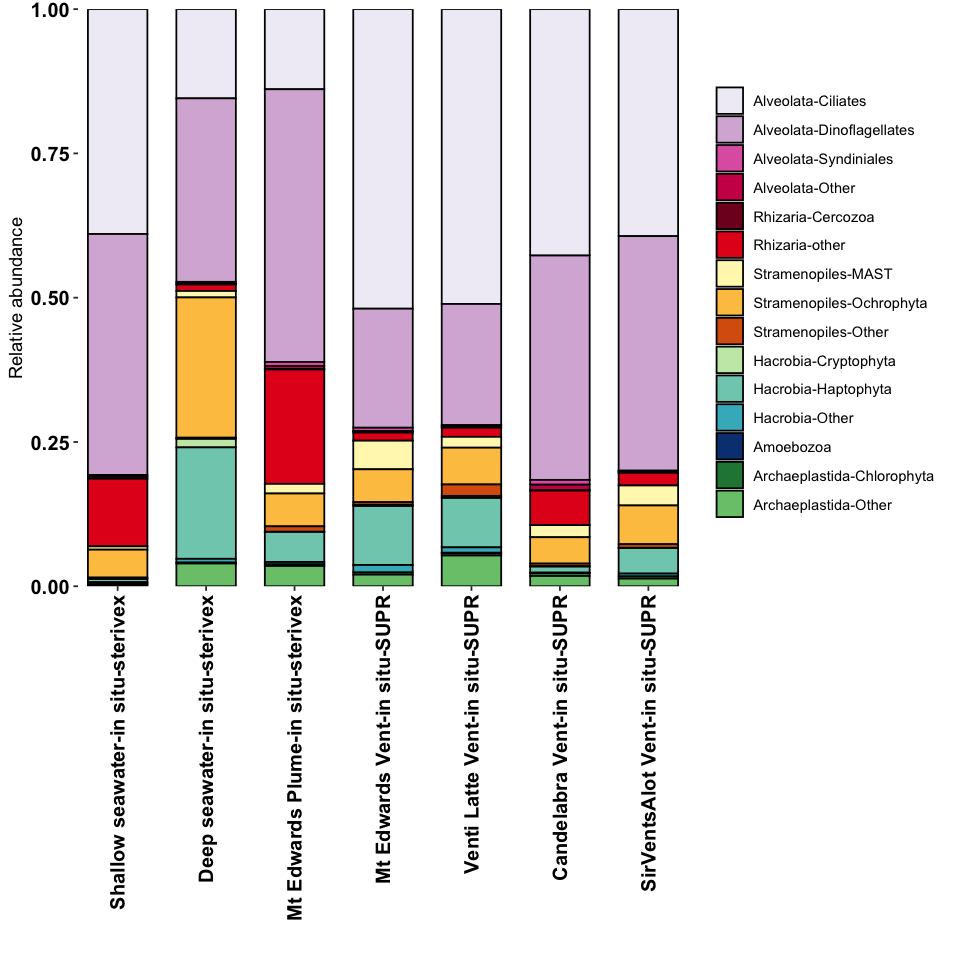

In [13]:
# Figure generatation
options(repr.plot.width = 8, repr.plot.height = 8)

insitu <- c("sterivex", "SUPR")
rm <- c("Unassigned", "Opisthokonta-Other", "Opisthokonta-Fungi", "Opisthokonta-Metazoa")

# svg("GR-insitu-tax.svg", w = 8, h = 8)
barplot_lev2(filter(gr_counts_avg_TAXA, (SAMPLEID %in% insitu & !(Taxa %in% rm))))
# dev.off()

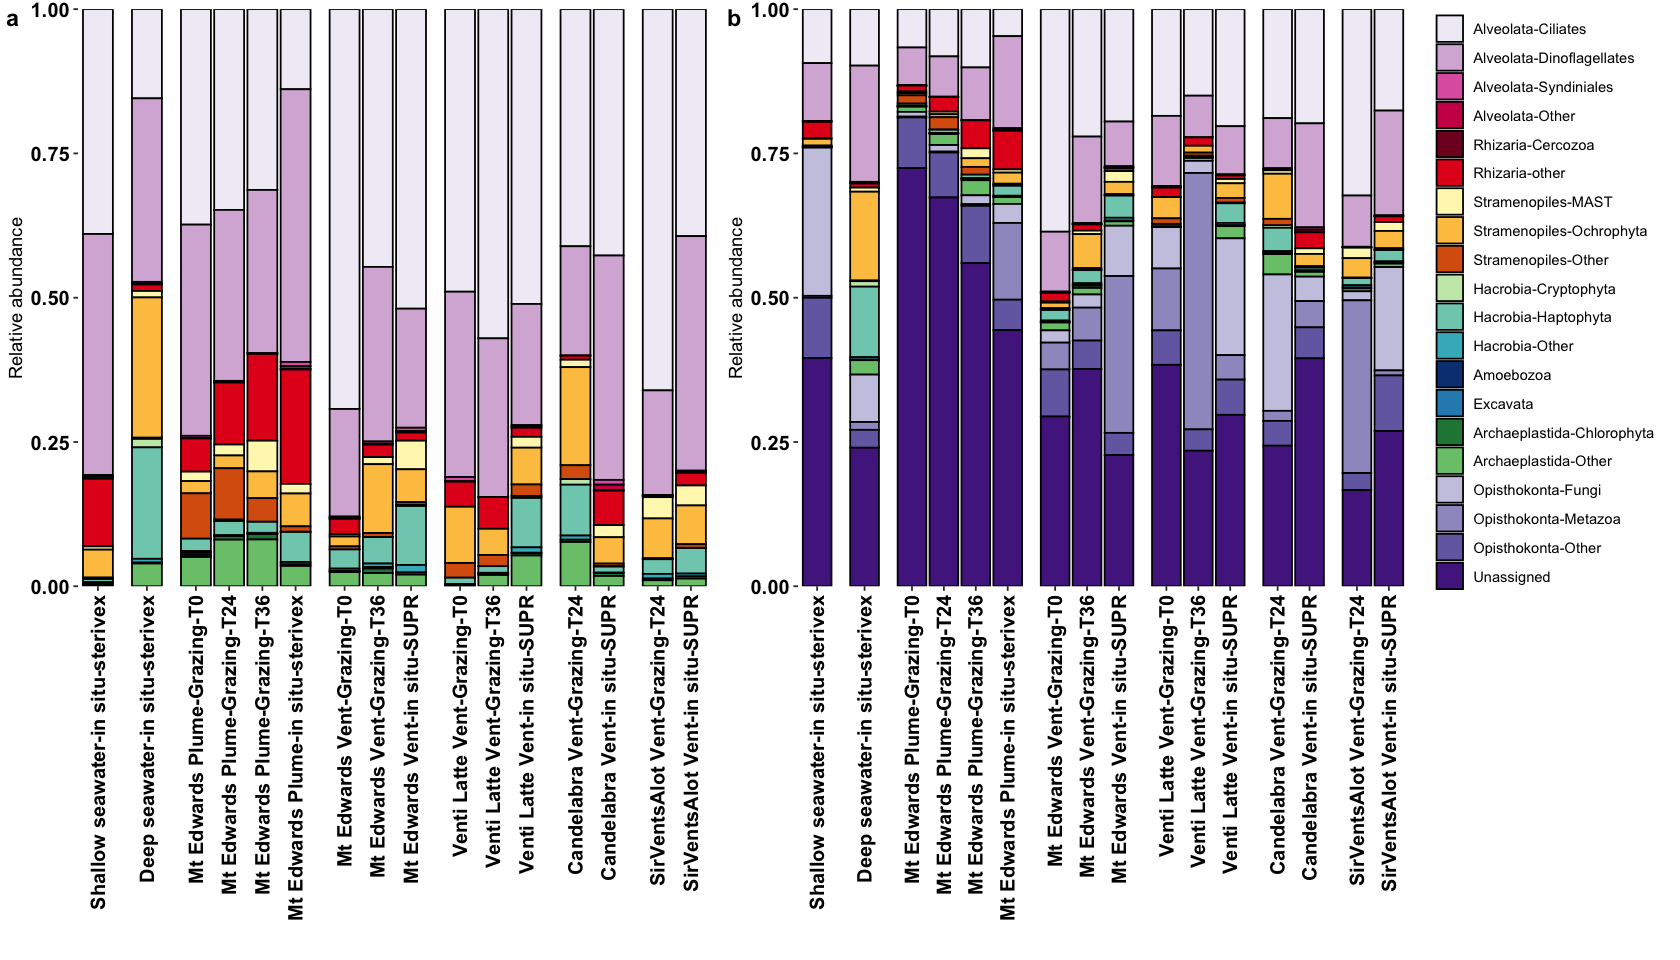

In [14]:
# Figure generation
options(repr.plot.width = 14, repr.plot.height = 8)

insitu <- c("sterivex", "SUPR")
rm <- c("Unassigned", "Opisthokonta-Other", "Opisthokonta-Fungi", "Opisthokonta-Metazoa")

# svg("GR-all-tax-supplementary.svg", w = 14, h = 8)
plot_grid(
    barplot_lev2(filter(gr_counts_avg_TAXA, !(Taxa %in% rm))) + theme(legend.position = "none"),
        barplot_lev2(filter(gr_counts_avg_TAXA)),
        ncol = 2, rel_widths = c(0.75,1), labels = c("a", "b"))
# dev.off()

## Ordination analysis - PCoA

In [15]:
load("data-input/GordaRidge-ASVtable-avg-22-07-2020.RData")
library(reshape2); 
library(vegan); 
library(dplyr)
library(ade4); 
library(compositions); 
library(tidyverse)
library(purrr)
library(cluster)
library(RColorBrewer)
library(ape)

# Remove controls
gr_counts_allsamples <- subset(counts_decont, !(SAMPLEID == "CTRL"))
gr_nums <- gr_counts_allsamples[, c("Feature.ID", "SAMPLE", "COUNT")]
tax <- gr_counts_allsamples[, c("Feature.ID", "Taxon")]
unique(gr_nums$SAMPLE)
gr_nums_filter <- subset(gr_nums, !(SAMPLE == "GordaRidge_BSW020_sterivex_2019_REPa"))
gr_nums_wide <- dcast(gr_nums_filter, Feature.ID~SAMPLE, fill=0)
row.names(gr_nums_wide)<-gr_nums_wide$Feature.ID; gr_nums_wide$Feature.ID<-NULL

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6

Warning message:
“package ‘ade4’ was built under R version 3.6.2”
Loading required package: tensorA


Attaching package: ‘tensorA’


The following object is masked from ‘package:base’:

    norm


Loading required package: robustbase

Loading required package: bayesm

Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, scale, scale.default



Attaching package: ‘ape’


The following object is masked from ‘package:compositions’:

    balance




[1] "GordaRidge_Vent090_T24_2019"           
 [2] "GordaRidge_BSW020_sterivex_2019_REPa"  
 [3] "GordaRidge_BSW056_sterivex_2019_REPb"  
 [4] "GordaRidge_BSW081_sterivex_2019"       
 [5] "GordaRidge_Plume001_sterivex_2019_REPa"
 [6] "GordaRidge_Plume001_sterivex_2019_REPb"
 [7] "GordaRidge_Plume001_T0_2019_REP12"     
 [8] "GordaRidge_Plume001_T0_2019_REP34"     
 [9] "GordaRidge_Plume001_T24_2019_REP12"    
[10] "GordaRidge_Plume001_T36_2019_REP12"    
[11] "GordaRidge_Plume036_sterivex_2019_REPb"
[12] "GordaRidge_Plume096_sterivex_2019"     
[13] "GordaRidge_Vent009_SUPRS1_2019"        
[14] "GordaRidge_Vent010_SUPRS2_2019"        
[15] "GordaRidge_Vent011_SUPRS3_2019"        
[16] "GordaRidge_Vent013_T0_2019_REP13"      
[17] "GordaRidge_Vent013_T36_2019_REP12"     
[18] "GordaRidge_Vent013_T36_2019_REP34"     
[19] "GordaRidge_Vent039_SUPRS1_2019"        
[20] "GordaRidge_Vent040_SUPRS2_2019"        
[21] "GordaRidge_Vent041_SUPRS3_2019"        
[22] "GordaRidge_Vent043_T0_2019_REP13"      
[23] "GordaRidge_Vent043_T36_2019_REP13"     
[24] "GordaRidge_Vent086_SUPRS1_2019"        
[25] "GordaRidge_Vent087_SUPRS2_2019"        
[26] "GordaRidge_Vent088_SUPRS3_2019"        
[27] "GordaRidge_Vent105_SUPRS9_2019"        
[28] "GordaRidge_Vent106_SUPRS10_2019"       
[29] "GordaRidge_Vent107_SUPRS11_2019"       
[30] "GordaRidge_Vent110_T24_2019"

Using COUNT as value column: use value.var to override.



In [38]:
#
# With this data, Jaccard was found to be the most appropriate.
## Jaccard distance estimate will also prioritize precense/absence between samples
## and consider rare taxa - which in the case of evaluating resident vs. 
## ubiqutious populations is appropriate.

# Jaccard distance
jac_gr_mat <- vegdist(t(gr_nums_wide), method = "jaccard")

# PCoA
pcoa_jac_gr <- pcoa(jac_gr_mat)

PCaxis PercVar   
1 1      0.11270615
2 2      0.08524318
3 3      0.07306333
4 4      0.06505124

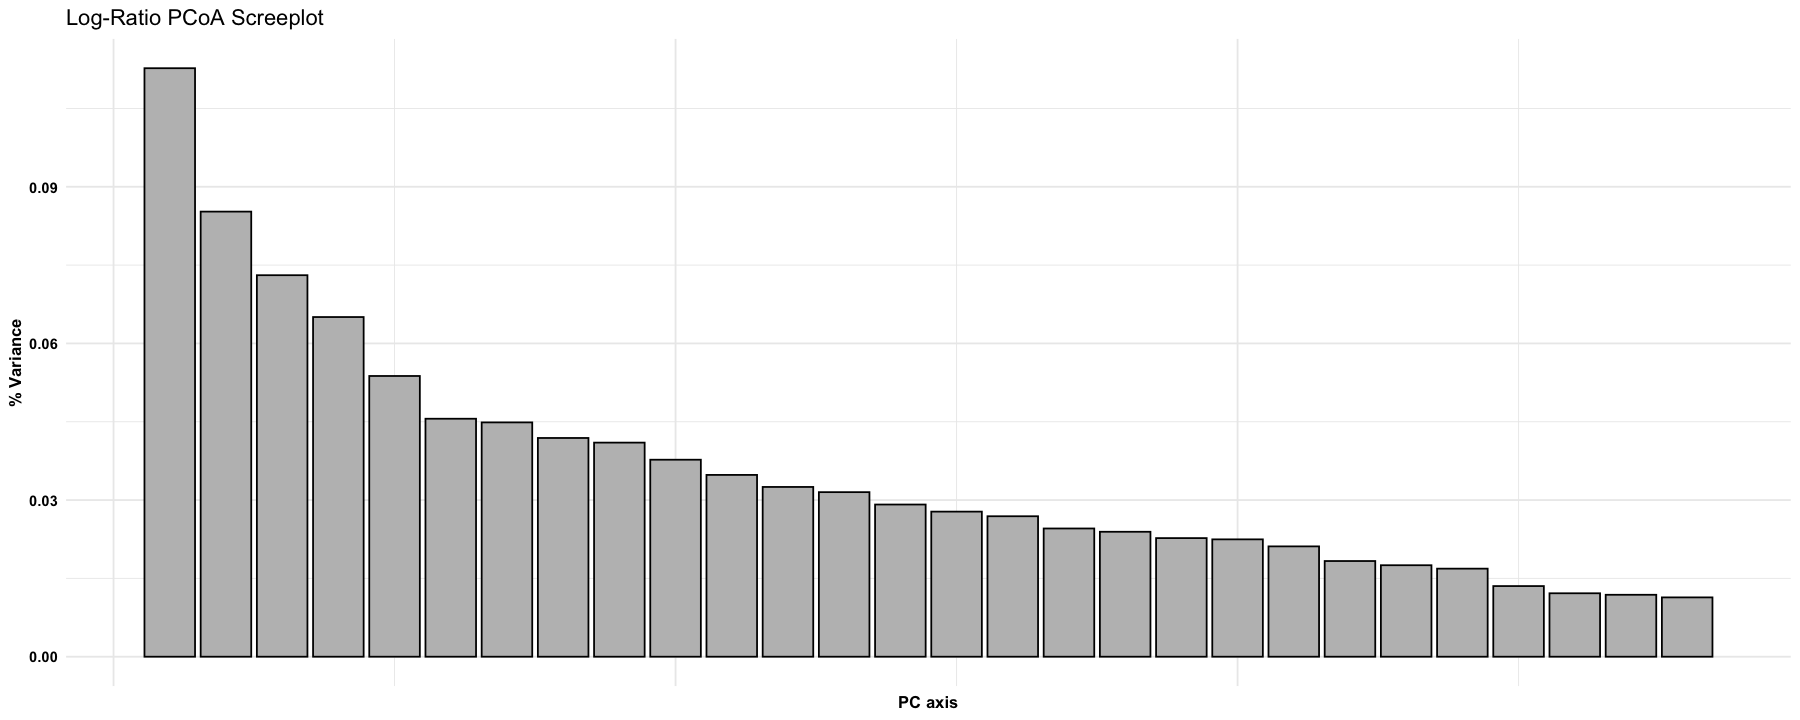

In [39]:
# Extract variances from pcoa, from jaccard calculated dist. metric
jac_var_gr <- data.frame(pcoa_jac_gr$values$Relative_eig) %>% 
  select(PercVar = 'pcoa_jac_gr.values.Relative_eig') %>% 
  rownames_to_column(var = "PCaxis") %>% 
  data.frame
head(jac_var_gr[1:4,]) #Look at first 4 axes

# Screeplot check
ggplot(jac_var_gr, aes(x = as.numeric(PCaxis), y = PercVar)) + 
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  theme_minimal() +
  theme(axis.title = element_text(color = "black", face = "bold", size = 10),
        axis.text.y = element_text(color = "black", face = "bold"),
        axis.text.x = element_blank()) +
  labs(x = "PC axis", y = "% Variance", title = "Log-Ratio PCoA Screeplot")

In [40]:
# We want to show data in 2 axes - 
jac_nmds_gr<-metaMDS(jac_gr_mat,k=2,autotransform=FALSE)
jac_nmds_gr$stress

Run 0 stress 0.1774623 
Run 1 stress 0.2173477 
Run 2 stress 0.2207176 
Run 3 stress 0.1667834 
... New best solution
... Procrustes: rmse 0.08064961  max resid 0.3890372 
Run 4 stress 0.1667834 
... New best solution
... Procrustes: rmse 8.293832e-05  max resid 0.0002647042 
... Similar to previous best
Run 5 stress 0.1636427 
... New best solution
... Procrustes: rmse 0.1173663  max resid 0.415304 
Run 6 stress 0.1667834 
Run 7 stress 0.1808233 
Run 8 stress 0.1636427 
... New best solution
... Procrustes: rmse 6.25175e-06  max resid 2.010123e-05 
... Similar to previous best
Run 9 stress 0.1774623 
Run 10 stress 0.2102702 
Run 11 stress 0.1667835 
Run 12 stress 0.2276096 
Run 13 stress 0.1667834 
Run 14 stress 0.2102701 
Run 15 stress 0.2085009 
Run 16 stress 0.1774623 
Run 17 stress 0.1755825 
Run 18 stress 0.1636427 
... Procrustes: rmse 6.175518e-06  max resid 1.45034e-05 
... Similar to previous best
Run 19 stress 0.2210788 
Run 20 stress 0.1667834 
*** Solution reached


[1] 0.1636427

In [46]:
# jac_nmds_gr$points #Extract points from NMDS

ventnames <- read.delim("data-input/ventnames-gordaridge.txt")
# names(ventnames);head(ventnames)
colnames(ventnames)[1]<-"SAMPLE"

jac_nmds_df <- data.frame(jac_nmds_gr$points) %>% 
    rownames_to_column(var = "SAMPLE") %>% 
    separate(SAMPLE, into = c("DATASET", "LOCATION_SPECIFIC", "SAMPLEID", "YEAR", "REP"), sep = "_", remove = FALSE) %>% 
    left_join(ventnames) %>% 
    data.frame

# Factoring
sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
sample_color <-c("lightblue","#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "orange", "yellow")
jac_nmds_df$SAMPLE_ORDER <- factor(jac_nmds_df$LocationName, levels = rev(sample_order))
names(sample_color)<-sample_order
head(jac_nmds_df)

# ## Plotting euclidean distance NMDS
# ggplot(jac_nmds_df, aes(x = MDS1, y = MDS2, fill = TimeofDay)) +
#   geom_point(size = 4, shape = 21, color = "black", aes(fill = TimeofDay)) +
#   scale_fill_brewer(palette = "Dark2") +
#   theme_bw() +
#   labs(x = "NMDS 1", y = "NMDS 2", title = "Euclidean Distance NMDS")

Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 16 rows [2, 10, 11, 12, 13, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29].”
Joining, by = c("SAMPLE", "LOCATION_SPECIFIC", "SAMPLEID")



SAMPLE                                 DATASET    LOCATION_SPECIFIC SAMPLEID
1 GordaRidge_BSW056_sterivex_2019_REPb   GordaRidge BSW056            sterivex
2 GordaRidge_BSW081_sterivex_2019        GordaRidge BSW081            sterivex
3 GordaRidge_Plume001_sterivex_2019_REPa GordaRidge Plume001          sterivex
4 GordaRidge_Plume001_sterivex_2019_REPb GordaRidge Plume001          sterivex
5 GordaRidge_Plume001_T0_2019_REP12      GordaRidge Plume001          T0      
6 GordaRidge_Plume001_T0_2019_REP34      GordaRidge Plume001          T0      
  YEAR REP   MDS1       MDS2         LOCATION   Sampletype LocationName    
1 2019 REPb  -0.1687798 -0.001277757 GordaRidge in situ    Deep seawater   
2 2019 NA    -0.4968331 -0.298091816 GordaRidge in situ    Shallow seawater
3 2019 REPa   0.1493133 -0.152811454 GordaRidge in situ    Mt Edwards Plume
4 2019 REPb   0.1514916 -0.068807356 GordaRidge in situ    Mt Edwards Plume
5 2019 REP12  0.3102970 -0.169881851 GordaRidge Grazing    Mt Edwards Plume
6 2019 REP34  0.3107659 -0.199839074 GordaRidge Grazing    Mt Edwards Plume
  Sample_or_Control Sample_or_BSW SAMPLE_ORDER    
1 True Sample       BSW           Deep seawater   
2 True Sample       BSW           Shallow seawater
3 True Sample       True Sample   Mt Edwards Plume
4 True Sample       True Sample   Mt Edwards Plume
5 True Sample       True Sample   Mt Edwards Plume
6 True Sample       True Sample   Mt Edwards Plume

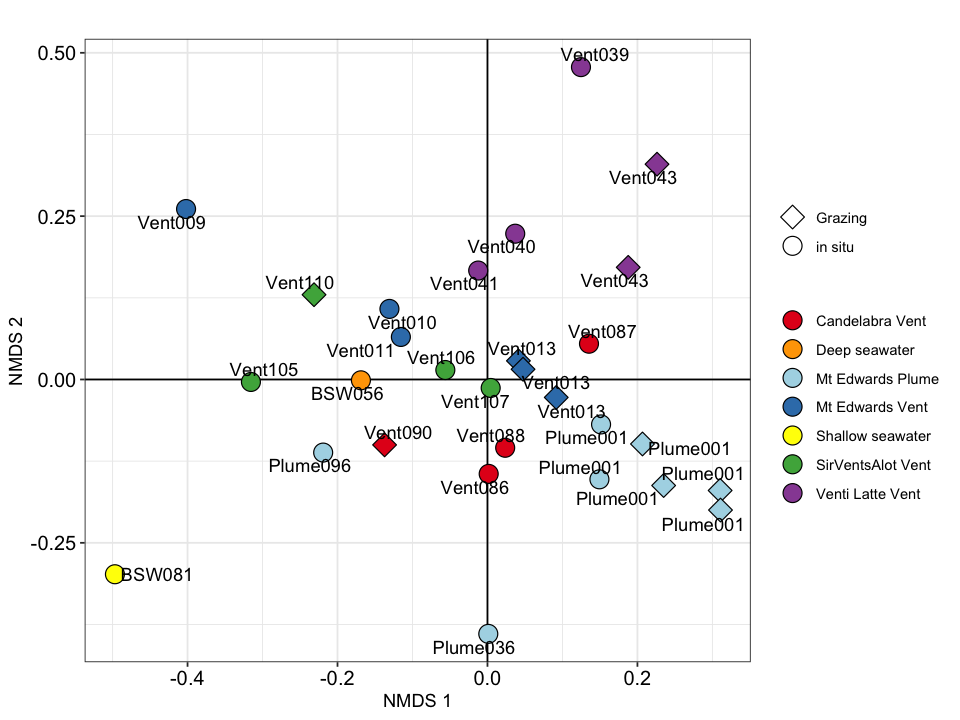

In [82]:
library(ggrepel)
options(repr.plot.width = 8, repr.plot.height = 6)

# svg("PCA-wlabels-gr-22-07-2020.svg", w=8, h=8)
nmds_jac_18s <- ggplot(jac_nmds_df, aes(x = MDS1, y = MDS2, 
                                   fill = LocationName,
                                   shape = Sampletype, 
                                   label = LOCATION_SPECIFIC)) + #Replace label=SAMPLEID.y
  geom_hline(yintercept = 0) + geom_vline(xintercept = 0) +
  geom_point(aes(x = MDS1, y = MDS2, fill = LocationName), size = 5) +
  scale_fill_manual(values = sample_color) +
#   labs(x = "NMDS 1", y = "NMDS 2", title = "Jaccard Distance NMDS") +
  labs(x = "NMDS 1", y = "NMDS 2", title = "") +
  scale_shape_manual(values = c(23,21))+
  theme_bw()+
  geom_text_repel()+
  theme(axis.text = element_text(color="black", size=12),
        legend.title = element_blank())+
  guides(fill = guide_legend(override.aes=list(shape=21)))
nmds_jac_18s
# dev.off()

In [47]:
# # Transform data - with CLR
# # Log-ratio
# log_rats<-data.frame(compositions::clr(t(gr_nums_wide)))

# # look at eigenvalues
# pca_lr <- prcomp(log_rats)
# variance_lr <- (pca_lr$sdev^2)/sum(pca_lr$sdev^2)
# head(variance_lr)
# barplot(variance_lr,
#         main='Log-Ratio PCA Screeplot',
#         xlab='PC Axis',
#         ylab='% Variance',
#         cex.names=1.5,cex.axis=1.5,cex.lab=1.5,cex.main=1.5)
# # Based on this screeplot - 2 axis are OK, as they show 0.079 and 0.077, respectively, of the variance.

# # Extract PCA and plot
# pca_lr_frame<-data.frame(pca_lr$x,SAMPLE=rownames(pca_lr$x))
# # head(pca_lr_frame)
# x <- colsplit(pca_lr_frame$SAMPLE, "_", c("DATASET", "LOCATION", "SAMPLEID", "YEAR", "REP")); 
# pca_lr_frame <- data.frame(x, pca_lr_frame)
# head(pca_lr_frame)
# ventnames <- read.delim("data-input/ventnames-gordaridge.txt")
# names(ventnames);head(ventnames)
# # View(ventnames)
# colnames(ventnames)[1]<-"SAMPLE"
# #
# pca_lr_frame_wNames <- left_join(pca_lr_frame, ventnames, by="SAMPLE")
# head(pca_lr_frame_wNames)
# #
# unique(pca_lr_frame_wNames$LocationName)
# sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
# sample_color <-c("lightblue","#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "orange", "yellow")
# pca_lr_frame_wNames$SAMPLE_ORDER <- factor(pca_lr_frame_wNames$LocationName, levels = rev(sample_order))
# names(sample_color)<-sample_order
# head(pca_lr_frame_wNames)
# #

# library(ggrepel)
# options(repr.plot.width = 8, repr.plot.height = 8)

# # svg("PCA-wlabels-gr-22-07-2020.svg", w=8, h=8)
# pca_18s <- ggplot(pca_lr_frame_wNames, aes(x=PC1,y=PC2,fill=LocationName,shape=Sampletype, label=LOCATION_SPECIFIC))+ #Replace label=SAMPLEID.y
#   geom_point(aes(x=PC1,y=PC2,fill=LocationName), size=5)+
#   scale_fill_manual(values = sample_color)+
#   ylab(paste0('PC2 ',round(variance_lr[2]*100,2),'%'))+
#   xlab(paste0('PC1 ',round(variance_lr[1]*100,2),'%'))+
#   scale_shape_manual(values = c(23,21))+
#   ggtitle('CLR PCA Ordination')+
# #   coord_fixed(ratio=variance_lr[2]/variance_lr[1])+
#   theme_bw()+
#   geom_text_repel()+
#   theme(axis.text = element_text(color="black", size=12))+
#   geom_hline(yintercept = 0) + geom_vline(xintercept = 0)
# # dev.off()

## Repeat PCA with 16S rRNA gene results

In [4]:
# Import and process 16S ASV table
ventnames_16 <- read.delim("data-input/ventnames-gordaridge-16S.txt")
countbac <- read.delim("data-input/CountTable-wtax-16s-plus3-2020-06-23.txt")
countbac_df <- countbac %>%
  separate(Taxon, sep = ";D_[[:digit:]]__", into = c("Domain", "Phylum", "Class", "Order", "Family", "Genus", "Species"), remove = TRUE, extra = "merge") %>% # Warnings are OK with NAs
  mutate_if(is.character, str_replace_all, pattern = "D_0__", replacement = "") %>%
  column_to_rownames(var = "Feature.ID") %>%
  data.frame
# Warnings are OK because not all levels fill out taxa spaces
# head(countbac_df[1:3,])
# Total ASVs and sequences:
count_summary <- countbac_df %>%
  select(starts_with("NA")) %>% 
  data.frame
# head(count_summary[1:2,])
# sum(count_summary) # total sequences
# dim(count_summary)[1] # total ASVs

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 4292 rows [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 23, 25, 26, ...].”


In [5]:
## Create new column in ASV table that reports if an ASV is present in any of the background seawater samples
# head(countbac_df[1:2,]); names(countbac_df)
### Select BSW only samples and make character list:
bsw_samples <- ventnames_16 %>% 
  filter(LocationName == "Deep seawater" | LocationName == "Shallow seawater") %>% 
  select(SAMPLEID_16S) %>%
  data.frame
bsw_samples <- as.character(unique(bsw_samples$SAMPLEID_16S))
bsw_samples
# Create new df with bsw ASVs labeled
sub_bsw_df <- countbac_df %>%
  rownames_to_column(var = "Feature.ID") %>% 
  select(Feature.ID, all_of(bsw_samples)) %>%
  mutate(sum = rowSums(select_if(., is.numeric))) %>% 
  filter(sum > 0) %>% 
  add_column(bsw_presence = "present in bsw") %>% 
  select(Feature.ID, bsw_presence) %>% 
  data.frame
# head(sub_bsw_df)
# unique(sub_bsw_df$bsw_presence)

# Add to original ASV table
countbac_df_cat <- countbac_df %>% 
  rownames_to_column(var = "Feature.ID") %>% 
  left_join(sub_bsw_df) %>%
  mutate(bsw_presence = replace_na(bsw_presence, "vent only")) %>% 
  select(-Confidence) %>% 
  mutate(ASV_SUM_ALL = rowSums(select_if(., is.numeric))) %>% 
  mutate(ASV_REL_ABUN = 100*(ASV_SUM_ALL/sum(ASV_SUM_ALL))) %>%
  # filter(ASV_REL_ABUN > ##) %>%  #Filter by rel abun
  data.frame
# head(countbac_df_cat)

[1] "NA108003STEP"         "NA108003STEP20200226" "NA108020aSTEP"       
[4] "NA108020bSTEP"        "NA108056aSTEP"        "NA108056bSTEP"       
[7] "NA108081STEP"         "NA108102STEP"

Joining, by = "Feature.ID"



In [58]:
## Ordination analysis
# Remove samples that were repeated
rm <- c("NA108003STEP", "NA108039STEP", "NA108087STEP")

# Filtering count table data:
df_start <- countbac_df_cat %>% 
  filter(Domain %in% "Archaea" | Domain %in% "Bacteria") %>% #Select only archaea and bacteria, removing unassigned
  select(-all_of(rm)) %>% # Remove samples we are replacing
  # Could include other filtering options if necessary
  select(Feature.ID, starts_with("NA108")) %>% 
  data.frame

# Prep data so it is ready for data transformations and more
df_format <- df_start %>% 
  column_to_rownames(var = "Feature.ID") %>% 
  as.matrix
# class(df_format)

ventnames_16_mod <- ventnames_16 %>% 
    mutate(location = case_when(
        grepl("Plume", SAMPLE_AMY) ~ "Plume",
        grepl("BSW", SAMPLE_AMY) ~ "BSW", 
        grepl("Vent", LocationName) ~ "Vent"),
          NA_NUM = SAMPLEID_16S) %>% 
    mutate(NA_NUM = str_replace(NA_NUM, "NA108", "")) %>%
    mutate(NA_NUM = str_replace(NA_NUM, "NA080", "")) %>% 
    mutate(NA_NUM = str_replace(NA_NUM, "aSTEP", "")) %>% 
    mutate(NA_NUM = str_replace(NA_NUM, "bSTEP", "")) %>% 
    mutate(NA_NUM = str_replace(NA_NUM, "STEP20200226", "")) %>% 
    mutate(NA_NUM = str_replace(NA_NUM, "STEP", "")) %>% 
    unite(NEW_SAMPLEID, location, NA_NUM, sep ="") %>% 
    data.frame
# ventnames_16_mod

PCaxis PercVar   
1 1      0.27437098
2 2      0.12338069
3 3      0.09253537
4 4      0.07736831

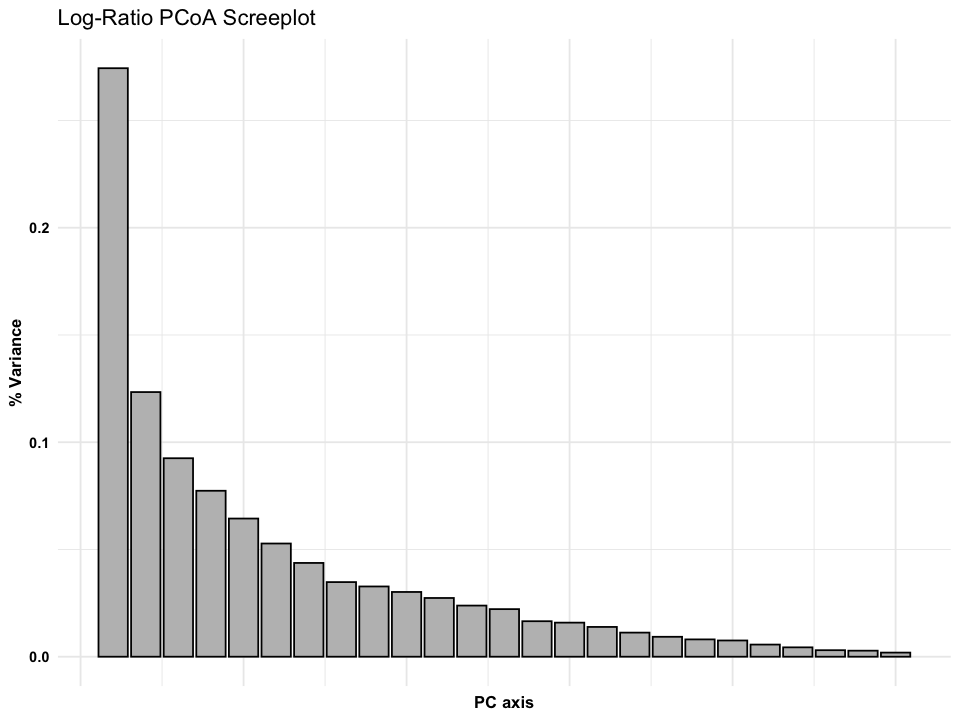

In [59]:
# NMDS - Jaccard distance calculation
jac_gr_16s <- vegdist(t(df_format))

# Ordination - PCA
pcoa_jac_16s <- pcoa(jac_gr_16s)

# Extract variances from pcoa, from jaccard calculated dist. metric
jac_var_16s <- data.frame(pcoa_jac_16s$values$Relative_eig) %>% 
  select(PercVar = 'pcoa_jac_16s.values.Relative_eig') %>% 
  rownames_to_column(var = "PCaxis") %>% 
  data.frame
head(jac_var_16s[1:4,]) #Look at first 4 axes

# Screeplot check
ggplot(jac_var_16s, aes(x = as.numeric(PCaxis), y = PercVar)) + 
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  theme_minimal() +
  theme(axis.title = element_text(color = "black", face = "bold", size = 10),
        axis.text.y = element_text(color = "black", face = "bold"),
        axis.text.x = element_blank()) +
  labs(x = "PC axis", y = "% Variance", title = "Log-Ratio PCoA Screeplot")

In [60]:
jac_nmds_16s <- metaMDS(jac_gr_16s,k=2,autotransform=FALSE)
jac_nmds_16s$stress

Run 0 stress 0.1330027 
Run 1 stress 0.1135523 
... New best solution
... Procrustes: rmse 0.100119  max resid 0.3428048 
Run 2 stress 0.1219904 
Run 3 stress 0.1248836 
Run 4 stress 0.1135523 
... New best solution
... Procrustes: rmse 2.883705e-05  max resid 9.942645e-05 
... Similar to previous best
Run 5 stress 0.1221587 
Run 6 stress 0.1219903 
Run 7 stress 0.1399743 
Run 8 stress 0.1399319 
Run 9 stress 0.1248836 
Run 10 stress 0.1248836 
Run 11 stress 0.1508642 
Run 12 stress 0.1248836 
Run 13 stress 0.1135975 
... Procrustes: rmse 0.009205982  max resid 0.03442284 
Run 14 stress 0.1219603 
Run 15 stress 0.1220666 
Run 16 stress 0.139244 
Run 17 stress 0.1220665 
Run 18 stress 0.129901 
Run 19 stress 0.1494849 
Run 20 stress 0.1248836 
*** Solution reached


[1] 0.1135523

In [62]:
head(jac_nmds_16s$points)
head(ventnames_16_mod)

MDS1       MDS2       
NA108001aSTEP        -0.1268285  0.04020227
NA108001bSTEP        -0.2612440 -0.16049114
NA108003STEP20200226 -0.3613894 -0.11305930
NA108009STEP          0.4502827  0.31539080
NA108010STEP          0.4388672  0.24473533
NA108012STEP          0.1806924  0.06887234

SAMPLEID_16S         SAMPLE_AMY               Sampletype SAMPLEID
1 NA080051STEP         SUPR BAG Purple Rain     in situ    SUPR    
2 NA108001aSTEP        Niskin Plume Mt. Edwards in situ    sterivex
3 NA108001bSTEP        Niskin Plume Mt. Edwards in situ    sterivex
4 NA108003STEP         Niskin BSW               in situ    sterivex
5 NA108003STEP20200226 Niskin BSW               in situ    sterivex
6 NA108009STEP         SUPR Filter Mt. Edwards  in situ    SUPR    
  LocationName     STATUS FLUIDORIGIN NEW_SAMPLEID
1 Purple Rain Vent keep   S9          Vent051     
2 Mt Edwards Plume keep   Niskin7     Plume001    
3 Mt Edwards Plume keep   Niskin7     Plume001    
4 Deep seawater    old    Niskin10    BSW003      
5 Deep seawater    keep   Niskin10    BSW003      
6 Mt Edwards Vent  keep   S1          Vent009

Joining, by = "SAMPLEID_16S"



SAMPLEID_16S         MDS1       MDS2        SAMPLE_AMY              
1 NA108001aSTEP        -0.1268285  0.04020227 Niskin Plume Mt. Edwards
2 NA108001bSTEP        -0.2612440 -0.16049114 Niskin Plume Mt. Edwards
3 NA108003STEP20200226 -0.3613894 -0.11305930 Niskin BSW              
  Sampletype SAMPLEID LocationName     STATUS FLUIDORIGIN NEW_SAMPLEID
1 in situ    sterivex Mt Edwards Plume keep   Niskin7     Plume001    
2 in situ    sterivex Mt Edwards Plume keep   Niskin7     Plume001    
3 in situ    sterivex Deep seawater    keep   Niskin10    BSW003      
  SAMPLE_ORDER    
1 Mt Edwards Plume
2 Mt Edwards Plume
3 Deep seawater

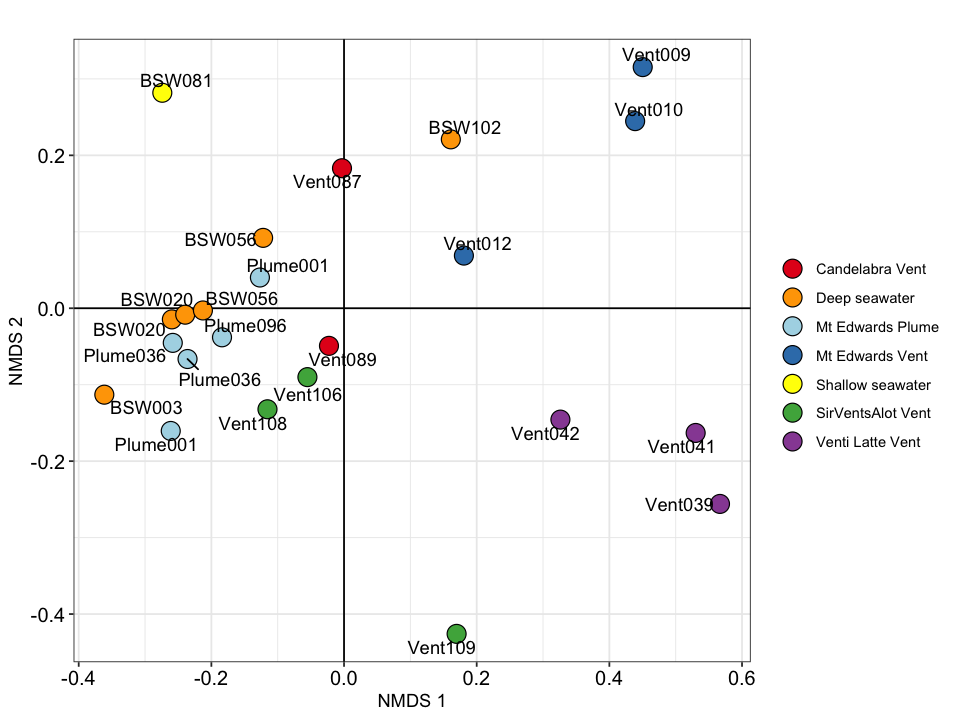

In [81]:
# Make dataframe of PCoA variables and import vent names
sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')

jac_nmds_df_16s <- data.frame(jac_nmds_16s$points) %>% 
    rownames_to_column(var = "SAMPLEID_16S") %>% 
    left_join(ventnames_16_mod) %>% 
    filter(LocationName %in% sample_order) %>% 
  data.frame

# factor for plot
sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
sample_color <-c("lightblue","#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "orange", "yellow")
jac_nmds_df_16s$SAMPLE_ORDER <- factor(jac_nmds_df_16s$LocationName, levels = rev(sample_order))
names(sample_color)<-sample_order

library(ggrepel)
head(jac_nmds_df_16s[1:3,])

options(repr.plot.width = 8, repr.plot.height = 6)

# svg("PCA-wlabels-gr-22-07-2020.svg", w=8, h=8)
nmds_jac_16s <- ggplot(jac_nmds_df_16s, aes(x = MDS1, y = MDS2, 
                                   fill = LocationName,
                                   label = NEW_SAMPLEID)) + #Replace label=SAMPLEID.y
  geom_hline(yintercept = 0) + geom_vline(xintercept = 0) +
  geom_point(aes(x = MDS1, y = MDS2, fill = LocationName), size = 5, shape = 21) +
  scale_fill_manual(values = sample_color) +
#   labs(x = "NMDS 1", y = "NMDS 2", title = "Jaccard Distance NMDS (16S)") +
  labs(x = "NMDS 1", y = "NMDS 2", title = "") +
  theme_bw()+
  geom_text_repel()+
  theme(axis.text = element_text(color="black", size=12),
       legend.title = element_blank()) +
  guides(fill = guide_legend(override.aes=list(shape=21)))
nmds_jac_16s
# dev.off()

In [56]:
# # Log-Ratio
# library(compositions)
# df_log_clr <- data.frame(clr(t(df_format)))

# # Ordination - PCA
# # ?prcomp()
# pca_clr <- prcomp(df_log_clr)

# # Check variance
# check_variance <- (pca_clr$sdev^2)/sum(pca_clr$sdev^2)
# head(check_variance)
# # Screeplot, how many axes are appropriate?
# barplot(check_variance,
#         main='Log-Ratio PCA Screeplot',
#         xlab='PC Axis',
#         ylab='% Variance',
#         cex.names=1.5,cex.axis=1.5,cex.lab=1.5,cex.main=1.5)

# ventnames_16_mod <- ventnames_16 %>% 
#     mutate(location = case_when(
#         grepl("Plume", SAMPLE_AMY) ~ "Plume",
#         grepl("BSW", SAMPLE_AMY) ~ "BSW", 
#         grepl("Vent", LocationName) ~ "Vent"),
#           NA_NUM = SAMPLEID_16S) %>% 
#     mutate(NA_NUM = str_replace(NA_NUM, "NA108", "")) %>%
#     mutate(NA_NUM = str_replace(NA_NUM, "NA080", "")) %>% 
#     mutate(NA_NUM = str_replace(NA_NUM, "aSTEP", "")) %>% 
#     mutate(NA_NUM = str_replace(NA_NUM, "bSTEP", "")) %>% 
#     mutate(NA_NUM = str_replace(NA_NUM, "STEP20200226", "")) %>% 
#     mutate(NA_NUM = str_replace(NA_NUM, "STEP", "")) %>% 
#     unite(NEW_SAMPLEID, location, NA_NUM, sep ="") %>% 
#     data.frame
# # ventnames_16_mod

# # Make dataframe of PCoA variables and import vent names
# sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
# df_pca_clr <- data.frame(pca_clr$x, SAMPLEID_16S = rownames(pca_clr$x))

# df_pca_clr_wnames <- df_pca_clr %>% 
#   left_join(ventnames_16_mod) %>% 
#   filter(LocationName %in% sample_order) %>% 
#   data.frame

# # head(df_pca_clr_wnames[1:2,])

# # unique(df_pca_clr_wnames$LocationName)
# sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
# sample_color <-c("lightblue","#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "orange", "yellow")
# df_pca_clr_wnames$SAMPLE_ORDER <- factor(df_pca_clr_wnames$LocationName, levels = rev(sample_order))
# names(sample_color)<-sample_order

# library(ggrepel)
# # head(df_pca_clr_wnames[1:2,])

# options(repr.plot.width = 8, repr.plot.height = 6)

# # svg("PCoA-16S-wolabels.svg", h = 8, w = 8)
# # ggplot(df_pca_clr_wnames, aes(x = PC1, y = PC2, fill = SAMPLE_ORDER)) +
# pca_16s <- ggplot(df_pca_clr_wnames, aes(x = PC1, y = PC2, fill = SAMPLE_ORDER, label = NEW_SAMPLEID)) +
#   geom_point(aes(x = PC1,y = PC2, fill = LocationName), size = 4, shape = 21) +
#   scale_fill_manual(values = sample_color) +
#   ylab(paste0('PC2 ',round(check_variance[2]*100,2),'%')) +
#   xlab(paste0('PC1 ',round(check_variance[1]*100,2),'%')) +
#   ggtitle('16S - CLR PCA Ordination') +
#   # scale_x_continuous(limits = c(-15, 36)) +
#   # scale_y_continuous(limits = c(-23, 15)) +
# #   coord_fixed(ratio=variance_lr[2]/variance_lr[1])+
#   geom_text_repel() +
#   theme_bw() +
#   theme(axis.text = element_text(color = "black", size = 12)) +
#   geom_hline(yintercept = 0) + geom_vline(xintercept = 0)
# # w=630, h=430

In [68]:
# options(repr.plot.width = 15, repr.plot.height = 6)

# # svg("panel-ordinations.svg", w = 15, h = 6)
# plot_grid(pca_18s, pca_16s, nrow = 1, labels = c("a", "b"))
# # dev.off()

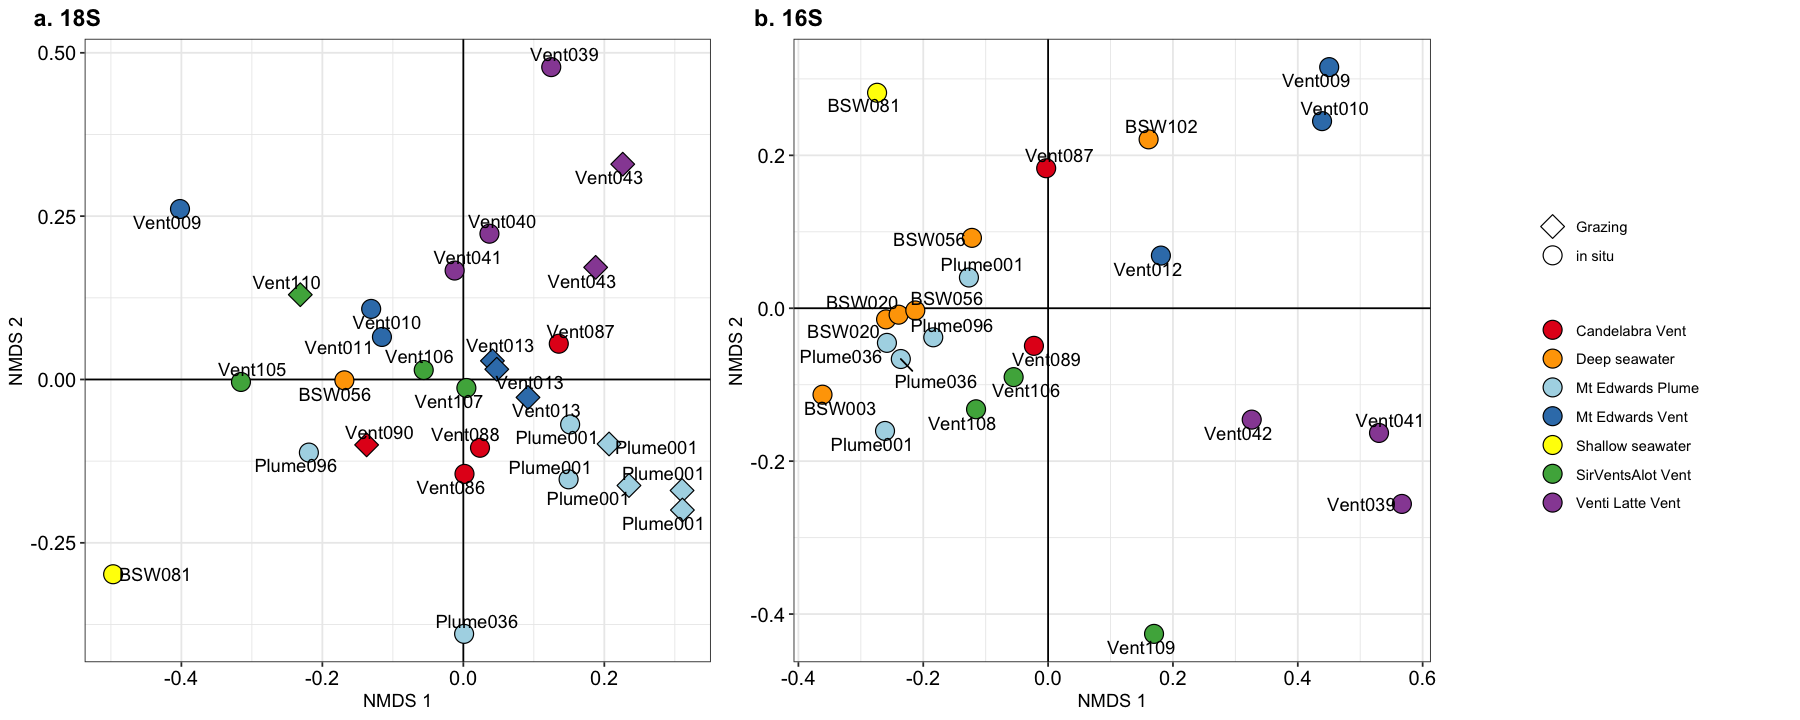

In [85]:
options(repr.plot.width = 15, repr.plot.height = 6)
nmdsleg <- get_legend(nmds_jac_18s)
# svg("panel-NMDS.svg", w = 15, h = 6)
plot_grid(nmds_jac_18s + theme(legend.position = "none"), 
          nmds_jac_16s + theme(legend.position = "none"), 
          nmdsleg, nrow = 1, rel_widths = c(1,1,0.5), 
          labels = c("a. 18S", "b. 16S", ""))
# dev.off()

## 16S taxa plot

In [86]:
head(countbac_df[1:2,])
colnames(countbac_df)  
# Remove samples that were repeated
rm <- c("NA108003STEP", "NA108039STEP", "NA108087STEP")
head(bsw_samples) # 

NA08051STEP NA108001aSTEP NA108001bSTEP
139ad7417ef0dfb630699faea2eb5e06 619         1179          2971         
4ebf60eae6a25de1f7fb819ff212141c 359          847           795         
                                 NA108003STEP NA108003STEP20200226 NA108009STEP
139ad7417ef0dfb630699faea2eb5e06 5252         6931                 0           
4ebf60eae6a25de1f7fb819ff212141c 4076         4644                 0           
                                 NA108010STEP NA108012STEP NA108020aSTEP
139ad7417ef0dfb630699faea2eb5e06 155          677          3921         
4ebf60eae6a25de1f7fb819ff212141c  43          158          4445         
                                 NA108020bSTEP ⋯ NA108108STEP NA108109STEP
139ad7417ef0dfb630699faea2eb5e06 3937          ⋯ 3596         229         
4ebf60eae6a25de1f7fb819ff212141c 2764          ⋯ 2640          88         
                                 Domain   Phylum         Class              
139ad7417ef0dfb630699faea2eb5e06 Archaea  Thaumarchaeota Nitrososphaeria    
4ebf60eae6a25de1f7fb819ff212141c Bacteria Proteobacteria Deltaproteobacteria
                                 Order                        Family           
139ad7417ef0dfb630699faea2eb5e06 Nitrosopumilales             Nitrosopumilaceae
4ebf60eae6a25de1f7fb819ff212141c SAR324 clade(Marine group B) NA               
                                 Genus                     
139ad7417ef0dfb630699faea2eb5e06 uncultured marine archaeon
4ebf60eae6a25de1f7fb819ff212141c NA                        
                                 Species                    Confidence
139ad7417ef0dfb630699faea2eb5e06 uncultured marine archaeon 0.8614500 
4ebf60eae6a25de1f7fb819ff212141c NA                         0.9999994

[1] "NA08051STEP"          "NA108001aSTEP"        "NA108001bSTEP"       
 [4] "NA108003STEP"         "NA108003STEP20200226" "NA108009STEP"        
 [7] "NA108010STEP"         "NA108012STEP"         "NA108020aSTEP"       
[10] "NA108020bSTEP"        "NA108036aSTEP"        "NA108036bSTEP"       
[13] "NA108039STEP"         "NA108039STEP20200226" "NA108041STEP"        
[16] "NA108042STEP"         "NA108049STEP"         "NA108052STEP"        
[19] "NA108056aSTEP"        "NA108056bSTEP"        "NA108081STEP"        
[22] "NA108087STEP"         "NA108087STEP20200226" "NA108089STEP"        
[25] "NA108096STEP"         "NA108100STEP"         "NA108102STEP"        
[28] "NA108106STEP"         "NA108108STEP"         "NA108109STEP"        
[31] "Domain"               "Phylum"               "Class"               
[34] "Order"                "Family"               "Genus"               
[37] "Species"              "Confidence"

In [92]:
head(countbac_df_cat)
# Filtering count table data:
# df_start <- countbac_df_cat %>% 
#   filter(Domain %in% "Archaea" | Domain %in% "Bacteria") %>% #Select only archaea and bacteria, removing unassigned
#   select(-all_of(rm)) %>% # Remove samples we are replacing
unique(countbac_df_cat$bsw_presence)

Feature.ID                       NA08051STEP NA108001aSTEP NA108001bSTEP
1 139ad7417ef0dfb630699faea2eb5e06 619         1179           2971        
2 4ebf60eae6a25de1f7fb819ff212141c 359          847            795        
3 a900b6678ce86851fb16bfafb87f3326 261          463            368        
4 7ff01908e1d8d187672c7dbc4ecdd0ec 512          677            612        
5 12c4cf4a9b6a4541ef111f02191bae96   0         2731          14042        
6 4ec37aa30ab2bf855e1b18f114113868 219          413            489        
  NA108003STEP NA108003STEP20200226 NA108009STEP NA108010STEP NA108012STEP
1 5252         6931                  0           155          677         
2 4076         4644                  0            43          158         
3 2275         2545                 21             8           96         
4 1708         3433                  0             0           53         
5    0            0                  0             0            0         
6 1597         2000                  0             0           65         
  NA108020aSTEP ⋯ Domain   Phylum         Class              
1 3921          ⋯ Archaea  Thaumarchaeota Nitrososphaeria    
2 4445          ⋯ Bacteria Proteobacteria Deltaproteobacteria
3 2471          ⋯ Bacteria Proteobacteria Gammaproteobacteria
4 1062          ⋯ Archaea  Euryarchaeota  Thermoplasmata     
5  496          ⋯ Bacteria Proteobacteria Gammaproteobacteria
6 2336          ⋯ Bacteria Proteobacteria Deltaproteobacteria
  Order                        Family            Genus                     
1 Nitrosopumilales             Nitrosopumilaceae uncultured marine archaeon
2 SAR324 clade(Marine group B) NA                NA                        
3 Thiomicrospirales            Thioglobaceae     SUP05 cluster             
4 Marine Group II              NA                NA                        
5 Oceanospirillales            Halomonadaceae    Halomonas                 
6 SAR324 clade(Marine group B) NA                NA                        
  Species                    bsw_presence   ASV_SUM_ALL ASV_REL_ABUN
1 uncultured marine archaeon present in bsw 52893       3.905814    
2 NA                         present in bsw 42786       3.159476    
3 NA                         present in bsw 24250       1.790709    
4 NA                         present in bsw 22815       1.684744    
5 NA                         present in bsw 21971       1.622420    
6 NA                         present in bsw 21742       1.605509

[1] "present in bsw" "vent only"

In [97]:
sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent',
                  'SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
rm <- c('Eukaryota','Unassigned')
all_asv <- c("present in bsw", "vent only")
vent_asv <- c("vent only")

# Function to format 16S data for bar plot - by user defined taxonomic level

toPlot_16 <- function(df, asv, level){
    level <- enquo(level)
    df_out <- df %>% 
    filter(bsw_presence %in% asv) %>% 
    pivot_longer(cols = starts_with("NA"), names_to = "Sample") %>% 
    # Sum ASVs within the same phyla and sample together
    group_by(Domain, !!level, Sample) %>% 
    summarise(SUM = sum(value)) %>% 
    ungroup() %>% 
    left_join(ventnames_16_mod, by = c("Sample" = "SAMPLEID_16S")) %>% 
    filter(LocationName %in% sample_order) %>% 
    filter(!(STATUS == "old")) %>% 
    filter(!(Domain %in% rm)) %>% 
    filter(SUM > 0) %>% 
    data.frame
    return(df_out)
    }
bac_nobsw <- toPlot_16(countbac_df_cat, vent_asv, Phylum)
head(bac_nobsw)
bac_all <- toPlot_16(countbac_df_cat, all_asv, Phylum)

`summarise()` regrouping output by 'Domain', 'Phylum' (override with `.groups` argument)



Domain  Phylum        Sample               SUM SAMPLE_AMY                 
1 Archaea Altiarchaeota NA108041STEP          5  SUPR Filter Venti Latte    
2 Archaea Altiarchaeota NA108106STEP          6  SUPR Filter Sir Vents-A-Lot
3 Archaea Asgardaeota   NA108039STEP20200226 21  SUPR Filter Venti Latte    
4 Archaea Crenarchaeota NA108042STEP          2  SUPR BAG Venti Latte       
5 Archaea Crenarchaeota NA108089STEP          4  SUPR BAG Candelabra        
6 Archaea Crenarchaeota NA108106STEP         58  SUPR Filter Sir Vents-A-Lot
  Sampletype SAMPLEID LocationName      STATUS FLUIDORIGIN NEW_SAMPLEID
1 in situ    SUPR     Venti Latte Vent  keep   S3          Vent041     
2 in situ    SUPR     SirVentsAlot Vent keep   S10         Vent106     
3 in situ    SUPR     Venti Latte Vent  keep   S1          Vent039     
4 in situ    SUPR     Venti Latte Vent  keep   S7          Vent042     
5 in situ    SUPR     Candelabra Vent   keep   S7          Vent089     
6 in situ    SUPR     SirVentsAlot Vent keep   S10         Vent106

`summarise()` regrouping output by 'Domain', 'Phylum' (override with `.groups` argument)



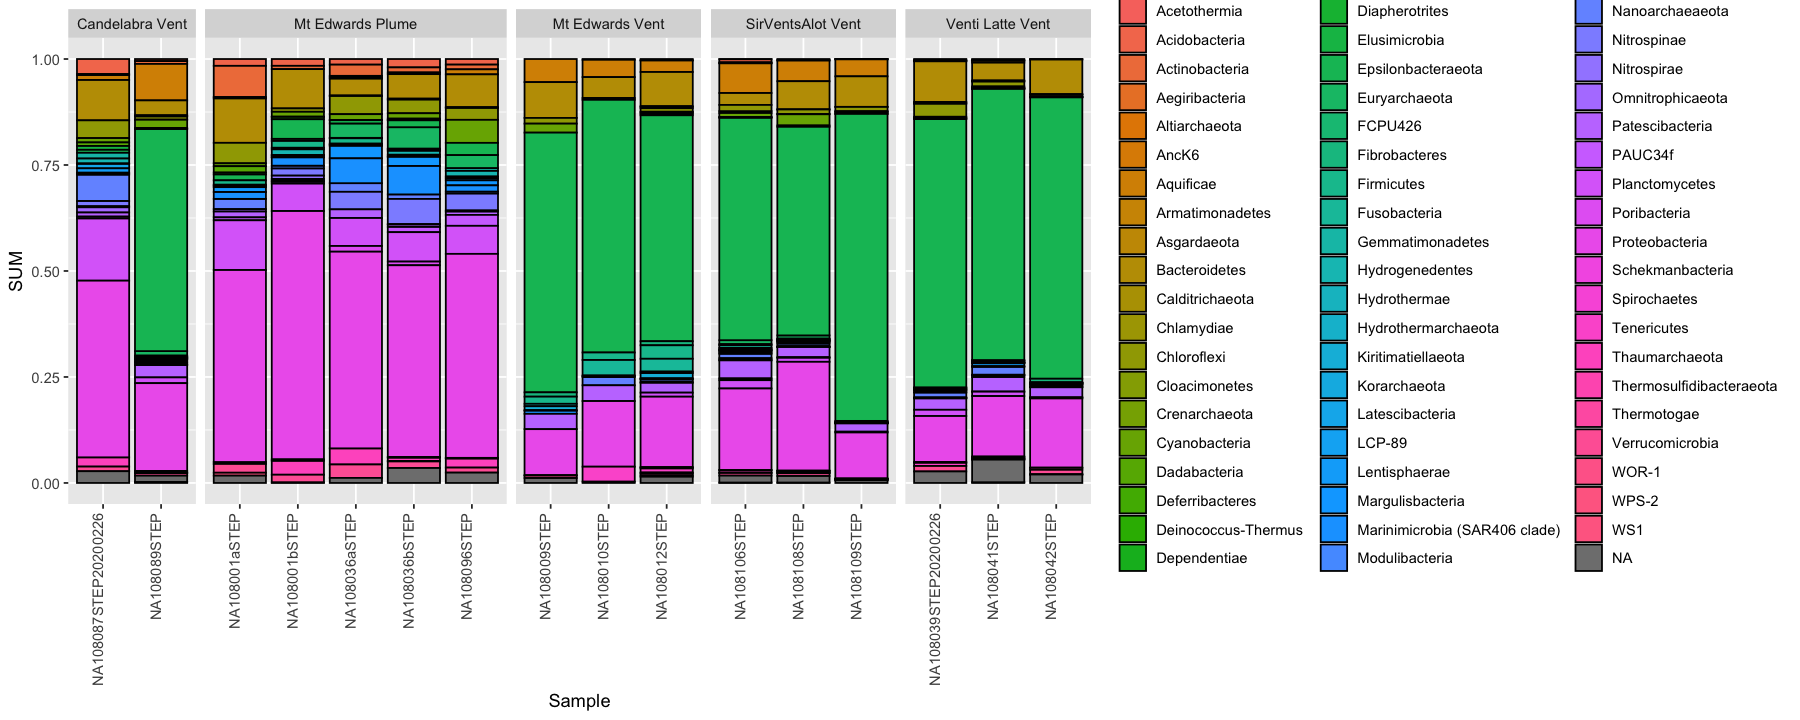

In [103]:
options(repr.plot.width = 15, repr.plot.height = 6)

ggplot(bac_nobsw, aes(x = Sample, y = SUM, fill = Phylum)) + 
    geom_bar(stat = "identity", position = "fill", color = "black") +
    facet_grid(. ~ LocationName, scale = "free", space = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0))

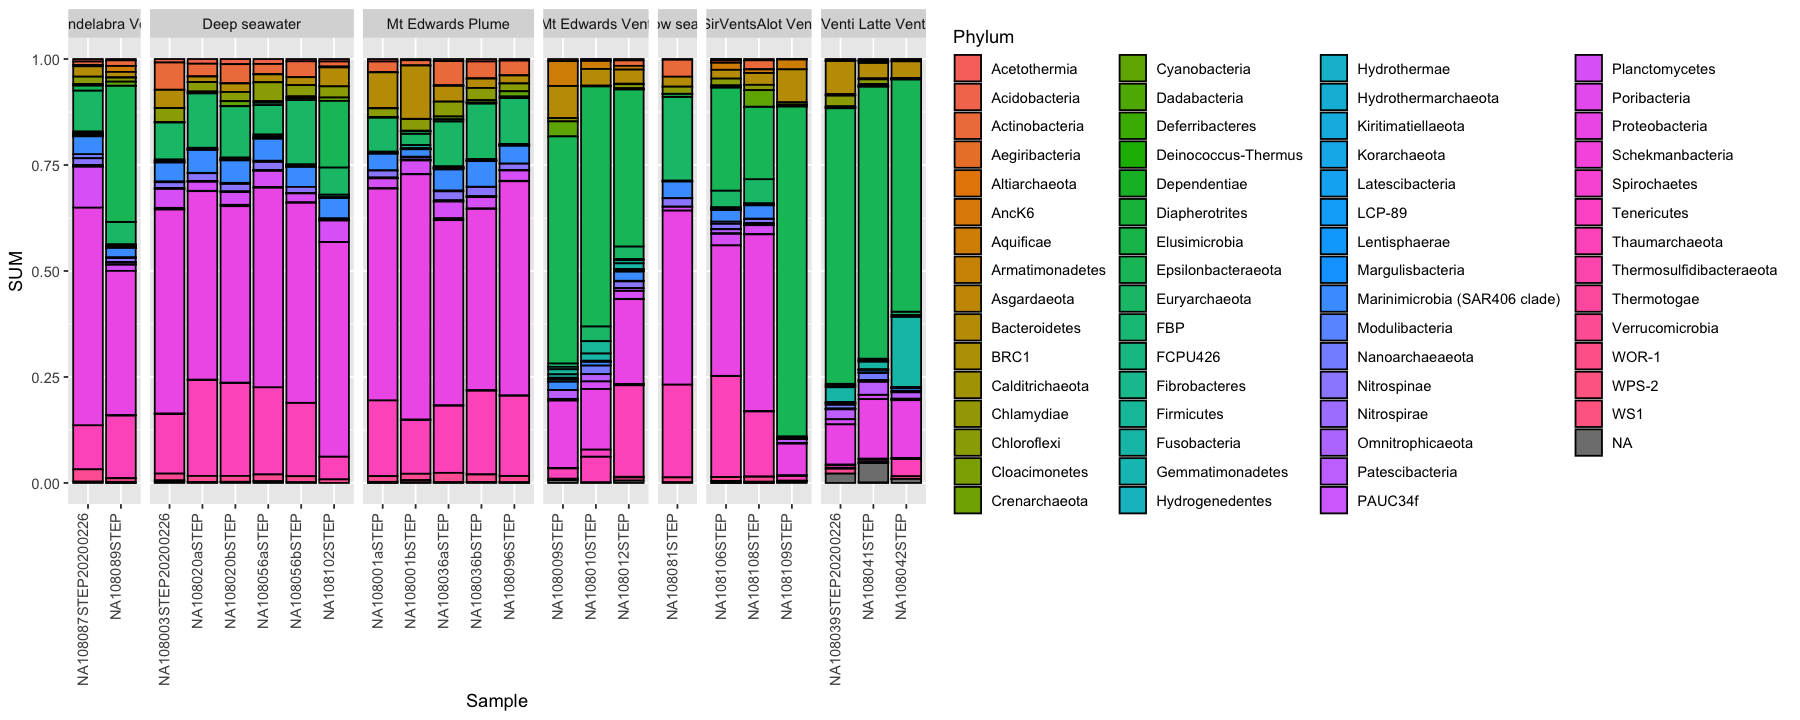

In [104]:
options(repr.plot.width = 15, repr.plot.height = 6)

ggplot(bac_all, aes(x = Sample, y = SUM, fill = Phylum)) + 
    geom_bar(stat = "identity", color = "black", position = "fill") +
    facet_grid(. ~ LocationName, scale = "free", space = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0))

In [111]:
# head(countbac_df_cat[1:2,])
tmp_16S <- countbac_df_cat %>% 
    select(Domain, Phylum, Class, Order, Family, Genus, bsw_presence, ASV_SUM_ALL) %>% 
    group_by(Domain, Phylum, Class, Order, Family, Genus, bsw_presence) %>% 
    summarise(ASV_TOTAL_SEQS = sum(ASV_SUM_ALL)) %>% 
    data.frame
head(tmp_16S)
dim(tmp_16S)

`summarise()` regrouping output by 'Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus' (override with `.groups` argument)



Domain  Phylum        Class         Order                       
1 Archaea Altiarchaeota Altiarchaeia  uncultured archaeon         
2 Archaea Altiarchaeota Altiarchaeia  NA                          
3 Archaea Asgardaeota   Odinarchaeia  uncultured crenarchaeote    
4 Archaea Asgardaeota   Odinarchaeia  NA                          
5 Archaea Crenarchaeota Bathyarchaeia uncultured sediment archaeon
6 Archaea Crenarchaeota Bathyarchaeia NA                          
  Family                       Genus                        bsw_presence
1 uncultured archaeon          uncultured archaeon          vent only   
2 NA                           NA                           vent only   
3 uncultured crenarchaeote     uncultured crenarchaeote     vent only   
4 NA                           NA                           vent only   
5 uncultured sediment archaeon uncultured sediment archaeon vent only   
6 NA                           NA                           vent only   
  ASV_TOTAL_SEQS
1  6            
2  5            
3 42            
4  4            
5 22            
6 22

[1] 1640    8

In [112]:
# write_delim(tmp_16S, path = "16s-dist-abun.txt", delim = "\t")

In [ ]:
# # Sort through phyla
# toPlot_16 <- function(df, asv, level){
#     level <- enquo(level)
#     df_out <- df %>% 
#     filter(bsw_presence %in% asv) %>% 
#     pivot_longer(cols = starts_with("NA"), names_to = "Sample") %>% 
#     # Sum ASVs within the same phyla and sample together
#     group_by(Domain, !!level, Sample) %>% 
#     summarise(SUM = sum(value)) %>% 
#     ungroup() %>% 
#     left_join(ventnames_16_mod, by = c("Sample" = "SAMPLEID_16S")) %>% 
#     filter(LocationName %in% sample_order) %>% 
#     filter(!(STATUS == "old")) %>% 
#     filter(!(Domain %in% rm)) %>% 
#     filter(SUM > 0) %>% 
#     data.frame
#     return(df_out)
#     }
# bac_nobsw <- toPlot_16(countbac_df_cat, vent_asv, Phylum)
# head(bac_nobsw)
# bac_all <- toPlot_16(countbac_df_cat, all_asv, Phylum)

## Alpha diversity - DivNet

In [65]:
library(phyloseq);library(DivNet)
# Estimate alpha diversity with DivNet

Loading required package: breakaway



In [102]:
# sample_data(physeq_clean_true) %>% head # Phyloseq object from 18S data

In [95]:
div <- divnet(tax_glom(physeq_clean_true, taxrank = "Taxon"), tuning = "careful", X = "LocationName_Sampletype") 

Removing absent taxa!



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [113]:
# div$shannon %>% summary %>% head

df_alpha_18s <- div$shannon %>% summary %>% 
    left_join(ventnames, by = c("sample_names" = "SAMPLE")) %>% 
    select(estimate, error, lower, upper, LocationName, Sampletype) %>% 
    unite(SAMPLE_ID, LocationName, Sampletype, sep = " ", remove = FALSE) %>% 
    distinct() %>% 
    data.frame

(df_alpha_18s)

estimate error      lower     upper    SAMPLE_ID                
1  2.156075 0.30155516 1.5529650 2.759186 Deep seawater in situ    
2  2.189259 0.42323187 1.3427954 3.035723 Shallow seawater in situ 
3  1.798447 0.12510295 1.5482411 2.048653 Mt Edwards Plume in situ 
4  1.668967 0.07321843 1.5225303 1.815404 Mt Edwards Plume Grazing 
5  1.133954 0.20385847 0.7262369 1.541671 Mt Edwards Vent in situ  
6  1.806706 0.27307541 1.2605550 2.352857 Mt Edwards Vent Grazing  
7  1.819930 0.14000048 1.5399290 2.099931 Venti Latte Vent in situ 
8  1.622595 0.06538989 1.4918157 1.753375 Venti Latte Vent Grazing 
9  1.809016 0.27795958 1.2530965 2.364935 Candelabra Vent in situ  
10 2.494892 0.84146550 0.8119609 4.177823 Candelabra Vent Grazing  
11 1.814430 0.23102558 1.3523792 2.276482 SirVentsAlot Vent in situ
12 1.717206 0.20880725 1.2995918 2.134821 SirVentsAlot Vent Grazing
   LocationName      Sampletype
1  Deep seawater     in situ   
2  Shallow seawater  in situ   
3  Mt Edwards Plume  in situ   
4  Mt Edwards Plume  Grazing   
5  Mt Edwards Vent   in situ   
6  Mt Edwards Vent   Grazing   
7  Venti Latte Vent  in situ   
8  Venti Latte Vent  Grazing   
9  Candelabra Vent   in situ   
10 Candelabra Vent   Grazing   
11 SirVentsAlot Vent in situ   
12 SirVentsAlot Vent Grazing

In [118]:
sample_order <- c('Mt Edwards Plume','Mt Edwards Vent','Candelabra Vent','SirVentsAlot Vent','Venti Latte Vent','Deep seawater', 'Shallow seawater')
sample_color <-c("lightblue","#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "orange", "yellow")
df_alpha_18s$SAMPLE_ORDER <- factor(df_alpha_18s$LocationName, levels = sample_order)

options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(df_alpha_18s, aes(x = SAMPLE_ID, y = estimate, fill = SAMPLE_ORDER, shape = Sampletype)) +
    geom_point(stat = "identity", color = "black") +
    geom_errorbar(aes(ymin = lower, ymax = upper), size = 0.5, width = 0.1)+
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 12))
# # Plot shannon diversity
# div$simpson %>% 
#   plot(physeq_clean_true, fill = "LocationName") +
#   scale_fill_manual(values = sample_color)

In [ ]:
# div$shannon %>% 
#   plot(physeq_clean_true, color = "LocationName")+
#   scale_color_manual(values = c("#e41a1c", "orange", "lightblue","#377eb8", "yellow", "#4daf4a", "#984ea3")) +
#   coord_cartesian(ylim = c(0,4.5))

In [ ]:
# # Phyloseq import
# names(countbac_df)
# bac_mat <- as.matrix(countbac_df[1:27])
# #Tax names
# tax_names <- countbac_df %>% 
#   select(-ends_with("STEP"), -starts_with("NA108"), -Confidence) %>% 
#   as.matrix
# class(tax_names)
# head(tax_names)
# # Make phyloseq objects
# ASV_16 <- otu_table(bac_mat, taxa_are_rows = TRUE)
# tax_16 <- tax_table(tax_names)

# physeq_16 <- phyloseq(ASV_16, tax_16)
# # Import metadata
# names(countbac)
# ventnames_16 <- read.delim("ventnames-gordaridge-16S.txt")
# names(ventnames_16)
# # View(ventnames)
# row.names(ventnames_16) <- ventnames_16$SAMPLEID_16S
# sampledata <- sample_data(ventnames_16); sampledata

# physeq_16 <- merge_phyloseq(physeq_16, sampledata)
# physeq_16

In [ ]:
# Compare divnet results from 16S and 18S

# Classify 18S-derived ASVs by distribution in vent, plume, and background samples

In [113]:
load("data-input/GordaRidge-ASVtable-avg-22-07-2020.RData",verbose = T)
#
# Get binary info - lists from BSW, Plume, Vent, and Grazing
head(gr_counts_avg_wtax[1:2,])
unique(gr_counts_avg_wtax[, c("Sampletype", "LocationName")]) #categories to consider
bin_category <- gr_counts_avg_wtax[, c("Feature.ID", "Sampletype", "LocationName", "COUNT_AVG")]
bin_category$sample_tmp <- paste(bin_category$Sampletype, bin_category$LocationName, sep = "_")
bin_category$sample_tmp <- gsub(" ","_", bin_category$sample_tmp)
head(bin_category)
bin_category$Sampletype<-NULL; bin_category$LocationName <- NULL
head(bin_category)
#
library(reshape2)
bin_wide <- dcast(bin_category, Feature.ID ~ sample_tmp) #aggregate to length is OK - counts occurences
# View(bin_wide)
# row.names(bin_wide) <- bin_wide$Feature.ID; bin_wide$Feature.ID <- NULL
#
head(bin_wide)
# Iteratively select specific ASVs based on these conditions. 
## Generate a new data frame - then these will be compiled
rm(asv_key)
#
shared_all <- bin_wide %>% 
  filter((in_situ_Shallow_seawater > 0 & 
            in_situ_Deep_seawater > 0 &
            in_situ_Mt_Edwards_Plume > 0 &
            Grazing_Mt_Edwards_Plume > 0 &
            in_situ_Mt_Edwards_Vent > 0 &
            Grazing_Mt_Edwards_Vent > 0 &
            in_situ_Venti_Latte_Vent > 0 &
            Grazing_Venti_Latte_Vent > 0 &
            in_situ_Candelabra_Vent > 0 &
            Grazing_Candelabra_Vent > 0 &
            in_situ_SirVentsAlot_Vent > 0 &
            Grazing_SirVentsAlot_Vent > 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "ASV present in all samples") %>%
  data.frame
dim(shared_all)
asv_key <- shared_all
#
bsw_only <- bin_wide %>% 
  filter((in_situ_Shallow_seawater > 0 & 
            in_situ_Deep_seawater > 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent == 0 &
            Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent == 0 &
            Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent == 0 &
            Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent == 0 &
            Grazing_SirVentsAlot_Vent == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "BSW only") %>%
  data.frame
head(bsw_only); dim(bsw_only)
#
asv_key <- rbind(asv_key, bsw_only)
dim(asv_key)
#
shared_edwards <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent > 0 &
            Grazing_Mt_Edwards_Vent > 0 &
            in_situ_Venti_Latte_Vent == 0 &
            Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent == 0 &
            Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent == 0 &
            Grazing_SirVentsAlot_Vent == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "Shared between in situ vent and grazing exp") %>%
  data.frame
head(shared_edwards); dim(shared_edwards)
#
shared_edwards_wplume <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume > 0 &
            Grazing_Mt_Edwards_Plume > 0 &
            in_situ_Mt_Edwards_Vent == 0 &
            Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent == 0 &
            Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent == 0 &
            Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent == 0 &
            Grazing_SirVentsAlot_Vent == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "Shared between in situ vent and grazing exp") %>%
  data.frame
head(shared_edwards_wplume); dim(shared_edwards_wplume)
#
shared_ventilatte <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent == 0 &
            Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent > 0 &
            Grazing_Venti_Latte_Vent > 0 &
            in_situ_Candelabra_Vent == 0 &
            Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent == 0 &
            Grazing_SirVentsAlot_Vent == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "Shared between in situ vent and grazing exp") %>%
  data.frame
dim(shared_ventilatte)
#
shared_candelabra <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent == 0 &
            Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent == 0 &
            Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent > 0 &
            Grazing_Candelabra_Vent > 0 &
            in_situ_SirVentsAlot_Vent == 0 &
            Grazing_SirVentsAlot_Vent == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "Shared between in situ vent and grazing exp") %>%
  data.frame
dim(shared_candelabra)
#
shared_Sirventsalot <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent == 0 &
            Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent == 0 &
            Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent == 0 &
            Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent > 0 &
            Grazing_SirVentsAlot_Vent > 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY = "Shared between in situ vent and grazing exp") %>%
  data.frame
dim(shared_Sirventsalot)
#
# Identify ASVs which are unique to a sample
head(bin_wide[1:2,]);names(bin_wide)
tmp_bin <- bin_wide; tmp_bin$SUM <- rowSums(tmp_bin[, 2:13])
tmp_bin2 <- subset(tmp_bin, SUM == 1)
tmp_bin2$CATEGORY <- "Unique to sample"
head(tmp_bin2)
binned_unique <- tmp_bin2[, c("Feature.ID", "CATEGORY")]
length(unique(binned_unique$Feature.ID)); dim(binned_unique)
#
asv_key_2 <- rbind(asv_key, shared_edwards, shared_edwards_wplume, shared_ventilatte, shared_candelabra, shared_Sirventsalot, binned_unique)
dim(asv_key_2); length(unique(asv_key_2$Feature.ID))
#
appears_vent_plume <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY_appear = "Appears in situ vent or plume (not BSW)") %>%
  data.frame
dim(appears_vent_plume)
#
appears_vent <- bin_wide %>% 
  filter((in_situ_Shallow_seawater == 0 & 
            in_situ_Deep_seawater == 0 &
            in_situ_Mt_Edwards_Plume == 0 &
            Grazing_Mt_Edwards_Plume == 0)) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY_appear = "Appears in situ vent (not BSW or plume)") %>%
  data.frame
dim(appears_vent)
#
appears_deep <- bin_wide %>% 
  filter(((in_situ_Shallow_seawater == 0 & 
             in_situ_Deep_seawater > 0) &
            in_situ_Mt_Edwards_Plume > 0 |
            # Grazing_Mt_Edwards_Plume == 0 &
            in_situ_Mt_Edwards_Vent > 0 |
            # Grazing_Mt_Edwards_Vent == 0 &
            in_situ_Venti_Latte_Vent > 0 |
            # Grazing_Venti_Latte_Vent == 0 &
            in_situ_Candelabra_Vent > 0 |
            # Grazing_Candelabra_Vent == 0 &
            in_situ_SirVentsAlot_Vent > 0 #&
          # Grazing_SirVentsAlot_Vent == 0
  )) %>%
  select(Feature.ID) %>%
  distinct() %>%
  add_column(CATEGORY_appear = "Appears in deep BSW and among vent/plume sites") %>%
  data.frame
dim(appears_deep)

# Regardless of grazing experiment presence:
# Add in this order, will overwrite the previous entry.
dim(appears_deep) # ASV appears BSW and vent and plume
dim(appears_vent_plume) # no BSW, among plume and vent
dim(appears_vent) # no BSW or plume, among vent
#
dim(asv_key_2); unique(asv_key_2$CATEGORY)
#
head(bin_wide)
length(unique(bin_wide$Feature.ID)); dim(bin_wide)
#
# New data frame
asv_key_all <- data.frame(bin_wide[,c("Feature.ID")])
colnames(asv_key_all)[1] <- "Feature.ID"
head(asv_key_all)
deep <- as.character(unique(appears_deep$Feature.ID))
asv_key_all$SORTED[asv_key_all$Feature.ID %in% deep] = "ASV appears in BSW and throughout vent/plume"
vent_plume <- as.character(unique(appears_vent_plume$Feature.ID))
asv_key_all$SORTED[asv_key_all$Feature.ID %in% vent_plume] = "ASV appears among vent/plume (no BSW)"
vent <- as.character(unique(appears_vent$Feature.ID))
asv_key_all$SORTED[asv_key_all$Feature.ID %in% vent] = "ASV appears among vent (no BSW or plume)"
table(asv_key_all$SORTED)
#
asv_key_joined <- left_join(asv_key_all, asv_key_2)
head(asv_key_joined)
asv_key_joined_filled <- data.frame(asv_key_joined, (coalesce(asv_key_joined$CATEGORY, asv_key_joined$SORTED)))
colnames(asv_key_joined_filled)[4] <- "category_final"
table(asv_key_joined_filled$category_final)
# Replace NAs in category_final
asv_key_final <- asv_key_joined_filled[, c("Feature.ID", "category_final")]
str(asv_key_final)
asv_key_final$category_final <- as.character(asv_key_final$category_fina)
asv_key_final$category_final[is.na(asv_key_final$category_fina)] = "Other"
head(asv_key_final)

Loading objects:
  gr_counts_filter
  gr_counts_wtax
  gr_counts_avg_wtax


Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
  LocationName     Taxon     level1    level2     level3 level4 level5 level6
1 Shallow seawater Eukaryota Eukaryota Unassigned                            
2 Shallow seawater Eukaryota Eukaryota Unassigned                            
  level7 Taxa       COUNT_AVG
1        Unassigned 80       
2        Unassigned 36

Sampletype LocationName     
1  in situ    Shallow seawater 
3  in situ    Venti Latte Vent 
4  in situ    Candelabra Vent  
5  Grazing    SirVentsAlot Vent
6  in situ    Deep seawater    
8  in situ    Mt Edwards Plume 
12 in situ    SirVentsAlot Vent
13 Grazing    Mt Edwards Plume 
17 in situ    Mt Edwards Vent  
36 Grazing    Mt Edwards Vent  
40 Grazing    Candelabra Vent  
49 Grazing    Venti Latte Vent

Feature.ID                       Sampletype LocationName      COUNT_AVG
1 0009645516609bda2246e1955ff9ec1d in situ    Shallow seawater  80       
2 0030ad8ce44f257c42daf3673bf92197 in situ    Shallow seawater  36       
3 0030ad8ce44f257c42daf3673bf92197 in situ    Venti Latte Vent  12       
4 0030ad8ce44f257c42daf3673bf92197 in situ    Candelabra Vent   34       
5 0030ad8ce44f257c42daf3673bf92197 Grazing    SirVentsAlot Vent 15       
6 0038478be7fb4f097ce93a5e9341af2a in situ    Deep seawater     21       
  sample_tmp               
1 in_situ_Shallow_seawater 
2 in_situ_Shallow_seawater 
3 in_situ_Venti_Latte_Vent 
4 in_situ_Candelabra_Vent  
5 Grazing_SirVentsAlot_Vent
6 in_situ_Deep_seawater

Feature.ID                       COUNT_AVG sample_tmp               
1 0009645516609bda2246e1955ff9ec1d 80        in_situ_Shallow_seawater 
2 0030ad8ce44f257c42daf3673bf92197 36        in_situ_Shallow_seawater 
3 0030ad8ce44f257c42daf3673bf92197 12        in_situ_Venti_Latte_Vent 
4 0030ad8ce44f257c42daf3673bf92197 34        in_situ_Candelabra_Vent  
5 0030ad8ce44f257c42daf3673bf92197 15        Grazing_SirVentsAlot_Vent
6 0038478be7fb4f097ce93a5e9341af2a 21        in_situ_Deep_seawater

Using sample_tmp as value column: use value.var to override.

Aggregation function missing: defaulting to length



Feature.ID                       Grazing_Candelabra_Vent
1 0009645516609bda2246e1955ff9ec1d 0                      
2 0030ad8ce44f257c42daf3673bf92197 0                      
3 0038478be7fb4f097ce93a5e9341af2a 0                      
4 003b5938e31a8c1b1809e0358da894e0 0                      
5 003ff3e98dff52952a7036585a32c2f2 0                      
6 004ebe8047915b78deefc412bef467b7 0                      
  Grazing_Mt_Edwards_Plume Grazing_Mt_Edwards_Vent Grazing_SirVentsAlot_Vent
1 0                        0                       0                        
2 0                        0                       1                        
3 3                        0                       0                        
4 0                        0                       0                        
5 1                        0                       0                        
6 0                        0                       0                        
  Grazing_Venti_Latte_Vent in_situ_Candelabra_Vent in_situ_Deep_seawater
1 0                        0                       0                    
2 0                        1                       0                    
3 0                        0                       1                    
4 0                        0                       0                    
5 0                        0                       0                    
6 0                        1                       0                    
  in_situ_Mt_Edwards_Plume in_situ_Mt_Edwards_Vent in_situ_Shallow_seawater
1 0                        0                       1                       
2 0                        0                       1                       
3 3                        0                       1                       
4 0                        0                       1                       
5 0                        1                       0                       
6 0                        0                       0                       
  in_situ_SirVentsAlot_Vent in_situ_Venti_Latte_Vent
1 0                         0                       
2 0                         1                       
3 1                         1                       
4 0                         0                       
5 0                         0                       
6 0                         0

Warning message in rm(asv_key):
“object 'asv_key' not found”


[1] 11  2

Feature.ID                       CATEGORY
1 1a927473fa6e149e5014fe9dd7bc96ad BSW only
2 3d9b5f11bd90e3d2ceba3734bd28c45e BSW only
3 5928b82237358c9aeea2f71eca990649 BSW only
4 5afbf523d7ff2ee39b5fa9d8b048dbab BSW only
5 e64aa6551dc479e93c6252599700f347 BSW only
6 e689e56a2c4c1012ce39796a3d916ef9 BSW only

[1] 7 2

[1] 18  2

Feature.ID                       CATEGORY                                   
1 017ac81c155cd604ee9c05a86d886c79 Shared between in situ vent and grazing exp
2 02b63410473f02428af981eaf3ce7f42 Shared between in situ vent and grazing exp
3 362a926baf8a439f33402f78fc7027d2 Shared between in situ vent and grazing exp
4 4a3d1244f2f4ecccc31b35fc1e71b06b Shared between in situ vent and grazing exp
5 4b39cf1dc160112de3b825fc68a572ab Shared between in situ vent and grazing exp
6 5bf46d9481549878dc6f7ed7b9296df4 Shared between in situ vent and grazing exp

[1] 23  2

Feature.ID                       CATEGORY                                   
1 00b6b6ebc8d3f85c0465683827d97c3e Shared between in situ vent and grazing exp
2 06f0a6117862adb2c3f244f7717f8df3 Shared between in situ vent and grazing exp
3 13061f0b4af345d7f5f954819449903b Shared between in situ vent and grazing exp
4 15e457d6eae23bbf03cd11445b6321d2 Shared between in situ vent and grazing exp
5 16f4468d3bd8aaee86fc400ec7d3a04e Shared between in situ vent and grazing exp
6 1e3a7cd269348ae0c380428b64c64f75 Shared between in situ vent and grazing exp

[1] 51  2

[1] 86  2

[1] 11  2

[1] 8 2

Feature.ID                       Grazing_Candelabra_Vent
1 0009645516609bda2246e1955ff9ec1d 0                      
2 0030ad8ce44f257c42daf3673bf92197 0                      
  Grazing_Mt_Edwards_Plume Grazing_Mt_Edwards_Vent Grazing_SirVentsAlot_Vent
1 0                        0                       0                        
2 0                        0                       1                        
  Grazing_Venti_Latte_Vent in_situ_Candelabra_Vent in_situ_Deep_seawater
1 0                        0                       0                    
2 0                        1                       0                    
  in_situ_Mt_Edwards_Plume in_situ_Mt_Edwards_Vent in_situ_Shallow_seawater
1 0                        0                       1                       
2 0                        0                       1                       
  in_situ_SirVentsAlot_Vent in_situ_Venti_Latte_Vent
1 0                         0                       
2 0                         1

[1] "Feature.ID"                "Grazing_Candelabra_Vent"  
 [3] "Grazing_Mt_Edwards_Plume"  "Grazing_Mt_Edwards_Vent"  
 [5] "Grazing_SirVentsAlot_Vent" "Grazing_Venti_Latte_Vent" 
 [7] "in_situ_Candelabra_Vent"   "in_situ_Deep_seawater"    
 [9] "in_situ_Mt_Edwards_Plume"  "in_situ_Mt_Edwards_Vent"  
[11] "in_situ_Shallow_seawater"  "in_situ_SirVentsAlot_Vent"
[13] "in_situ_Venti_Latte_Vent"

Feature.ID                       Grazing_Candelabra_Vent
1 0009645516609bda2246e1955ff9ec1d 0                      
4 003b5938e31a8c1b1809e0358da894e0 0                      
6 004ebe8047915b78deefc412bef467b7 0                      
7 00597ede505369ed2091643ab495d0d5 0                      
8 0059c4a6a0ab3366c3d76ebde6b3a5e6 0                      
9 00602acccbd1fe13077829669f662afb 0                      
  Grazing_Mt_Edwards_Plume Grazing_Mt_Edwards_Vent Grazing_SirVentsAlot_Vent
1 0                        0                       0                        
4 0                        0                       0                        
6 0                        0                       0                        
7 0                        0                       0                        
8 1                        0                       0                        
9 0                        0                       0                        
  Grazing_Venti_Latte_Vent in_situ_Candelabra_Vent in_situ_Deep_seawater
1 0                        0                       0                    
4 0                        0                       0                    
6 0                        1                       0                    
7 0                        1                       0                    
8 0                        0                       0                    
9 0                        0                       0                    
  in_situ_Mt_Edwards_Plume in_situ_Mt_Edwards_Vent in_situ_Shallow_seawater
1 0                        0                       1                       
4 0                        0                       1                       
6 0                        0                       0                       
7 0                        0                       0                       
8 0                        0                       0                       
9 0                        0                       0                       
  in_situ_SirVentsAlot_Vent in_situ_Venti_Latte_Vent SUM CATEGORY        
1 0                         0                        1   Unique to sample
4 0                         0                        1   Unique to sample
6 0                         0                        1   Unique to sample
7 0                         0                        1   Unique to sample
8 0                         0                        1   Unique to sample
9 1                         0                        1   Unique to sample

[1] 6807

[1] 6807    2

[1] 7004    2

[1] 7004

[1] 7360    2

[1] 4832    2

[1] 4969    2

[1] 4969    2

[1] 7360    2

[1] 4832    2

[1] 7004    2

[1] "ASV present in all samples"                 
[2] "BSW only"                                   
[3] "Shared between in situ vent and grazing exp"
[4] "Unique to sample"

Feature.ID                       Grazing_Candelabra_Vent
1 0009645516609bda2246e1955ff9ec1d 0                      
2 0030ad8ce44f257c42daf3673bf92197 0                      
3 0038478be7fb4f097ce93a5e9341af2a 0                      
4 003b5938e31a8c1b1809e0358da894e0 0                      
5 003ff3e98dff52952a7036585a32c2f2 0                      
6 004ebe8047915b78deefc412bef467b7 0                      
  Grazing_Mt_Edwards_Plume Grazing_Mt_Edwards_Vent Grazing_SirVentsAlot_Vent
1 0                        0                       0                        
2 0                        0                       1                        
3 3                        0                       0                        
4 0                        0                       0                        
5 1                        0                       0                        
6 0                        0                       0                        
  Grazing_Venti_Latte_Vent in_situ_Candelabra_Vent in_situ_Deep_seawater
1 0                        0                       0                    
2 0                        1                       0                    
3 0                        0                       1                    
4 0                        0                       0                    
5 0                        0                       0                    
6 0                        1                       0                    
  in_situ_Mt_Edwards_Plume in_situ_Mt_Edwards_Vent in_situ_Shallow_seawater
1 0                        0                       1                       
2 0                        0                       1                       
3 3                        0                       1                       
4 0                        0                       1                       
5 0                        1                       0                       
6 0                        0                       0                       
  in_situ_SirVentsAlot_Vent in_situ_Venti_Latte_Vent
1 0                         0                       
2 0                         1                       
3 1                         1                       
4 0                         0                       
5 0                         0                       
6 0                         0

[1] 9028

[1] 9028   13

Feature.ID                      
1 0009645516609bda2246e1955ff9ec1d
2 0030ad8ce44f257c42daf3673bf92197
3 0038478be7fb4f097ce93a5e9341af2a
4 003b5938e31a8c1b1809e0358da894e0
5 003ff3e98dff52952a7036585a32c2f2
6 004ebe8047915b78deefc412bef467b7


    ASV appears among vent (no BSW or plume) 
                                        4832 
       ASV appears among vent/plume (no BSW) 
                                        2528 
ASV appears in BSW and throughout vent/plume 
                                         457 

Joining, by = "Feature.ID"



Feature.ID                       SORTED                                      
1 0009645516609bda2246e1955ff9ec1d NA                                          
2 0030ad8ce44f257c42daf3673bf92197 ASV appears in BSW and throughout vent/plume
3 0038478be7fb4f097ce93a5e9341af2a ASV appears in BSW and throughout vent/plume
4 003b5938e31a8c1b1809e0358da894e0 NA                                          
5 003ff3e98dff52952a7036585a32c2f2 ASV appears among vent/plume (no BSW)       
6 004ebe8047915b78deefc412bef467b7 ASV appears among vent (no BSW or plume)    
  CATEGORY        
1 Unique to sample
2 NA              
3 NA              
4 Unique to sample
5 NA              
6 Unique to sample


    ASV appears among vent (no BSW or plume) 
                                         606 
       ASV appears among vent/plume (no BSW) 
                                         894 
ASV appears in BSW and throughout vent/plume 
                                         446 
                  ASV present in all samples 
                                          11 
                                    BSW only 
                                           7 
 Shared between in situ vent and grazing exp 
                                         179 
                            Unique to sample 
                                        6807 

'data.frame':	9028 obs. of  2 variables:
 $ Feature.ID    : Factor w/ 14483 levels "0009645516609bda2246e1955ff9ec1d",..: 1 5 7 8 9 12 15 16 19 22 ...
 $ category_final: Factor w/ 7 levels "ASV appears among vent (no BSW or plume)",..: 7 3 3 7 2 7 7 7 7 7 ...


Feature.ID                       category_final                              
1 0009645516609bda2246e1955ff9ec1d Unique to sample                            
2 0030ad8ce44f257c42daf3673bf92197 ASV appears in BSW and throughout vent/plume
3 0038478be7fb4f097ce93a5e9341af2a ASV appears in BSW and throughout vent/plume
4 003b5938e31a8c1b1809e0358da894e0 Unique to sample                            
5 003ff3e98dff52952a7036585a32c2f2 ASV appears among vent/plume (no BSW)       
6 004ebe8047915b78deefc412bef467b7 Unique to sample

In [280]:
##  Combine with actual data frame
head(gr_counts_avg_wtax)
gr_sorted <- left_join(gr_counts_avg_wtax, asv_key_final)
head(gr_sorted)
table(gr_sorted$category_final)
#
# Stats
gr_sorted_summary <- gr_sorted %>%
  group_by(SAMPLEID, Sampletype, LocationName, category_final) %>%
  summarise(totalasv = n(), totalseq = sum(COUNT_AVG)) %>%
  data.frame
head(gr_sorted_summary[1:2,])
#
gr_stats <- gr_sorted_summary %>%
  group_by(category_final) %>%
  summarise(totalasvs = sum(totalasv), 
            sumseqs = sum(totalseq)) %>%
  data.frame
gr_stats <- gr_stats %>% mutate(percentseq = sumseqs/sum(sumseqs)*100)

Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG
1 Unassigned           80       
2 Unassigned           36       
3 Unassigned           12       
4 Unassigned           34       
5 Unassigned           15       
6 Opisthokonta-Metazoa 21

Joining, by = "Feature.ID"



Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG category_final                              
1 Unassigned           80        Unique to sample                            
2 Unassigned           36        ASV appears in BSW and throughout vent/plume
3 Unassigned           12        ASV appears in BSW and throughout vent/plume
4 Unassigned           34        ASV appears in BSW and throughout vent/plume
5 Unassigned           15        ASV appears in BSW and throughout vent/plume
6 Opisthokonta-Metazoa 21        ASV appears in BSW and throughout vent/plume


    ASV appears among vent (no BSW or plume) 
                                        1926 
       ASV appears among vent/plume (no BSW) 
                                        5184 
ASV appears in BSW and throughout vent/plume 
                                        4358 
                  ASV present in all samples 
                                         268 
                                    BSW only 
                                          14 
                                       Other 
                                         205 
 Shared between in situ vent and grazing exp 
                                         546 
                            Unique to sample 
                                        6807 

`summarise()` regrouping output by 'SAMPLEID', 'Sampletype', 'LocationName' (override with `.groups` argument)



SAMPLEID Sampletype LocationName 
1 sterivex in situ    Deep seawater
2 sterivex in situ    Deep seawater
  category_final                               totalasv totalseq
1 ASV appears in BSW and throughout vent/plume 360      19115   
2 ASV present in all samples                    11       1278

`summarise()` ungrouping output (override with `.groups` argument)



In [281]:
unique(gr_sorted$Taxa)

[1] "Unassigned"                 "Opisthokonta-Metazoa"      
 [3] "Alveolata-Ciliates"         "Opisthokonta-Other"        
 [5] "Stramenopiles-Ochrophyta"   "Rhizaria-other"            
 [7] "Alveolata-Dinoflagellates"  "Opisthokonta-Fungi"        
 [9] "Stramenopiles-Other"        "Hacrobia-Haptophyta"       
[11] "Archaeplastida-Chlorophyta" "Stramenopiles-MAST"        
[13] "Archaeplastida-Other"       "Alveolata-Syndiniales"     
[15] "Excavata"                   "Alveolata-Other"           
[17] "Hacrobia-Cryptophyta"       "Hacrobia-Other"            
[19] "Rhizaria-Cercozoa"          "Amoebozoa"

In [282]:
# Generate table of 18S distribution among samples
gr_stats_wtax <- gr_sorted %>% 
    group_by(Taxa, category_final) %>% 
    summarise(totalasv = n(), totalseq = sum(COUNT_AVG)) %>%
    ungroup() %>% 
    group_by(Taxa, category_final) %>% 
    summarise(totalasvs = sum(totalasv), 
            sumseqs = sum(totalseq)) %>%
    mutate(percentseq = sumseqs/sum(sumseqs)*100) %>% 
    pivot_wider(names_from = Taxa, names_glue = "{Taxa}_{.value}", values_from = c(totalasvs, sumseqs, percentseq)) %>% 
    data.frame
# head(gr_stats_wtax)

# write_delim(gr_stats_wtax, path = "Distribution-ASVs-bytax.txt", delim = "\t")
# write_delim(gr_stats, path = "Distribution-ASVs.txt", delim = "\t")

`summarise()` regrouping output by 'Taxa' (override with `.groups` argument)

`summarise()` regrouping output by 'Taxa' (override with `.groups` argument)



In [283]:
LocationNameOrder<-c("Shallow seawater", "Deep seawater", "Mt Edwards Plume", "Mt Edwards Vent", "Venti Latte Vent", "Candelabra Vent", "SirVentsAlot Vent")
gr_sorted_summary$LOCATION_ORDER <- factor(gr_sorted_summary$LocationName, levels = LocationNameOrder)
library(RColorBrewer)

category_order <- c("ASV present in all samples", "BSW only", "ASV appears in BSW and throughout vent/plume",
                   "ASV appears among vent/plume (no BSW)", "ASV appears among vent (no BSW or plume)",
                    "Shared between in situ vent and grazing exp", "Unique to sample", "Other")
category_color <- c("#003c30","#01665e", "#80cdc1",
                   "#c51b7d", "#de77ae", "#f1b6da",
                   "#fdb863", "#b35806")
gr_sorted_summary$CATEGORY_ORDER <- factor(gr_sorted_summary$category_final, levels = category_order)
names(category_color) <- category_order

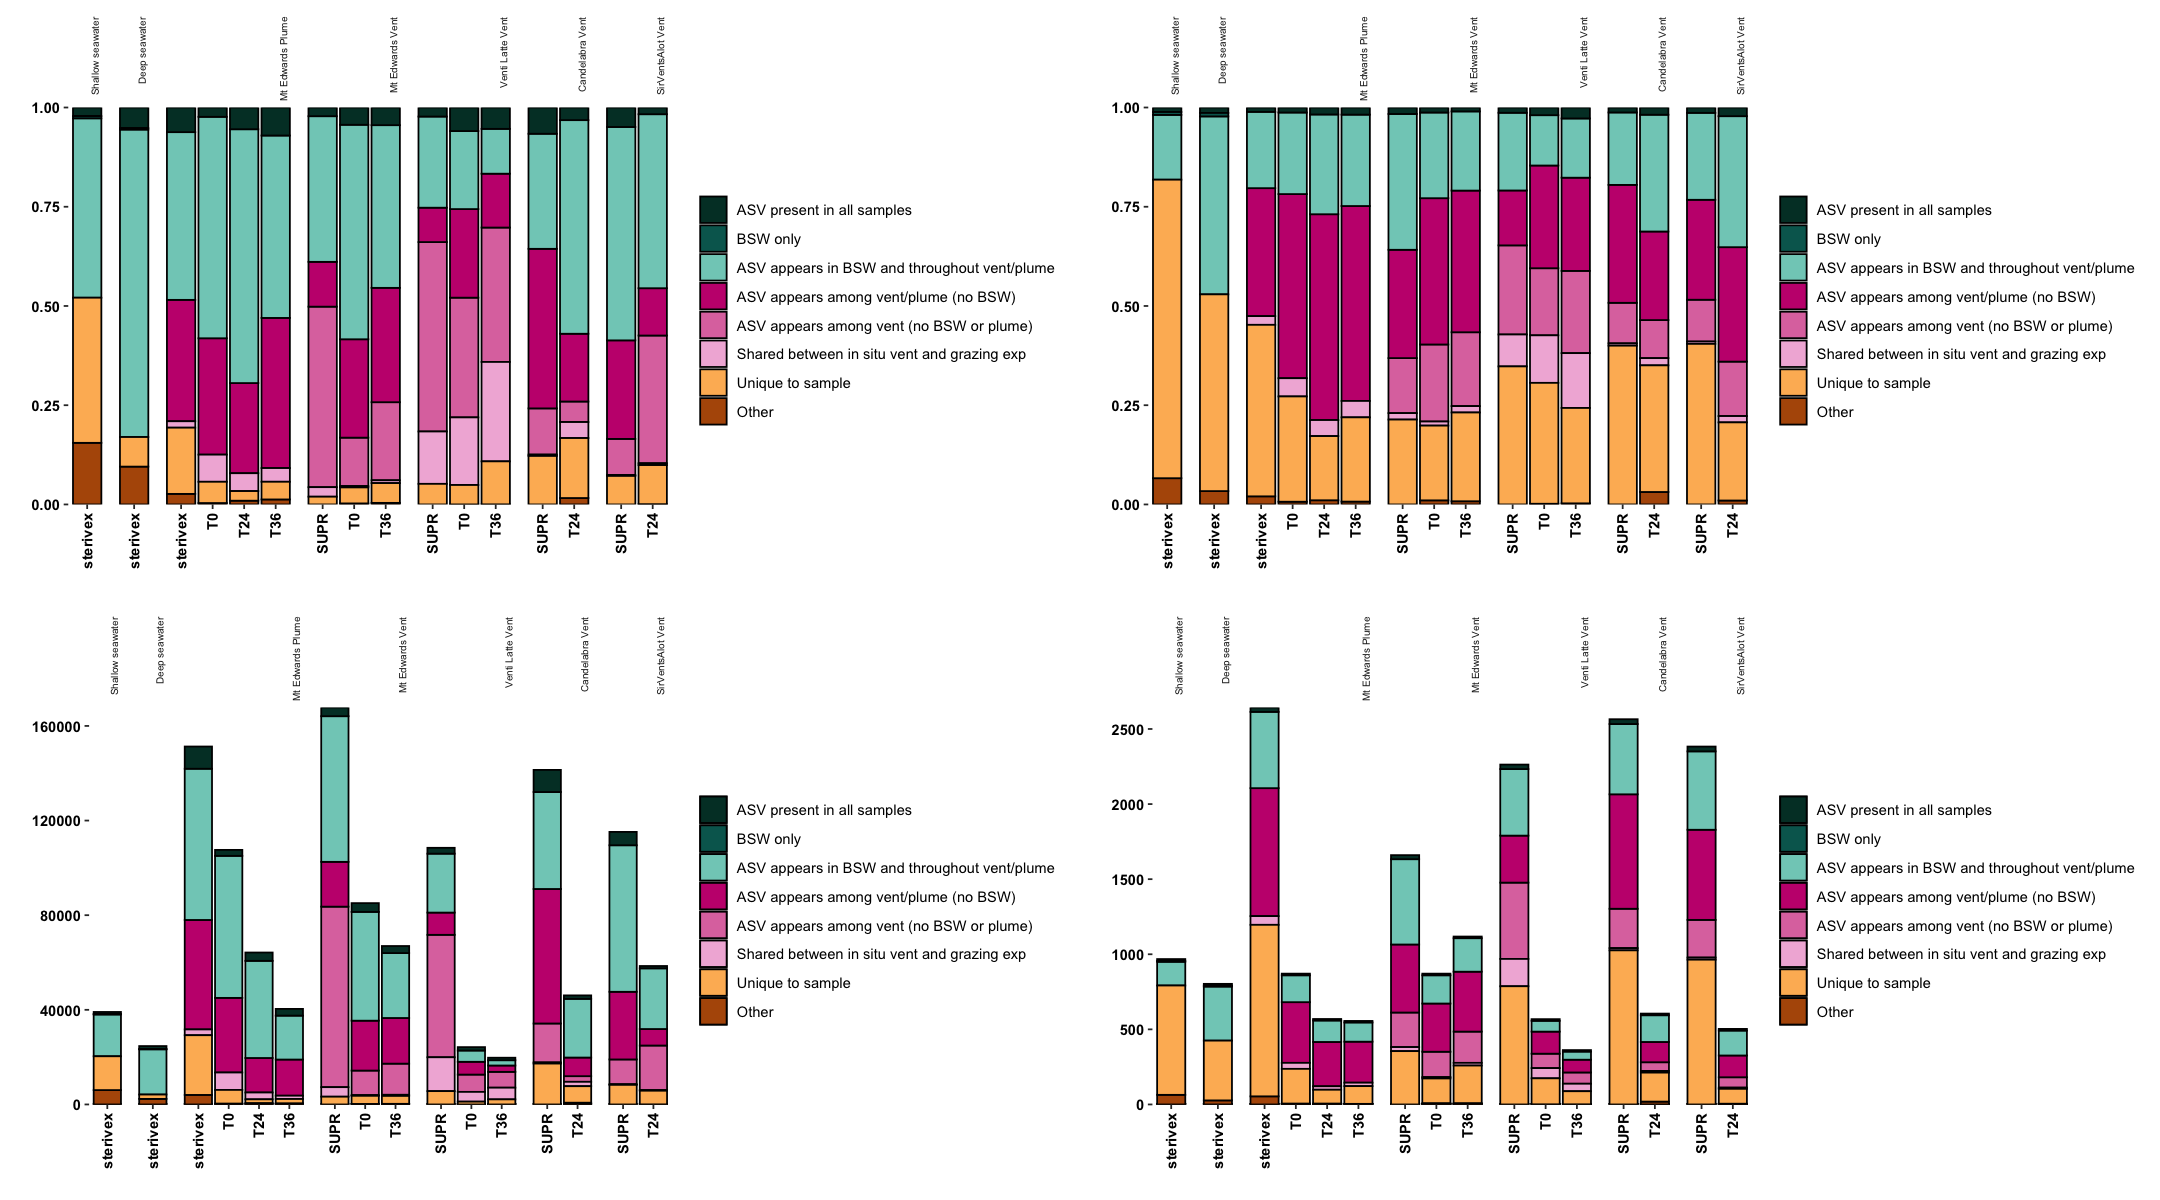

In [294]:
totalseq <- ggplot(gr_sorted_summary, aes(x=SAMPLEID, y=totalseq, fill=CATEGORY_ORDER)) +
  geom_bar(stat = "identity", color = "black", position = "fill") + 
#   scale_fill_brewer(palette = "Accent") +
  scale_fill_manual(values = category_color) +
  scale_y_continuous(expand = c(0, 0)) +
  facet_grid(. ~ LOCATION_ORDER, space = "free", scales = "free")+
  theme(legend.position = "right",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold"),
        axis.text.y = element_text(color="black", face="bold"),
        strip.text = element_text(size = 6, angle = 90, vjust = 0, hjust = 1),
        strip.background = element_blank(),
        legend.title = element_blank()) +
  labs(x="", y="")
# totalseq
#
# plot_grid(totalseq + geom_bar(stat = "identity", color = "black", position = "stack"), totalseq, ncol = 1, nrow = 2, align = "hv")
#
totalasv <- ggplot(gr_sorted_summary, aes(x=SAMPLEID, y= totalasv, fill=CATEGORY_ORDER)) +
  geom_bar(stat = "identity", color = "black", position = "fill") + 
#   scale_fill_brewer(palette = "Accent") +
  scale_fill_manual(values = category_color) +
  scale_y_continuous(expand = c(0, 0)) +
  facet_grid(. ~ LOCATION_ORDER, space = "free", scales = "free") +
  theme(legend.position = "right",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold"),
        axis.text.y = element_text(color="black", face="bold"),
        strip.text = element_text(size = 6, angle = 90, vjust = 0, hjust = 1),
        strip.background = element_blank(),
        legend.title = element_blank()) +
  labs(x="", y="")
# totalasv
#
# svg("SUPP-asv-distribution-totalseqasv.svg", h=11, w=19)
# plot_grid(totalseq, totalasv)
options(repr.plot.width = 18, repr.plot.height = 10)

# Supplementary table
plot_grid(totalseq, totalasv,
          totalseq + geom_bar(stat = "identity", color = "black", position = "stack"), 
          totalasv + geom_bar(stat = "identity", color = "black", position = "stack"))
# dev.off()

`summarise()` regrouping output by 'SAMPLE', 'Sampletype', 'LocationName', 'SAMPLEID' (override with `.groups` argument)



[1] Grazing in situ
Levels: control Control Grazing in situ

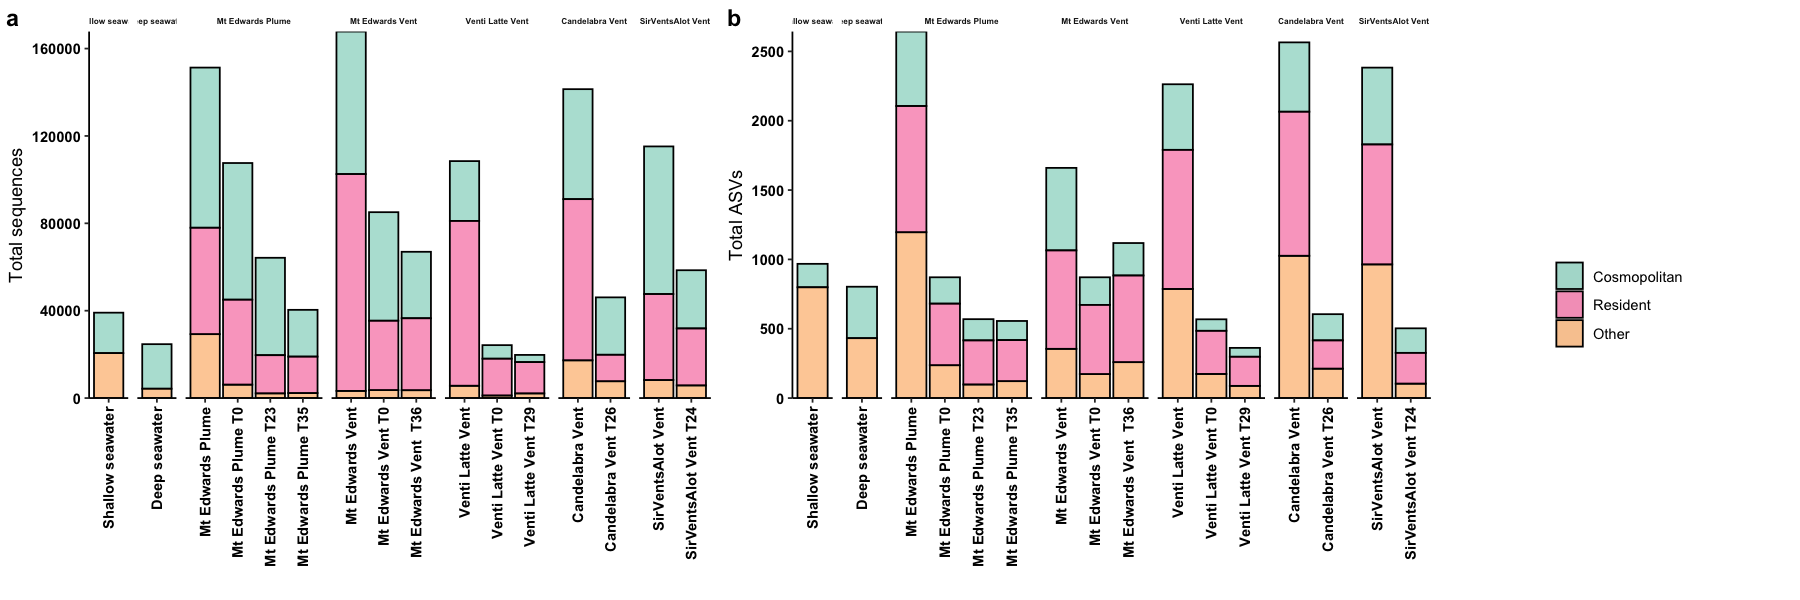

In [288]:
#
# Simplify!
#
resident <- c("ASV appears among vent/plume (no BSW)", "ASV appears among vent (no BSW or plume)", "Shared between in situ vent and grazing exp")
cosmo <- c("ASV appears in BSW and throughout vent/plume", "ASV present in all samples")
gr_sorted$RES_COSMO = "Other"
gr_sorted$RES_COSMO[gr_sorted$category_final %in% resident] = "Resident"
gr_sorted$RES_COSMO[gr_sorted$category_final %in% cosmo] = "Cosmopolitan"
#
# head(gr_sorted[1:2,])
# ?unite()
gr_sorted_bydist <- gr_sorted %>%
  unite("SAMPLE", c("LocationName", "Sampletype", "SAMPLEID"), sep = " ", remove = FALSE) %>%
  group_by(SAMPLE, Sampletype, LocationName, SAMPLEID, RES_COSMO) %>%
  summarise(totalasv = n(), totalseq = sum(COUNT_AVG)) %>%
  data.frame
# head(gr_sorted_bydist)
#
sample_order_all<-c("Shallow seawater in situ sterivex","Deep seawater in situ sterivex","Mt Edwards Plume in situ sterivex","Mt Edwards Plume Grazing T0","Mt Edwards Plume Grazing T24","Mt Edwards Plume Grazing T36","Mt Edwards Vent in situ SUPR","Mt Edwards Vent Grazing T0","Mt Edwards Vent Grazing T36","Venti Latte Vent in situ SUPR","Venti Latte Vent Grazing T0","Venti Latte Vent Grazing T36","Candelabra Vent in situ SUPR","Candelabra Vent Grazing T24","SirVentsAlot Vent in situ SUPR","SirVentsAlot Vent Grazing T24")
sample_name_all<-c("Shallow seawater","Deep seawater","Mt Edwards Plume","Mt Edwards Plume T0","Mt Edwards Plume T23","Mt Edwards Plume T35","Mt Edwards Vent","Mt Edwards Vent T0","Mt Edwards Vent  T36","Venti Latte Vent","Venti Latte Vent T0","Venti Latte Vent T29","Candelabra Vent","Candelabra Vent T26","SirVentsAlot Vent","SirVentsAlot Vent T24")
gr_sorted_bydist$SAMPLE_ORDER <- factor(gr_sorted_bydist$SAMPLE, levels = sample_order_all, labels = sample_name_all)
#
LocationNameOrder<-c("Shallow seawater", "Deep seawater", "Mt Edwards Plume", "Mt Edwards Vent", "Venti Latte Vent", "Candelabra Vent", "SirVentsAlot Vent")
gr_sorted_bydist$LOCATION_ORDER <- factor(gr_sorted_bydist$LocationName, levels = LocationNameOrder)
unique(gr_sorted_bydist$Sampletype)

category_order_simple <- c("Cosmopolitan", "Resident", "Other")
category_color_simple <- c("#7fcdbb", "#f768a1", "#fdae61")
gr_sorted_bydist$CATEGORY_ORDER <- factor(gr_sorted_bydist$RES_COSMO, levels = category_order_simple)
names(category_color_simple) <- category_order_simple


filled_seq <- ggplot(gr_sorted_bydist, aes(x = SAMPLE_ORDER, y = totalseq)) +
  geom_bar(stat = "identity", position = "stack", color = "black", 
           alpha = 0.6, aes(fill = CATEGORY_ORDER)) +
  scale_fill_manual(values = category_color_simple) +
  facet_grid(. ~ LOCATION_ORDER, space = "free", scales = "free") +
  scale_y_continuous(expand = c(0,0)) +
  theme(legend.position = "right",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(),
        # panel.border = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold"),
        axis.text.y = element_text(color="black", face="bold"),
        strip.text = element_text(size = 5, face = "bold"),
        strip.background = element_blank(),
        legend.title = element_blank()) +
  labs(x="", y="Total sequences")
#
filled_asv <- ggplot(gr_sorted_bydist, aes(x = SAMPLE_ORDER, y= totalasv)) +
  geom_bar(stat = "identity", position = "stack", color = "black", 
           alpha = 0.6, aes(fill = CATEGORY_ORDER)) +
  scale_fill_manual(values = category_color_simple) +
  facet_grid(. ~ LOCATION_ORDER, space = "free", scales = "free") +
  scale_y_continuous(expand = c(0,0)) +
  theme(legend.position = "right",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(),
        # panel.border = element_blank(),
        panel.background = element_blank(),
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold"),
        axis.text.y = element_text(color="black", face="bold"),
        strip.text = element_text(size = 5, face = "bold"),
        strip.background = element_blank(),
        legend.title = element_blank()) +
  labs(x="", y="Total ASVs")
#
legend<-get_legend(filled_seq)
# svg("dist-seq-asv.svg", h = 5, w = 15)
options(repr.plot.width = 15, repr.plot.height = 5)
plot_grid(filled_seq + theme(legend.position = "none"), 
          filled_asv + theme(legend.position = "none"),
          legend, ncol = 3, nrow = 1, rel_widths = c(1,1,0.5), labels = c("a", "b", ""))
# dev.off()

In [133]:
head(gr_sorted)
unique(gr_sorted$Sampletype)

Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG category_final                              
1 Unassigned           80        Unique to sample                            
2 Unassigned           36        ASV appears in BSW and throughout vent/plume
3 Unassigned           12        ASV appears in BSW and throughout vent/plume
4 Unassigned           34        ASV appears in BSW and throughout vent/plume
5 Unassigned           15        ASV appears in BSW and throughout vent/plume
6 Opisthokonta-Metazoa 21        ASV appears in BSW and throughout vent/plume
  RES_COSMO   
1 Other       
2 Cosmopolitan
3 Cosmopolitan
4 Cosmopolitan
5 Cosmopolitan
6 Cosmopolitan

[1] in situ Grazing
Levels: control Control Grazing in situ

In [167]:
# Re-sum / sort data for pie chart
#
gr_sorted_pies <- gr_sorted %>%
    mutate(LOCALE_0 = case_when(
        grepl("BSW", LOCATION_SPECIFIC) ~ "Background",
        grepl("Plume", LOCATION_SPECIFIC) ~ "Plume",
        TRUE ~ "Vent")) %>% 
    unite(LOCALE, LOCALE_0, Sampletype, sep = " ") %>% 
    group_by(LOCALE, RES_COSMO) %>% 
    summarise(SEQ_SUM = sum(COUNT_AVG),
             ASV_NUM = n_distinct(Feature.ID)) %>% 
    data.frame
# head(gr_sorted_pies)
unique(gr_sorted_pies$LOCALE)

category_order_simple <- c("Cosmopolitan", "Resident", "Other")
category_color_simple <- c("#7fcdbb", "#f768a1", "#fdae61")
gr_sorted_pies$CATEGORY_ORDER <- factor(gr_sorted_pies$RES_COSMO, levels = category_order_simple)
names(category_color_simple) <- category_order_simple

tmp_leg <- ggplot(gr_sorted_pies, aes (x = LOCALE, y = SEQ_SUM)) +
    geom_bar(stat = "identity", position = "fill", color = "black", 
           alpha = 0.6, aes(fill = CATEGORY_ORDER)) +
    scale_fill_manual(values = category_color_simple) +
    scale_y_continuous(expand = c(0,0)) +
    labs(x="", y="") +
    coord_polar("y", start = 0) +
    theme_void() +
    theme(legend.title = element_blank())
legend_pies <- get_legend(tmp_leg)

sum_seqs <- ggplot(gr_sorted_pies, aes (x = LOCALE, y = SEQ_SUM, label = SEQ_SUM)) +
    geom_bar(stat = "identity", position = "fill", color = "white", 
           alpha = 0.6, aes(fill = CATEGORY_ORDER)) +
    scale_fill_manual(values = category_color_simple) +
    scale_y_continuous(expand = c(0,0)) +
    labs(x="", y="") +
    coord_polar("y", start = 0) +
    theme_void() +
    theme(legend.position = "none")#+
#     geom_text_repel()
# sum_seqs
asv_total <- ggplot(gr_sorted_pies, aes (x = LOCALE, y = ASV_NUM, label = ASV_NUM)) +
    geom_bar(stat = "identity", position = "fill", color = "white", 
           alpha = 0.6, aes(fill = CATEGORY_ORDER)) +
    scale_fill_manual(values = category_color_simple) +
    scale_y_continuous(expand = c(0,0)) +
    labs(x="", y="") +
    coord_polar("y", start = 0) +
    theme_void() +
#     geom_text_repel()+
    theme(legend.position = "none") 

options(repr.plot.width = 15, repr.plot.height = 5)


# svg("ASV-dist-locale.svg", w = 15, h = 5)
plot_grid(asv_total %+% subset(gr_sorted_pies, LOCALE == "Background in situ"),
          asv_total %+% subset(gr_sorted_pies, LOCALE == "Plume Grazing"),
          asv_total %+% subset(gr_sorted_pies, LOCALE == "Plume in situ"),
          asv_total %+% subset(gr_sorted_pies, LOCALE == "Vent Grazing"),
          asv_total %+% subset(gr_sorted_pies, LOCALE == "Vent in situ"),
          legend_pies, ncol = 3, nrow = 2,
         labels = c("ASV TOTAL - Background", "Plume grazing", "Plume in situ", "Vent grazing", "Vent in situ"))
dev.off()
# svg("Sequence-dist-locale.svg", w = 15, h = 5)
plot_grid(sum_seqs %+% subset(gr_sorted_pies, LOCALE == "Background in situ"),
          sum_seqs %+% subset(gr_sorted_pies, LOCALE == "Plume Grazing"),
          sum_seqs %+% subset(gr_sorted_pies, LOCALE == "Plume in situ"),
          sum_seqs %+% subset(gr_sorted_pies, LOCALE == "Vent Grazing"),
          sum_seqs %+% subset(gr_sorted_pies, LOCALE == "Vent in situ"),
          legend_pies, ncol = 3, nrow = 2,
         labels = c("SEQUENCE - Background", "Plume grazing", "Plume in situ", "Vent grazing", "Vent in situ"))
# dev.off()

`summarise()` regrouping output by 'LOCALE' (override with `.groups` argument)



[1] "Background in situ" "Plume Grazing"      "Plume in situ"     
[4] "Vent Grazing"       "Vent in situ"

null device 
          1

In [ ]:
# save(gr_sorted, asv_key_final, file = "data-input/GR-countinfo-withASVdistribution.RData")

## Generate taxa plots - additional resolution and by distribution

In [119]:
load("data-input/GordaRidge-ASVtable-avg-22-07-2020.RData",verbose=T)
load("data-input/GR-countinfo-withASVdistribution.RData", verbose=T)

Loading objects:
  gr_counts_filter
  gr_counts_wtax
  gr_counts_avg_wtax
Loading objects:
  gr_sorted
  asv_key_final


In [120]:
## Recurate taxa for next level
head(gr_counts_avg_wtax[1:3,])
unique(gr_counts_avg_wtax$Taxa)

Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
  LocationName     Taxon     level1    level2     level3 level4 level5 level6
1 Shallow seawater Eukaryota Eukaryota Unassigned                            
2 Shallow seawater Eukaryota Eukaryota Unassigned                            
3 Venti Latte Vent Eukaryota Eukaryota Unassigned                            
  level7 Taxa       COUNT_AVG
1        Unassigned 80       
2        Unassigned 36       
3        Unassigned 12

[1] "Unassigned"                 "Opisthokonta-Metazoa"      
 [3] "Alveolata-Ciliates"         "Opisthokonta-Other"        
 [5] "Stramenopiles-Ochrophyta"   "Rhizaria-other"            
 [7] "Alveolata-Dinoflagellates"  "Opisthokonta-Fungi"        
 [9] "Stramenopiles-Other"        "Hacrobia-Haptophyta"       
[11] "Archaeplastida-Chlorophyta" "Stramenopiles-MAST"        
[13] "Archaeplastida-Other"       "Alveolata-Syndiniales"     
[15] "Excavata"                   "Alveolata-Other"           
[17] "Hacrobia-Cryptophyta"       "Hacrobia-Other"            
[19] "Rhizaria-Cercozoa"          "Amoebozoa"

In [121]:
head(gr_counts_avg_wtax)
str(gr_counts_avg_wtax)

Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG
1 Unassigned           80       
2 Unassigned           36       
3 Unassigned           12       
4 Unassigned           34       
5 Unassigned           15       
6 Opisthokonta-Metazoa 21

'data.frame':	19308 obs. of  15 variables:
 $ Feature.ID       : Factor w/ 14483 levels "0009645516609bda2246e1955ff9ec1d",..: 1 5 5 5 5 7 7 7 7 7 ...
 $ SAMPLEID         : chr  "sterivex" "sterivex" "SUPR" "SUPR" ...
 $ Sampletype       : Factor w/ 4 levels "control","Control",..: 4 4 4 4 3 4 4 4 4 4 ...
 $ LOCATION_SPECIFIC: Factor w/ 24 levels "BSW020","BSW056",..: 3 3 14 19 24 2 3 5 6 7 ...
 $ LocationName     : Factor w/ 9 levels "Candelabra Vent",..: 6 6 9 1 8 2 6 4 4 4 ...
 $ Taxon            : Factor w/ 580 levels "Eukaryota","Eukaryota;Alveolata",..: 1 1 1 1 1 379 379 379 379 379 ...
 $ level1           : Factor w/ 1 level "Eukaryota": 1 1 1 1 1 1 1 1 1 1 ...
 $ level2           : chr  "Unassigned" "Unassigned" "Unassigned" "Unassigned" ...
 $ level3           : Factor w/ 32 levels "","Alveolata_X",..: 1 1 1 1 1 21 21 21 21 21 ...
 $ level4           : Factor w/ 106 levels "","Acantharea",..: 1 1 1 1 1 20 20 20 20 20 ...
 $ level5           : Factor w/ 175 levels "","Acanthare

In [122]:
# Add Taxa2 level
expand_taxa2 <- function(df){
    df$Taxa <- as.character(df$Taxa)
    df$level5 <- as.character(df$level5)
    df$level4 <- as.character(df$level4)
    df$level3 <- as.character(df$level3)
    df$Taxa2 <- df$Taxa
    five <- c("Alveolata-Syndiniales", "Alveolata-Dinoflagellates")
    df$Taxa2 <- with(df, ifelse(Taxa2 %in% five, df$level5, df$Taxa2))
    four <- c("Alveolata-Ciliates", "Rhizaria-other", "Stramenopiles-MAST", "Stramenopiles-Ochrophyta", "Opisthokonta-Metazoa", "Opisthokonta-Fungi", "Opisthokonta-Other")
    df$Taxa2 <- with(df, ifelse(Taxa2 %in% four, df$level4, df$Taxa2))
    three <- c("Hacrobia-Other")
    df$Taxa2 <- with(df, ifelse(Taxa2 %in% three, df$level3, df$Taxa2))
    df2 <- mutate(df, Taxa2 = ifelse(Taxa2 %in% "", Taxa, Taxa2)) %>% 
            mutate(Taxa2 = ifelse(Taxa2 %in% "Spirotrichea", paste(level4, level5, sep = "-"), Taxa2))
    return(df2)
    }
gr_counts_avg_wtax2 <- expand_taxa2(gr_counts_avg_wtax)
head(gr_counts_avg_wtax2)
unique(gr_counts_avg_wtax2$Taxa2)

Feature.ID                       SAMPLEID Sampletype LOCATION_SPECIFIC
1 0009645516609bda2246e1955ff9ec1d sterivex in situ    BSW081           
2 0030ad8ce44f257c42daf3673bf92197 sterivex in situ    BSW081           
3 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent040          
4 0030ad8ce44f257c42daf3673bf92197 SUPR     in situ    Vent088          
5 0030ad8ce44f257c42daf3673bf92197 T24      Grazing    Vent110          
6 0038478be7fb4f097ce93a5e9341af2a sterivex in situ    BSW056           
  LocationName      Taxon                                                      
1 Shallow seawater  Eukaryota                                                  
2 Shallow seawater  Eukaryota                                                  
3 Venti Latte Vent  Eukaryota                                                  
4 Candelabra Vent   Eukaryota                                                  
5 SirVentsAlot Vent Eukaryota                                                  
6 Deep seawater     Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa
  level1    level2       level3  level4   level5     level6   level7
1 Eukaryota Unassigned                                              
2 Eukaryota Unassigned                                              
3 Eukaryota Unassigned                                              
4 Eukaryota Unassigned                                              
5 Eukaryota Unassigned                                              
6 Eukaryota Opisthokonta Metazoa Cnidaria Cnidaria_X Hydrozoa       
  Taxa                 COUNT_AVG Taxa2     
1 Unassigned           80        Unassigned
2 Unassigned           36        Unassigned
3 Unassigned           12        Unassigned
4 Unassigned           34        Unassigned
5 Unassigned           15        Unassigned
6 Opisthokonta-Metazoa 21        Cnidaria

[1] "Unassigned"                  "Cnidaria"                   
 [3] "Spirotrichea-Strombidiida"   "Opisthokonta-Other"         
 [5] "Bacillariophyta"             "RAD-B"                      
 [7] "Alveolata-Dinoflagellates"   "Opisthokonta-Fungi"         
 [9] "Stramenopiles-Other"         "Dictyochophyceae"           
[11] "Opisthokonta-Metazoa"        "Hacrobia-Haptophyta"        
[13] "Chrysophyceae"               "Archaeplastida-Chlorophyta" 
[15] "MAST-4"                      "Spirotrichea-Spirotrichea_X"
[17] "Archaeplastida-Other"        "Spirotrichea-Choreotrichida"
[19] "Dino-Group-II"               "Chytridiomycota"            
[21] "Arthropoda"                  "MOCH-3"                     
[23] "Dinophyceae_X"               "Bolidophyceae"              
[25] "Kickxellomycota"             "MAST-7"                     
[27] "Mollusca"                    "Gymnodiniales"              
[29] "Plagiopylea"                 "Dino-Group-IV"              
[31] "Spirotrichea-Euplotia"       "Opisthokonta_XX"            
[33] "Basidiomycota"               "Nemertea"                   
[35] "MAST-8"                      "Polycystinea"               
[37] "Annelida"                    "Acantharea"                 
[39] "Excavata"                    "Spirotrichea-Tintinnida"    
[41] "Oligohymenophorea"           "Litostomatea"               
[43] "Pelagophyceae"               "Gonyaulacales"              
[45] "Rotifera"                    "MAST-2"                     
[47] "Alveolata-Other"             "Spirotrichea-"              
[49] "Craniata"                    "Suessiales"                 
[51] "Hacrobia-Cryptophyta"        "Katablepharidophyta"        
[53] "Rhizaria-Cercozoa"           "Colpodea"                   
[55] "Spirotrichea-Hypotrichia"    "Phyllopharyngea"            
[57] "Alveolata-Ciliates"          "Stramenopiles-Ochrophyta"   
[59] "Choanoflagellatea"           "Heterotrichea"              
[61] "Centroheliozoa"              "Amoebozoa"                  
[63] "Synurophyceae"               "Noctilucales"               
[65] "Telonemia"                   "MAST-3"                     
[67] "Ascomycota"                  "Picozoa"                    
[69] "Urochordata"                 "Nematoda"                   
[71] "Peridiniales"                "Ctenophora"                 
[73] "Prostomatea_1"               "Echinodermata"              
[75] "Mucoromycota"                "Karyorelictea"              
[77] "MAST-9"                      "Ciliophora_X"               
[79] "MAST-25"                     "Dino-Group-I"               
[81] "Microsporidiomycota"         "Platyhelminthes"            
[83] "Spirotrichea-Strombidiida_G" "RAD-C"                      
[85] "Porifera"

In [123]:
# Add categories & set up for plotting function
gr_tax_res <- gr_counts_avg_wtax2 %>% 
    left_join(asv_key_final) %>% 
    unite(SAMPLE, LocationName, Sampletype, SAMPLEID, sep = "-", remove = FALSE) %>% 
    data.frame
#
resident <- c("ASV appears among vent/plume (no BSW)", "ASV appears among vent (no BSW or plume)", "Shared between in situ vent and grazing exp")
cosmo <- c("ASV appears in BSW and throughout vent/plume", "ASV present in all samples")
gr_tax_res$RES_COSMO = "Other"
gr_tax_res$RES_COSMO[gr_tax_res$category_final %in% resident] = "Resident"
gr_tax_res$RES_COSMO[gr_tax_res$category_final %in% cosmo] = "Cosmopolitan"
#
head(gr_tax_res[1:2,])

#
# Subset and plot function
#
# all <- c("Unique to sample","ASV appears in BSW and throughout vent/plume",
#          "ASV appears among vent/plume (no BSW)","Shared between in situ vent and grazing exp",
#          "ASV appears among vent (no BSW or plume)","Other","ASV present in all samples","BSW only")
# vent <- c("ASV appears among vent/plume (no BSW)","Shared between in situ vent and grazing exp",
#          "ASV appears among vent (no BSW or plume)")
sample_order_all<-c("Shallow seawater-in situ-sterivex","Deep seawater-in situ-sterivex","Mt Edwards Plume-in situ-sterivex","Mt Edwards Plume-Grazing-T0","Mt Edwards Plume-Grazing-T24","Mt Edwards Plume-Grazing-T36","Mt Edwards Vent-in situ-SUPR","Mt Edwards Vent-Grazing-T0","Mt Edwards Vent-Grazing-T36","Venti Latte Vent-in situ-SUPR","Venti Latte Vent-Grazing-T0","Venti Latte Vent-Grazing-T36","Candelabra Vent-in situ-SUPR","Candelabra Vent-Grazing-T24","SirVentsAlot Vent-in situ-SUPR","SirVentsAlot Vent-Grazing-T24")
sample_name_all<-c("Shallow seawater","Deep seawater","Mt Edwards Plume","Mt Edwards Plume T0","Mt Edwards Plume T23","Mt Edwards Plume T35","Mt Edwards Vent","Mt Edwards Vent T0","Mt Edwards Vent  T36","Venti Latte Vent","Venti Latte Vent T0","Venti Latte Vent T29","Candelabra Vent","Candelabra Vent T26","SirVentsAlot Vent","SirVentsAlot Vent T24")


# prepdf_tax_dist <- function(df, category){ 
prepdf_tax_dist <- function(df){ 
    df2 <- df %>% 
#     filter(category_final %in% category) %>% 
    # average across replicates
    group_by(Feature.ID, RES_COSMO, SAMPLE, SAMPLEID, Sampletype, LocationName, Taxon, Taxa, Taxa2) %>%
    summarise(COUNT_AVG2 = mean(COUNT_AVG)) %>%
    ungroup() %>% 
    # sum by like taxa
    group_by(RES_COSMO, SAMPLE, SAMPLEID, Sampletype, LocationName, Taxa, Taxa2) %>% 
    summarise(SUM = sum(COUNT_AVG2)) %>% 
    data.frame
    df2$SAMPLENAME<-factor(df2$SAMPLE, levels = sample_order_all, labels = sample_name_all)
    df2$SAMPLEID_ORDER <- factor(df2$SAMPLEID, levels = c("sterivex", "SUPR", "T0", "T24", "T36"))
    df2$LOCATION_ORDER <- factor(df2$LocationName, levels=c("Shallow seawater", "Deep seawater", "Mt Edwards Plume", "Mt Edwards Vent", "Venti Latte Vent", "Candelabra Vent", "SirVentsAlot Vent"))
    return(df2)
}

Joining, by = "Feature.ID"



Feature.ID                       SAMPLE                            SAMPLEID
1 0009645516609bda2246e1955ff9ec1d Shallow seawater-in situ-sterivex sterivex
2 0030ad8ce44f257c42daf3673bf92197 Shallow seawater-in situ-sterivex sterivex
  Sampletype LOCATION_SPECIFIC LocationName     Taxon     level1    level2    
1 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
2 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
  level3 level4 level5 level6 level7 Taxa       COUNT_AVG Taxa2     
1                                    Unassigned 80        Unassigned
2                                    Unassigned 36        Unassigned
  category_final                               RES_COSMO   
1 Unique to sample                             Other       
2 ASV appears in BSW and throughout vent/plume Cosmopolitan

In [124]:
# Prep plot for exploring taxonomic distribution
gr_tax_res_toplot <- prepdf_tax_dist(gr_tax_res)
head(gr_tax_res_toplot[1:2,])
class(gr_tax_res_toplot)

`summarise()` regrouping output by 'Feature.ID', 'RES_COSMO', 'SAMPLE', 'SAMPLEID', 'Sampletype', 'LocationName', 'Taxon', 'Taxa' (override with `.groups` argument)

`summarise()` regrouping output by 'RES_COSMO', 'SAMPLE', 'SAMPLEID', 'Sampletype', 'LocationName', 'Taxa' (override with `.groups` argument)



RES_COSMO    SAMPLE                      SAMPLEID Sampletype LocationName   
1 Cosmopolitan Candelabra Vent-Grazing-T24 T24      Grazing    Candelabra Vent
2 Cosmopolitan Candelabra Vent-Grazing-T24 T24      Grazing    Candelabra Vent
  Taxa               Taxa2                     SUM  SAMPLENAME         
1 Alveolata-Ciliates Heterotrichea              241 Candelabra Vent T26
2 Alveolata-Ciliates Spirotrichea-Strombidiida 2495 Candelabra Vent T26
  SAMPLEID_ORDER LOCATION_ORDER 
1 T24            Candelabra Vent
2 T24            Candelabra Vent

[1] "data.frame"

In [125]:
unique(gr_tax_res_toplot$SAMPLENAME)

[1] Candelabra Vent T26   Candelabra Vent       Deep seawater        
 [4] Mt Edwards Plume T0   Mt Edwards Plume T23  Mt Edwards Plume T35 
 [7] Mt Edwards Plume      Mt Edwards Vent T0    Mt Edwards Vent  T36 
[10] Mt Edwards Vent       Shallow seawater      SirVentsAlot Vent T24
[13] SirVentsAlot Vent     Venti Latte Vent T0   Venti Latte Vent T29 
[16] Venti Latte Vent     
16 Levels: Shallow seawater Deep seawater ... SirVentsAlot Vent T24

In [126]:
# Plot ciliate distribution
# tmp <- unique(filter(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa == "Alveolata-Ciliates"))
# unique(tmp$Taxa2)
# barplot_taxa2(filter(gr_tax_res_toplot, !(RES_COSMO == "Other")), "Alveolata-Ciliates", "RdPu")
# Factor
ciliate_order <- c("Heterotrichea","Karyorelictea","Litostomatea","Oligohymenophorea","Phyllopharyngea","Plagiopylea","Spirotrichea-","Spirotrichea-Choreotrichida","Spirotrichea-Euplotia","Spirotrichea-Hypotrichia","Spirotrichea-Spirotrichea_X","Spirotrichea-Strombidiida","Spirotrichea-Strombidiida_G","Spirotrichea-Tintinnida","Alveolata-Ciliates")
gr_tax_res_toplot$CILIATE_ORDER <- factor(gr_tax_res_toplot$Taxa2, levels = ciliate_order)
CILIATE_COLOR <- c("#ffffcc","#d9f0a3","#addd8e","#78c679","#31a354","#006837","#fde0dd","#fcc5c0","#fa9fb5","#f768a1","#dd3497","#ae017e","#7a0177","#49006a","#bdbdbd")
names(CILIATE_COLOR)<-ciliate_order
# head(gr_tax_res_toplot)
ciliate_plot <- gr_tax_res_toplot %>% 
    filter(Taxa %in% "Alveolata-Ciliates") %>% 
    filter(!(RES_COSMO == "Other")) %>% 
    ggplot(aes(x = SAMPLENAME, y = SUM, fill = CILIATE_ORDER)) +
    geom_bar(stat = "identity", position = "fill", color = "black") +
    scale_fill_manual(values = CILIATE_COLOR) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text.x = element_blank(),
          strip.background = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Relative abundance")+
    facet_grid(RES_COSMO~LOCATION_ORDER, space = "free", scales = "free")
options(repr.plot.width = 10, repr.plot.height = 8)
ciliate_plot

In [127]:
# Heterotrophs - non-ciliate
tax_order<-c("Alveolata-Dinoflagellates","Alveolata-Other","Dinophyceae_X","Gonyaulacales","Gymnodiniales","Peridiniales","Suessiales","Noctilucales","Dino-Group-I","Dino-Group-II","Dino-Group-IV","MAST-2","MAST-3","MAST-4","MAST-7","MAST-8","MAST-9","MAST-25","Bacillariophyta","Bolidophyceae","Chrysophyceae","Dictyochophyceae","MOCH-3","Pelagophyceae","Synurophyceae","Stramenopiles-Ochrophyta","Stramenopiles-Other","Rhizaria-Cercozoa","Acantharea","Polycystinea","RAD-B","RAD-C","Hacrobia-Cryptophyta","Hacrobia-Haptophyta","Katablepharidophyta","Telonemia","Picozoa","Centroheliozoa")
color_order<-c("#f7f4f9","#e7e1ef","#d4b9da","#df65b0","#e7298a","#ce1256","#980043","#67001f","#fee0d2","#fc9272","#de2d26","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#f7fcf5","#e5f5e0","#c7e9c0","#a1d99b","#74c476","#41ab5d","#238b45","#006d2c","#00441b","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#bfd3e6","#9ebcda","#8c96c6","#8c6bb1","#88419d","#810f7c")
gr_tax_res_toplot$TAXORDER <- factor(gr_tax_res_toplot$Taxa2, levels = tax_order)
names(color_order) <- tax_order

hets_plot <- ggplot(gr_tax_res_toplot, aes(x = SAMPLENAME, y = SUM, fill = TAXORDER)) +
    geom_bar(stat = "identity", position = "fill", color = "black") +
    scale_fill_manual(values = color_order) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text.x = element_blank(),
          strip.background = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Relative abundance")+
    facet_grid(RES_COSMO~LOCATION_ORDER, space = "free", scales = "free")

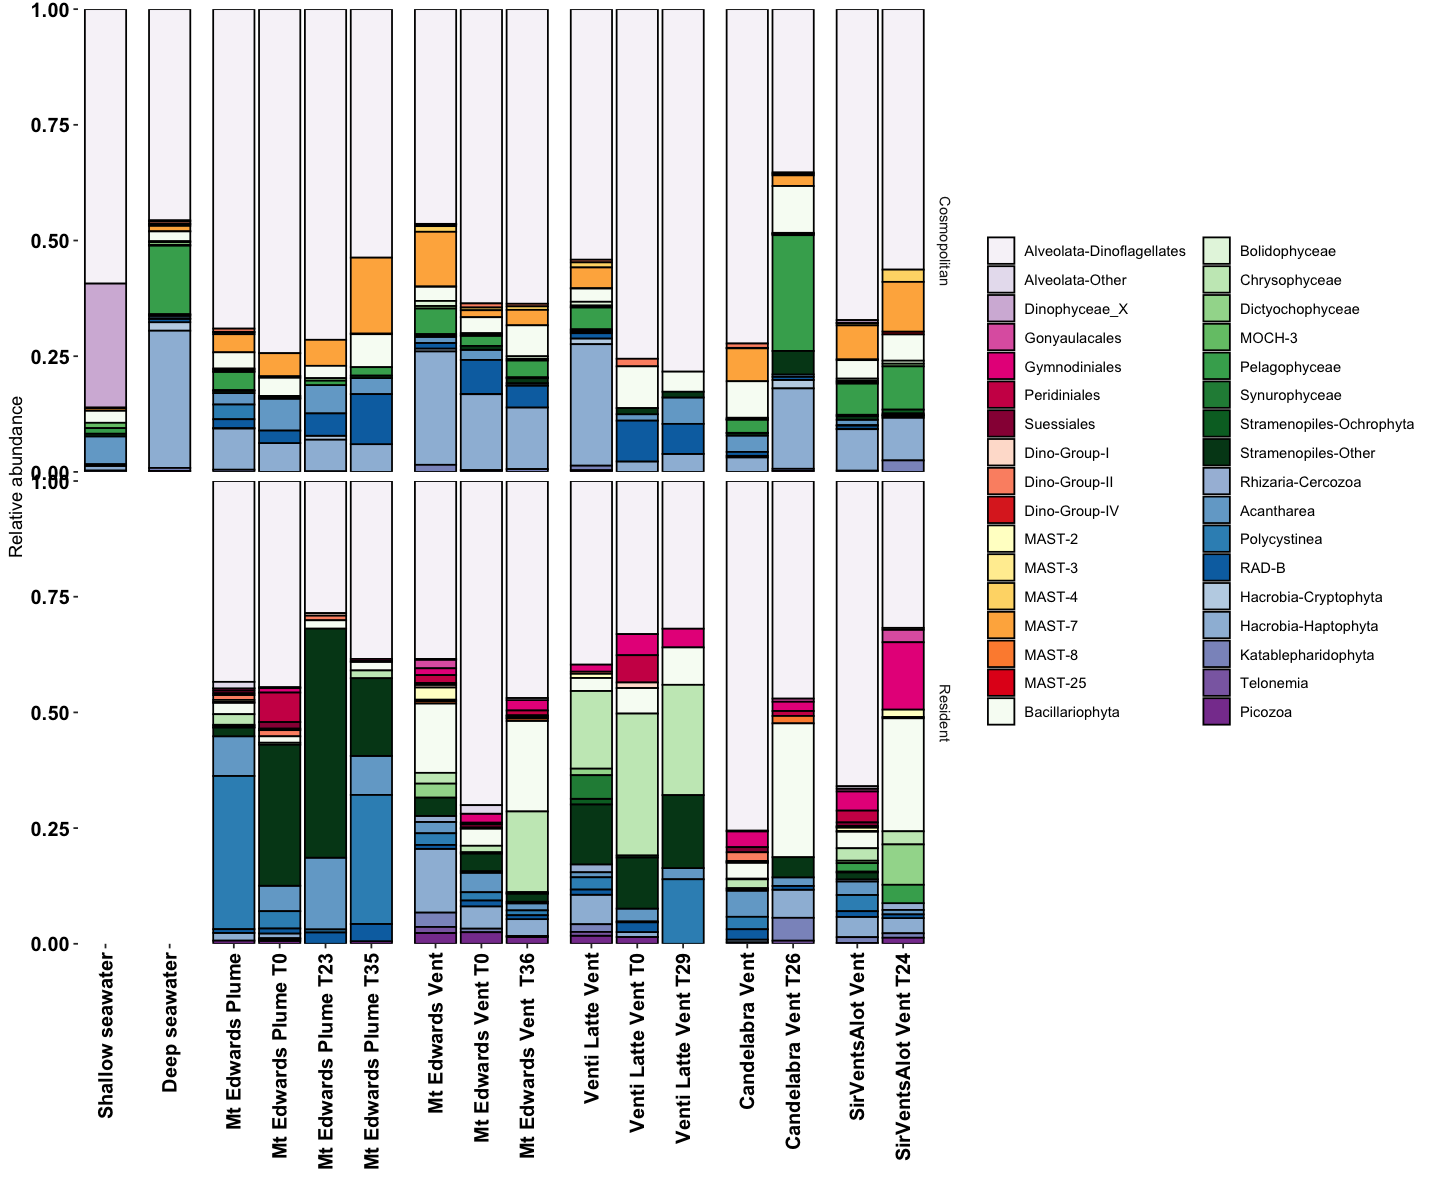

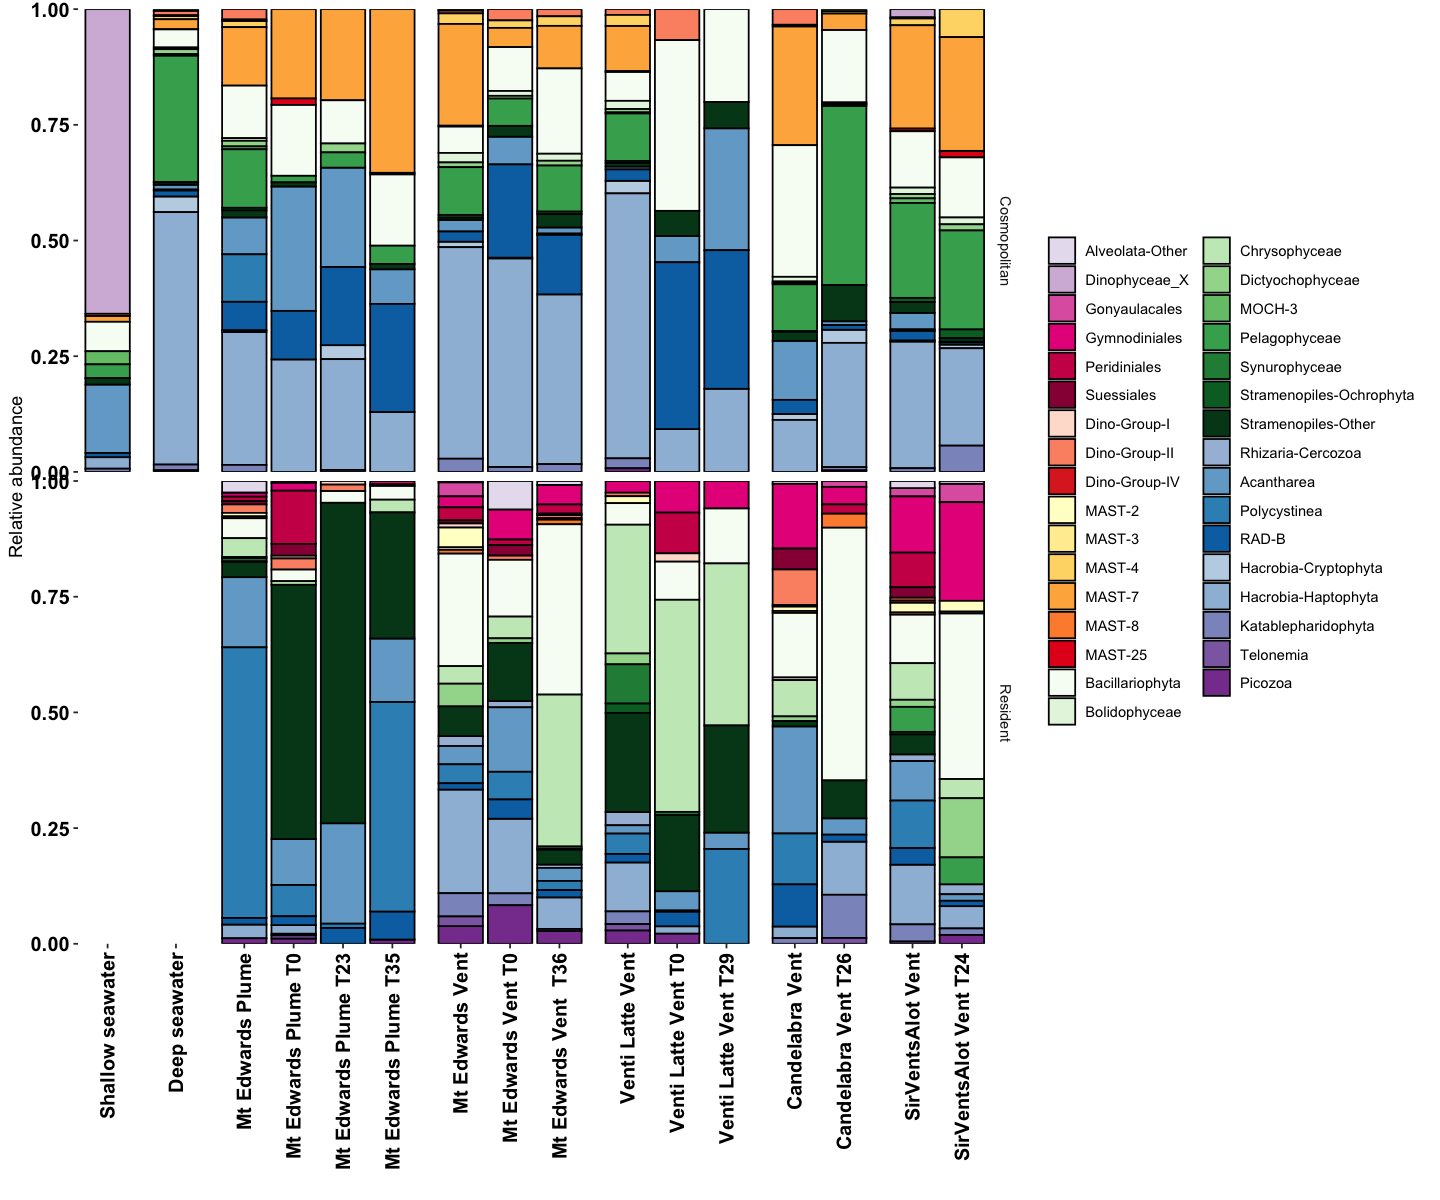

In [128]:
taxa_select <- c('Alveolata-Dinoflagellates',
                 'Hacrobia-Cryptophyta','Hacrobia-Haptophyta','Hacrobia-Other','Rhizaria-other',
                 'Stramenopiles-MAST','Stramenopiles-Ochrophyta','Stramenopiles-Other','Alveolata-Syndiniales',
                 'Alveolata-Other','Rhizaria-Cercozoa')

options(repr.plot.width = 12, repr.plot.height = 10)

hets_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% taxa_select)
hets_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% taxa_select & !(Taxa2 == "Alveolata-Dinoflagellates"))

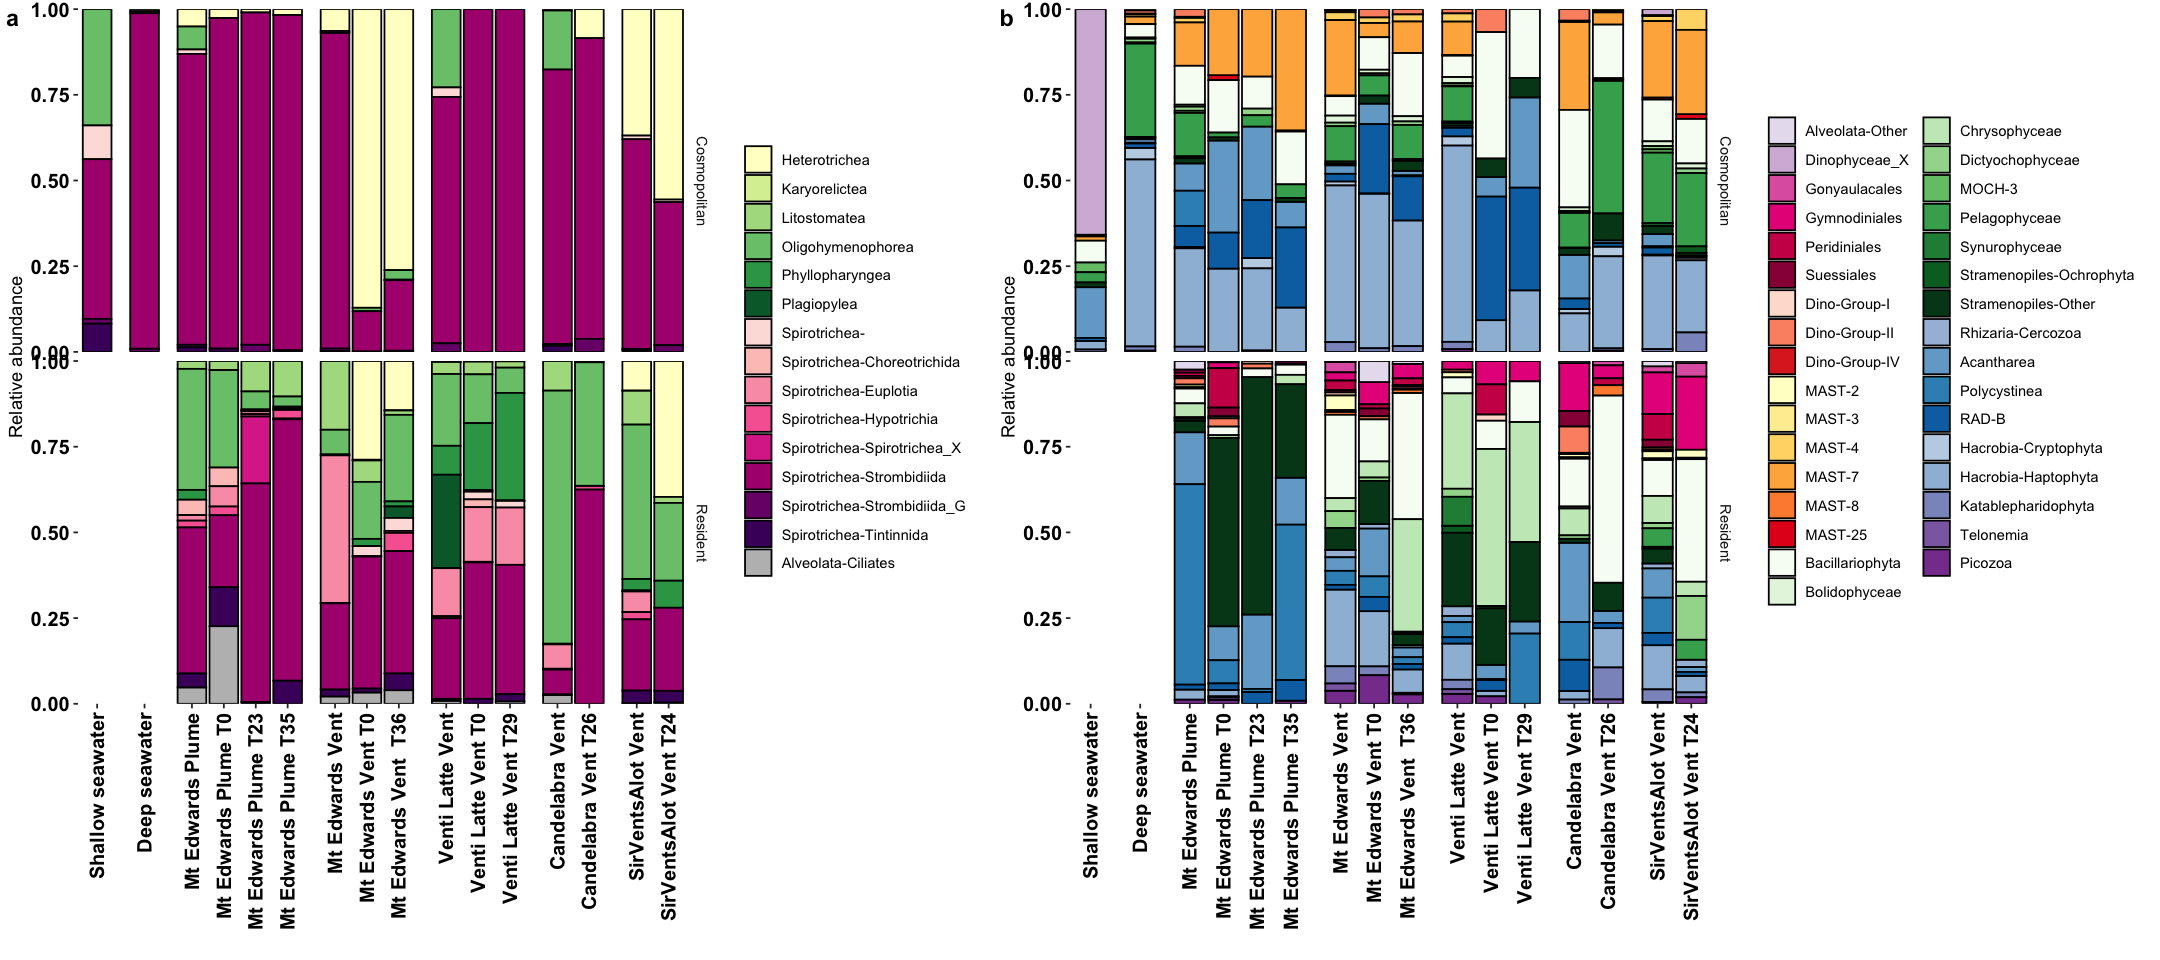

In [129]:
options(repr.plot.width = 18, repr.plot.height = 8)

# svg("tax-res-withdist-GR.svg", w = 18, h = 8)
plot_grid(ciliate_plot,
         hets_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% taxa_select & !(Taxa2 == "Alveolata-Dinoflagellates")),
         ncol = 2, labels = c("a", "b"), rel_widths = c(0.85, 1))
# dev.off()

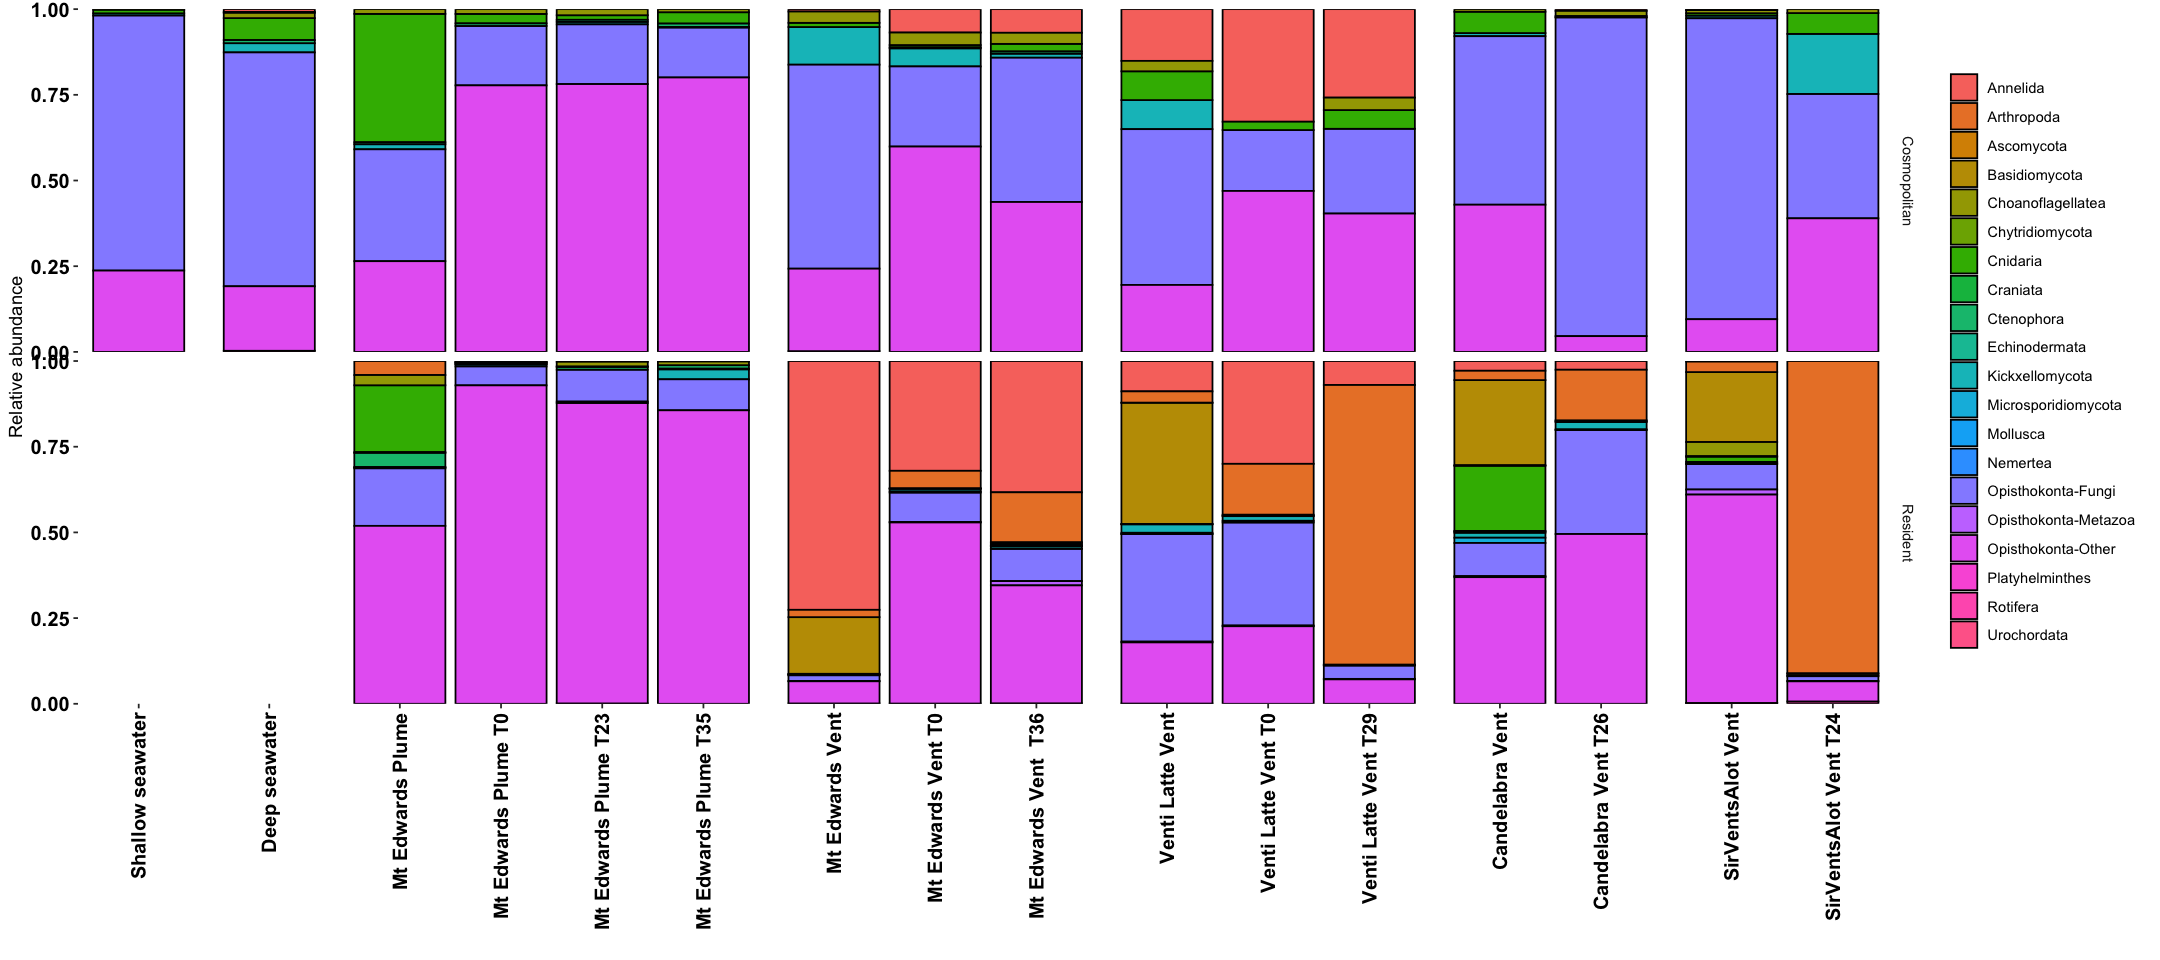

In [130]:
# Heterotrophs - non-ciliate
# tax_order<-c("Alveolata-Dinoflagellates","Alveolata-Other","Dinophyceae_X","Gonyaulacales","Gymnodiniales","Peridiniales","Suessiales","Noctilucales","Dino-Group-I","Dino-Group-II","Dino-Group-IV","MAST-2","MAST-3","MAST-4","MAST-7","MAST-8","MAST-9","MAST-25","Bacillariophyta","Bolidophyceae","Chrysophyceae","Dictyochophyceae","MOCH-3","Pelagophyceae","Synurophyceae","Stramenopiles-Ochrophyta","Stramenopiles-Other","Rhizaria-Cercozoa","Acantharea","Polycystinea","RAD-B","RAD-C","Hacrobia-Cryptophyta","Hacrobia-Haptophyta","Katablepharidophyta","Telonemia","Picozoa","Centroheliozoa")
# color_order<-c("#f7f4f9","#e7e1ef","#d4b9da","#df65b0","#e7298a","#ce1256","#980043","#67001f","#fee0d2","#fc9272","#de2d26","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#f7fcf5","#e5f5e0","#c7e9c0","#a1d99b","#74c476","#41ab5d","#238b45","#006d2c","#00441b","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#bfd3e6","#9ebcda","#8c96c6","#8c6bb1","#88419d","#810f7c")
# gr_tax_res_toplot$TAXORDER <- factor(gr_tax_res_toplot$Taxa2, levels = tax_order)
# names(color_order) <- tax_order
meta <- c("Opisthokonta-Metazoa", "Opisthokonta-Fungi", "Opisthokonta-Other")
supp_plot <- ggplot(gr_tax_res_toplot, aes(x = SAMPLENAME, y = SUM, fill = Taxa2)) +
    geom_bar(stat = "identity", position = "fill", color = "black") +
#     scale_fill_manual(values = color_order) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text.x = element_blank(),
          strip.background = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Relative abundance")+
    facet_grid(RES_COSMO~LOCATION_ORDER, space = "free", scales = "free")
supp_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% meta)

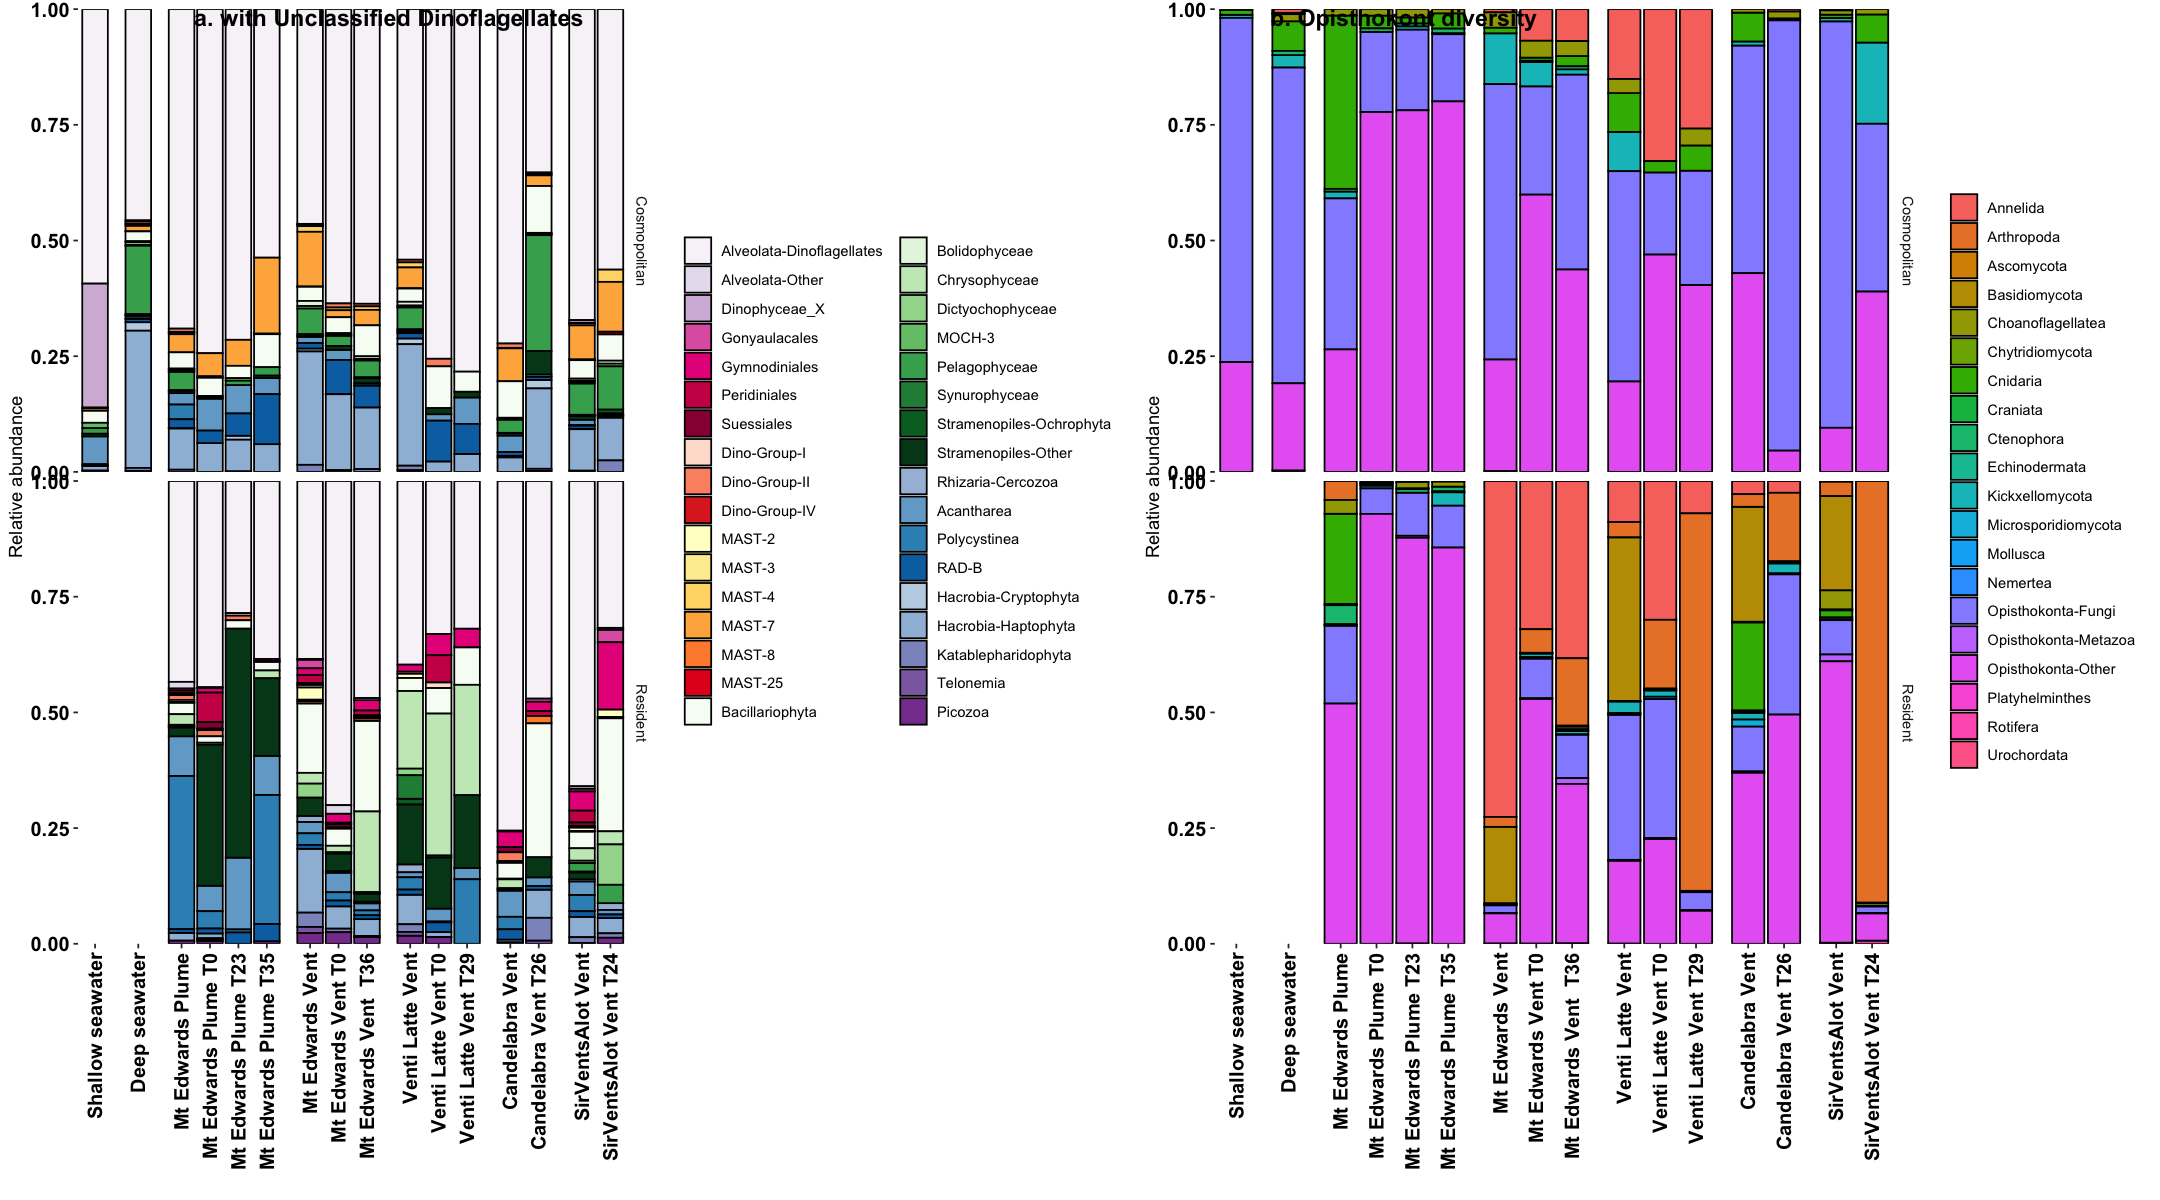

In [131]:
# Supplementary figure
options(repr.plot.width = 18, repr.plot.height = 10)

# svg("supplementary-tax-res.svg", w = 18, h = 10)
plot_grid(
    hets_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% taxa_select),
    supp_plot %+% subset(gr_tax_res_toplot, !(RES_COSMO == "Other") & Taxa %in% meta),
    labels = c("a. with Unclassified Dinoflagellates", "b. Opisthokont diversity"), rel_widths = c(1, 0.9),
    align = "h", ncol = 2)
# dev.off()
# ?plot_grid()

In [132]:
# What are the most abundant ASVs in each of the taxa2 categories?
head(gr_tax_res[1:2,])
unique(gr_tax_res$Sampletype)

Feature.ID                       SAMPLE                            SAMPLEID
1 0009645516609bda2246e1955ff9ec1d Shallow seawater-in situ-sterivex sterivex
2 0030ad8ce44f257c42daf3673bf92197 Shallow seawater-in situ-sterivex sterivex
  Sampletype LOCATION_SPECIFIC LocationName     Taxon     level1    level2    
1 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
2 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
  level3 level4 level5 level6 level7 Taxa       COUNT_AVG Taxa2     
1                                    Unassigned 80        Unassigned
2                                    Unassigned 36        Unassigned
  category_final                               RES_COSMO   
1 Unique to sample                             Other       
2 ASV appears in BSW and throughout vent/plume Cosmopolitan

[1] in situ Grazing
Levels: control Control Grazing in situ

In [133]:
gr_topASV_taxa2 <- gr_tax_res %>% 
#     select(Feature.ID, RES_COSMO, Sampletype, Taxa, Taxa2, COUNT_AVG) %>%
#     group_by(Feature.ID, RES_COSMO, Sampletype, Taxa, Taxa2) %>% 
    select(Feature.ID, RES_COSMO, Taxa, Taxa2, Taxon, COUNT_AVG) %>%
    group_by(Feature.ID, RES_COSMO, Taxa, Taxa2, Taxon) %>% 
    summarise(Total = sum(COUNT_AVG)) %>% 
    ungroup() %>% 
    group_by(Taxa, Taxa2) %>%
    arrange(Taxa2, desc(Total)) %>% 
    top_n(10, Total) %>% 
    data.frame
# gr_topASV_taxa2
write_delim(gr_topASV_taxa2, path = "supptable-topASVs-taxa2.txt", delim = "\t")
# save(gr_tax_res, file = "GR-18S-ASV-list.RData")

`summarise()` regrouping output by 'Feature.ID', 'RES_COSMO', 'Taxa', 'Taxa2' (override with `.groups` argument)



## Plot ASV abun by location

In [137]:
head(gr_tax_res[1:2,])
unique(gr_tax_res$LocationName)


Feature.ID                       SAMPLE                            SAMPLEID
1 0009645516609bda2246e1955ff9ec1d Shallow seawater-in situ-sterivex sterivex
2 0030ad8ce44f257c42daf3673bf92197 Shallow seawater-in situ-sterivex sterivex
  Sampletype LOCATION_SPECIFIC LocationName     Taxon     level1    level2    
1 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
2 in situ    BSW081            Shallow seawater Eukaryota Eukaryota Unassigned
  level3 level4 level5 level6 level7 Taxa       COUNT_AVG Taxa2     
1                                    Unassigned 80        Unassigned
2                                    Unassigned 36        Unassigned
  category_final                               RES_COSMO   
1 Unique to sample                             Other       
2 ASV appears in BSW and throughout vent/plume Cosmopolitan

[1] Shallow seawater  Venti Latte Vent  Candelabra Vent   SirVentsAlot Vent
[5] Deep seawater     Mt Edwards Plume  Mt Edwards Vent  
9 Levels: Candelabra Vent Deep seawater Lab blank ... Venti Latte Vent

In [158]:
# gr_asv_abun <- gr_tax_res %>% 
#     select(Feature.ID, Sampletype, LocationName, Taxa, COUNT_AVG, RES_COSMO) %>% 
#     mutate(LOCALE = case_when(
#         grepl("seawater", LocationName) ~ "Background",
#         grepl("Plume", LocationName) ~ "Plume",
#         grepl("Vent", LocationName) ~ "Vent")) %>% 
#     group_by(Feature.ID, Taxa, RES_COSMO, LOCALE, Sampletype) %>% 
#     summarise(AVG_ASV_ABUN = mean(COUNT_AVG)) %>% 
#     unite(LOCALE_TYPE_CAT, LOCALE, Sampletype, RES_COSMO, sep = "_", remove = TRUE) %>% 
#     pivot_wider(names_from = LOCALE_TYPE_CAT, values_from = AVG_ASV_ABUN, values_fill = 0) %>% 
#     unite(UNIQUE, Feature.ID, Taxa, sep = "_") %>% 
#     column_to_rownames(var = "UNIQUE") %>% 
#     data.frame
# # head(gr_asv_abun)
# gr_asv_clr<-data.frame(compositions::clr(t(gr_asv_abun)))
# # head(gr_asv_clr)
# gr_asv_clr_df <- data.frame(t(gr_asv_clr)) %>% 
#     rownames_to_column(var = "UNIQUE") %>% 
#     pivot_longer(Background_in.situ_Other:Vent_Grazing_Other) %>% 
#     separate(UNIQUE, c("Feature.ID", "TAXA"), sep = "_") %>% 
#     separate(name, c("LOCATION", "SAMPLETYPE", "CATEGORY"), sep = "_") %>% 
#     unite(LOCALE, LOCATION, SAMPLETYPE, sep = " ", remove = FALSE) %>% 
#     data.frame
# head(gr_asv_clr_df)

`summarise()` regrouping output by 'Feature.ID', 'Taxa', 'RES_COSMO', 'LOCALE' (override with `.groups` argument)



Feature.ID                        TAXA       LOCALE             LOCATION  
1 X0009645516609bda2246e1955ff9ec1d Unassigned Background in.situ Background
2 X0009645516609bda2246e1955ff9ec1d Unassigned Background in.situ Background
3 X0009645516609bda2246e1955ff9ec1d Unassigned Vent Grazing       Vent      
4 X0009645516609bda2246e1955ff9ec1d Unassigned Vent in.situ       Vent      
5 X0009645516609bda2246e1955ff9ec1d Unassigned Plume Grazing      Plume     
6 X0009645516609bda2246e1955ff9ec1d Unassigned Plume in.situ      Plume     
  SAMPLETYPE CATEGORY     value   
1 in.situ    Other        2.895767
2 in.situ    Cosmopolitan 0.000000
3 Grazing    Cosmopolitan 0.000000
4 in.situ    Cosmopolitan 0.000000
5 Grazing    Cosmopolitan 0.000000
6 in.situ    Cosmopolitan 0.000000

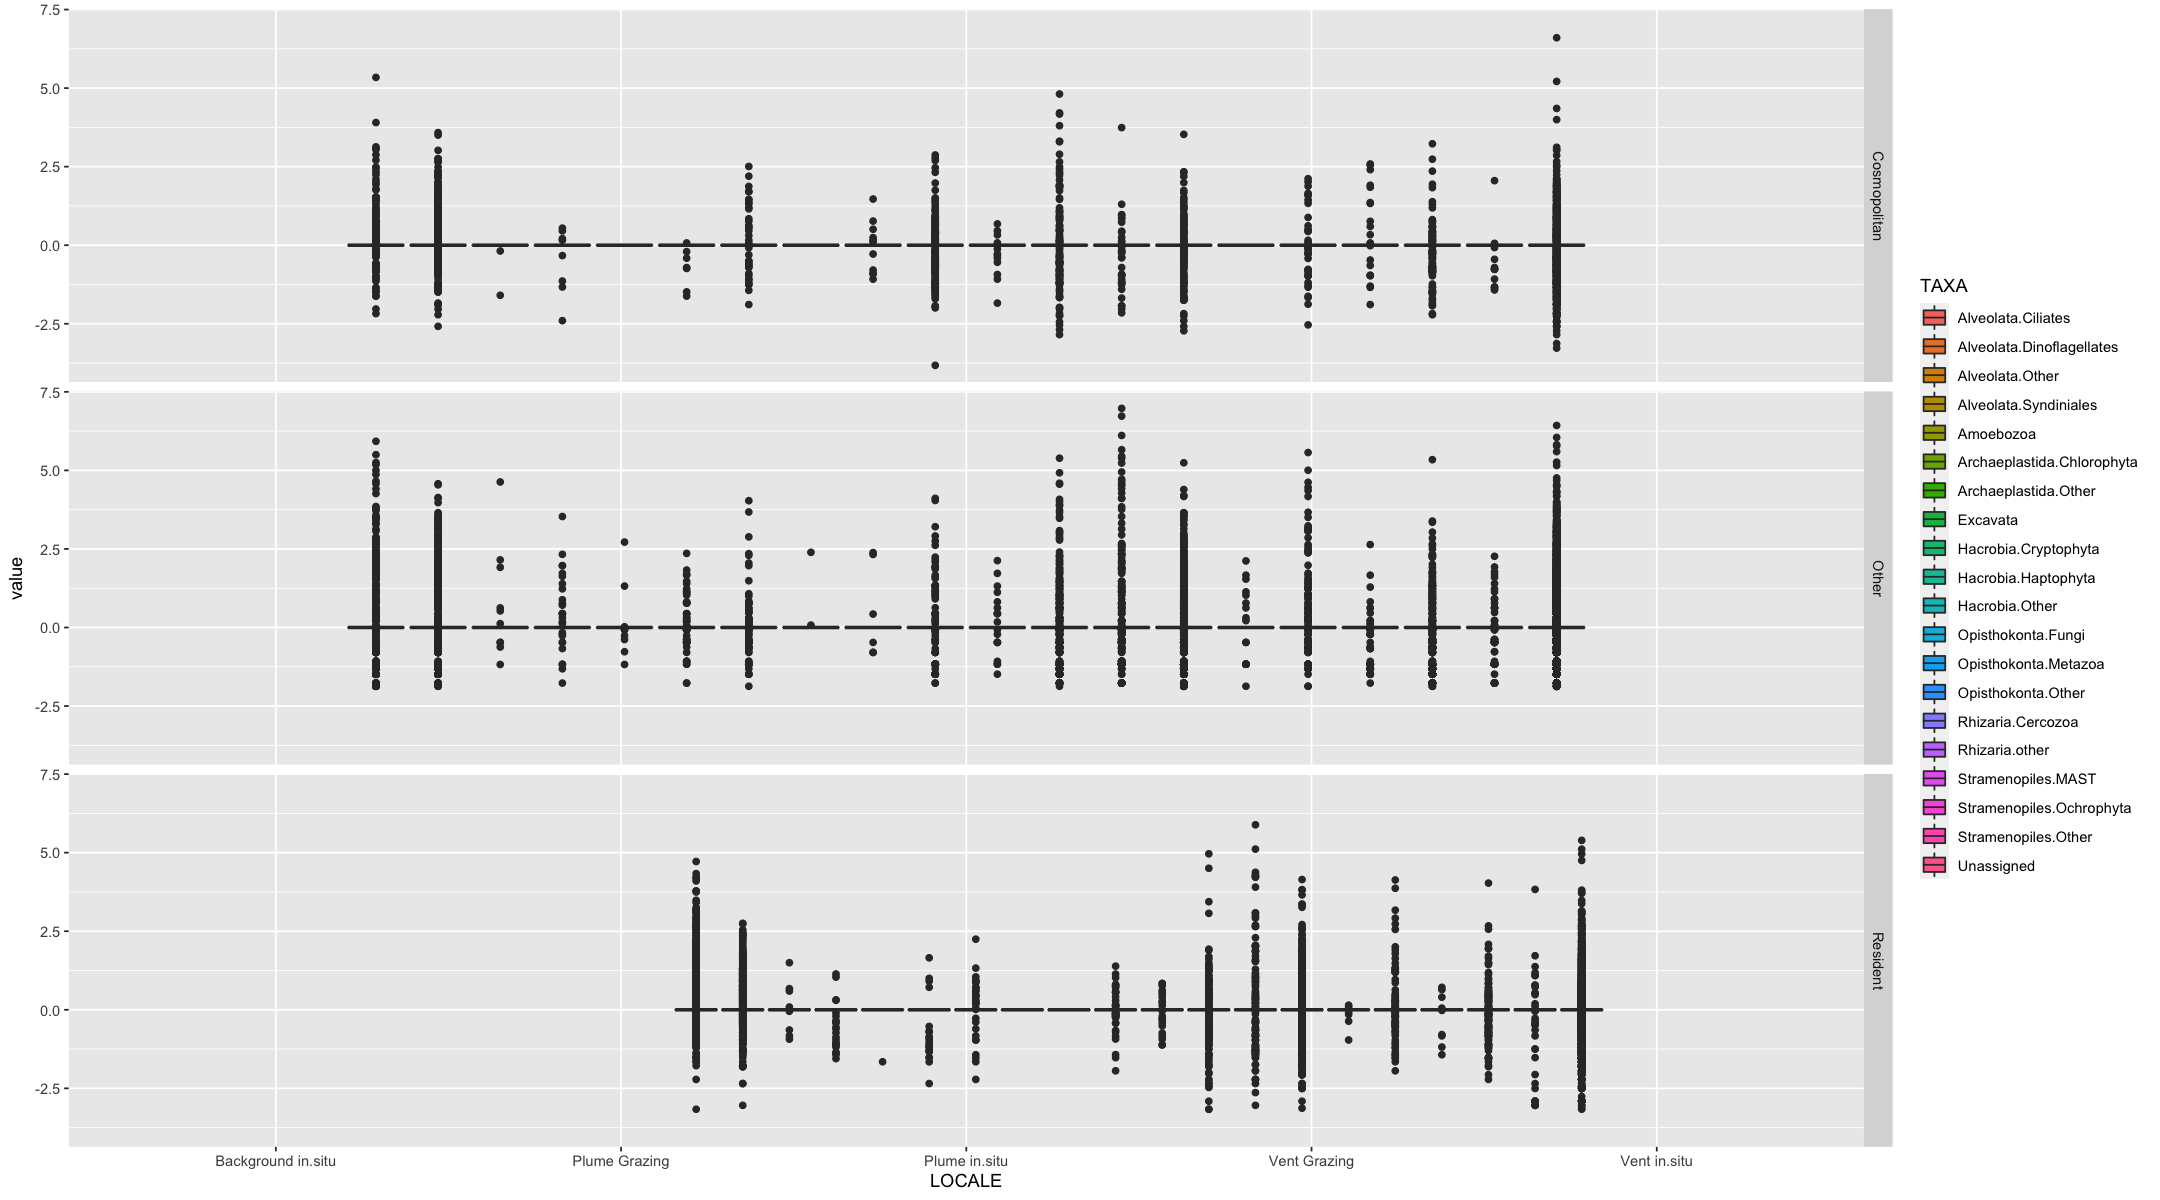

In [163]:
# ggplot(gr_asv_clr_df, aes(x = LOCALE, y = value, fill = TAXA, group = TAXA)) +
# #     geom_jitter(stat = "identity", shape = 21, color = "black", alpha = 0.3) +
#     geom_boxplot(aes(group = TAXA)) +
#     facet_grid(CATEGORY ~ .)

## Identify ASVs of interest from 18S-derived data based on diversity observations
Use these ASVs downstream to explore hypotheses with correlation results

* **H1**: _What are the more abundant cosmo and resident ASVs among ciliates - esp named grouped above?_ Hypothesis: the composition of 16S ASVs that significantly correlated with the 18S ASVs is different between the cosmo and resident 18S ASVs. This would suggest that prey composition is attracting these taxa.
* **H2**: _What 18S ASVs are significantly correlated to the 16S ASVs considered to be “vent-specific”?_ Hypothesis: no clear pattern will emerge (with respect to taxonomic group or 18S prevalent among vent site - meaning, resident or cosmo). This would mean that protists are found throughout the deep sea, but are specifically enriched at the vent site. So both cosmopolitan and resident protists may be associated with the 16S vent-specific signature. This is similar to Murdock and Juniper, where there was not a consistent pattern in those that were significant correlated to vent-endemic 16S. 

In [170]:
# Prep 16S and 18S data for correlation analysis:
#
# 18S
#
euk_data <- gr_sorted %>%
  select(-LOCATION_SPECIFIC, -Taxon, Domain = level1, Phylum = level2, Class = level3, Order = level4, Family = level5, Genus = level6, Species = level7, -Taxa, COUNT = COUNT_AVG) %>% 
  add_column(domain = "euk") %>% 
  select(Category = category_final, everything(), -SAMPLEID, -Sampletype) %>% 
  data.frame
#
# 16S
#
bac_data <- countbac_df_cat %>% 
  select(Category = bsw_presence, everything(), -ASV_SUM_ALL, -ASV_REL_ABUN) %>% 
  pivot_longer(cols = c(starts_with("NA")), names_to = "SAMPLEID_16S", values_to = "COUNT") %>% 
  left_join(ventnames_16) %>% 
  filter(!(is.na(LocationName) | STATUS == "old")) %>%
  select(-SAMPLE_AMY, -SAMPLEID_16S, -SAMPLEID, -Sampletype, -STATUS, -FLUIDORIGIN) %>%
  add_column(domain = "prok") %>% 
  data.frame
head(bac_data[1:2,])
#
# Taxonomy key files
#
tax_key_corr <- euk_data %>% 
  bind_rows(bac_data) %>% 
  select(-Category, -LocationName, -COUNT) %>% 
  distinct() %>% 
  unite(FEATURE, Feature.ID,domain, sep = "_") %>% 
  data.frame
# save(euk_data, bac_data, tax_key_corr, file = "correlation-analyses-objects.RData")

Joining, by = "SAMPLEID_16S"



Category       Feature.ID                       Domain  Phylum        
1 present in bsw 139ad7417ef0dfb630699faea2eb5e06 Archaea Thaumarchaeota
2 present in bsw 139ad7417ef0dfb630699faea2eb5e06 Archaea Thaumarchaeota
  Class           Order            Family            Genus                     
1 Nitrososphaeria Nitrosopumilales Nitrosopumilaceae uncultured marine archaeon
2 Nitrososphaeria Nitrosopumilales Nitrosopumilaceae uncultured marine archaeon
  Species                    COUNT LocationName     domain
1 uncultured marine archaeon 1179  Mt Edwards Plume prok  
2 uncultured marine archaeon 2971  Mt Edwards Plume prok

In [171]:
# Subset data (filter) and perform CLR transformation
# ASV must appear in more than 3 samples
# ASV must have at least 10 sequences
#
euk_prefilter <- euk_data %>% 
  filter(!(Phylum == "Unassigned")) %>%
  group_by(Feature.ID) %>% 
  mutate(sample_appear = n_distinct(LocationName)) %>% #ASV must appear in more than 1 sample
  filter(sample_appear > 3) %>% 
  filter(COUNT > 9) %>% #ASV must have at least a certain # of sequences
  ungroup() %>% 
  select(Feature.ID, COUNT, LocationName) %>% 
  add_column(domain = "euk") %>% 
  unite(FEATURE, domain, Feature.ID, sep = "_", remove = TRUE) %>% 
  group_by(FEATURE, LocationName) %>% 
  summarise(COUNT_mean = mean(COUNT),
            .groups = "rowwise") %>% 
  pivot_wider(names_from = LocationName, values_from = COUNT_mean, values_fill = list(COUNT_mean = 0)) %>% 
  column_to_rownames(var = "FEATURE") %>%
  data.frame
# head(euk_prefilter)
writeLines("Number of euks ASVs:");dim(euk_prefilter)[1]

# Calculate CLR 
library(compositions)
euk_log_clr_filtered <- data.frame(clr(t(euk_prefilter)))
# dim(euk_log_clr_filtered)

#Repeat for prok data
rm <- c("Unassigned", "Eukaryota")
bac_prefilter <- bac_data %>% 
  filter(!(Domain %in% rm)) %>% 
  group_by(Feature.ID) %>% 
  mutate(sample_appear = n_distinct(LocationName)) %>% #ASV must appear in more than 1 sample
  filter(sample_appear > 3) %>% 
  filter(COUNT > 10) %>% #ASV must have at least a certain # of sequences
  select(Feature.ID, COUNT, LocationName) %>% 
  add_column(domain = "prok") %>% 
  unite(FEATURE, domain, Feature.ID, sep = "_", remove = TRUE) %>% 
  group_by(FEATURE, LocationName) %>% 
  summarise(COUNT_mean = mean(COUNT),
            .groups = "rowwise") %>% 
  pivot_wider(names_from = LocationName, values_from = COUNT_mean, values_fill = list(COUNT_mean = 0)) %>% 
  column_to_rownames(var = "FEATURE") %>%
  data.frame
writeLines("Number of prok ASVs:");dim(bac_prefilter)[1]

bac_log_clr_filtered <- data.frame(clr(t(bac_prefilter)))


# # Combine CLR transformed data & select only location names of interest
locations_of_interest <- rownames(euk_log_clr_filtered)

ASVs_prefiltered_clr <- bac_log_clr_filtered %>% 
  rownames_to_column(var = "tmp_location") %>% 
  filter(tmp_location %in% locations_of_interest) %>% 
  column_to_rownames(var = "tmp_location") %>% 
  bind_cols(euk_log_clr_filtered) %>% 
  data.frame
# row.names(ASVs_prefiltered_clr)
head(ASVs_prefiltered_clr[1:5]); dim(ASVs_prefiltered_clr)

Number of euks ASVs:


[1] 364

Number of prok ASVs:


[1] 2954

prok_000cc8db750f7708e0fb7d0c5b1cf742
SirVentsAlot.Vent -0.763063                            
Deep.seawater      0.000000                            
Shallow.seawater   0.000000                            
Mt.Edwards.Plume   0.000000                            
Venti.Latte.Vent   0.000000                            
Candelabra.Vent    0.000000                            
                  prok_0020b18ea22f14705e4762b3ae7262c4
SirVentsAlot.Vent  0.000000                            
Deep.seawater     -1.242765                            
Shallow.seawater   1.224434                            
Mt.Edwards.Plume   0.000000                            
Venti.Latte.Vent   0.000000                            
Candelabra.Vent    0.000000                            
                  prok_00263e499fb100b458165203587fa0de
SirVentsAlot.Vent  0.0000000                           
Deep.seawater      0.2713626                           
Shallow.seawater   0.0000000                           
Mt.Edwards.Plume  -1.1350671                           
Venti.Latte.Vent   0.0000000                           
Candelabra.Vent    0.0000000                           
                  prok_0032f9498596693d022238b1a2c99704
SirVentsAlot.Vent 0                                    
Deep.seawater     0                                    
Shallow.seawater  0                                    
Mt.Edwards.Plume  0                                    
Venti.Latte.Vent  0                                    
Candelabra.Vent   0                                    
                  prok_00351e85e62992e0aca465db518aa488
SirVentsAlot.Vent  0.0000000                           
Deep.seawater      0.0000000                           
Shallow.seawater   0.0000000                           
Mt.Edwards.Plume   0.0000000                           
Venti.Latte.Vent  -0.3723005                           
Candelabra.Vent    0.0000000

[1]    7 3318

In [ ]:
#
# Save pre-filtered/transformed datasets, remove 'compositions' R library,
## use cor() to run correlation analysis, save output

# save(ASVs_prefiltered_clr, file = "ASVs-prefiltered-clr.RData")
# load("ASVs-prefiltered-clr-aug.RData")
# Compositions library used to perform CLR
detach("package:compositions", unload = TRUE) # Need to use base R "cor()" function

# Calculate Spearman correlation matrix with CLR data
spear_filtered <- cor(ASVs_prefiltered_clr, method = "spearman")
dim(spear_filtered); class(spear_filtered)

# save(spear_filtered, file = "filtered-spearman-matrix-aug.RData")

### See external Rscript: _GordaRidge-correlation-16s-18s.R_
Using the saved Spearman R objects, run this Rscript to generate list of significant interactions. Main output is R object: **CLR_sig_interactions_wtax_filtered**. 
Explanation of what happens in this code:
1. Imports base 18S and 16S data, pre-filtered and transformed (CLR) data, and Spearman rank output.
2. Runs _subset_spearman_sig()_ function to select only 16S-18S interactions (e.g., removes eukaryote-eukaryote interactions), and subsets so that all interactions have significant Spearman ranks, meaning **> 0.5 or < -0.05**.
3. Re-runs comparison to generate p-values, subsets so interactions must have a **p-value <0.05**.
4. Selects those ASV-ASV interactions that are significant (by Spearman Rank and p-value) and adds full taxonomic information to results (ASVs). Output is an R object: **CLR_sig_interactions_wtax_filtered**, which is stored as _"filtered-sig-interactions-aug.RData"_

In [2]:
load("data-input/filtered-sig-interactions-aug.RData", verbose = T)
head(CLR_sig_interactions_wtax_filtered[1:2,])

Loading objects:
  CLR_sig_interactions_wtax_filtered


sideA                                sideB                                
1 euk_0038478be7fb4f097ce93a5e9341af2a prok_02e3786b602e7ce1cade04f24c7f3629
2 euk_0038478be7fb4f097ce93a5e9341af2a prok_07c652ab78300566d45f2b3f312feca7
  value      INTERACTION pval       Domain_sideA Phylum_sideA Class_sideA
1 -0.8178608 euk-prok    0.02869131 Eukaryota    Opisthokonta Metazoa    
2 -0.8975491 euk-prok    0.01179588 Eukaryota    Opisthokonta Metazoa    
  Order_sideA Family_sideA Genus_sideA Species_sideA Domain_sideB
1 Cnidaria    Cnidaria_X   Hydrozoa                  Bacteria    
2 Cnidaria    Cnidaria_X   Hydrozoa                  Archaea     
  Phylum_sideB   Class_sideB         Order_sideB     Family_sideB Genus_sideB
1 Proteobacteria Alphaproteobacteria SAR11 clade     Clade I      NA         
2 Euryarchaeota  Thermoplasmata      Marine Group II NA           NA         
  Species_sideB NUM_INTERACTIONS
1 NA            1               
2 NA            1

In [3]:
load("GR-18S-ASV-list.RData", verbose = T) #Complete list of 18S ASVs
# head(gr_tax_res[1:2,])
gr_tax_target_corr <- gr_tax_res %>% 
    select(Feature.ID.18S = Feature.ID, dist_18s = RES_COSMO, dist_18s_category = category_final, Taxa, Taxa2, Taxon) %>% 
    distinct() %>% 
    data.frame
dim(gr_tax_target_corr); dim(gr_tax_res) #9,028
# Generate table of unique 18S ASVs with category information
head(gr_tax_target_corr[1:2,])

Loading objects:
  gr_tax_res


[1] 9028    6

[1] 19308    19

Feature.ID.18S                   dist_18s    
1 0009645516609bda2246e1955ff9ec1d Other       
2 0030ad8ce44f257c42daf3673bf92197 Cosmopolitan
  dist_18s_category                            Taxa       Taxa2      Taxon    
1 Unique to sample                             Unassigned Unassigned Eukaryota
2 ASV appears in BSW and throughout vent/plume Unassigned Unassigned Eukaryota

In [164]:
# Repeat with 16S data, get category information for 16S ASVs
# head(countbac_df_cat[1:2,]) #From above!
gr_16s_res <- countbac_df_cat %>% 
    select(Feature.ID.16S = Feature.ID, dist_16s = bsw_presence) %>% #If additional 16S filtering, include here
    distinct() %>% 
    data.frame
head(gr_16s_res[1:2,])

Feature.ID.16S                   dist_16s      
1 139ad7417ef0dfb630699faea2eb5e06 present in bsw
2 4ebf60eae6a25de1f7fb819ff212141c present in bsw

In [7]:
# Combine ASV tax and category information with correlation output
spearman_wtax <- CLR_sig_interactions_wtax_filtered %>% 
    separate(sideA, c("euk", "Feature.ID.18S"), sep = "_") %>% 
    separate(sideB, c("prok", "Feature.ID.16S"), sep = "_") %>% 
    select(-euk, -prok, -INTERACTION) %>% 
    left_join(gr_tax_target_corr, by = c("Feature.ID.18S" = "Feature.ID.18S")) %>% 
    left_join(gr_16s_res, by = c("Feature.ID.16S" = "Feature.ID.16S")) %>% 
    data.frame
head(spearman_wtax[1:2,]); dim(spearman_wtax)[1] #Total number of significant interactions

Feature.ID.18S                   Feature.ID.16S                   value     
1 0038478be7fb4f097ce93a5e9341af2a 02e3786b602e7ce1cade04f24c7f3629 -0.8178608
2 0038478be7fb4f097ce93a5e9341af2a 07c652ab78300566d45f2b3f312feca7 -0.8975491
  pval       Domain_sideA Phylum_sideA Class_sideA Order_sideA Family_sideA
1 0.02869131 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
2 0.01179588 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
  Genus_sideA ⋯ Family_sideB Genus_sideB Species_sideB NUM_INTERACTIONS
1 Hydrozoa    ⋯ Clade I      NA          NA            1               
2 Hydrozoa    ⋯ NA           NA          NA            1               
  dist_18s     dist_18s_category                           
1 Cosmopolitan ASV appears in BSW and throughout vent/plume
2 Cosmopolitan ASV appears in BSW and throughout vent/plume
  Taxa                 Taxa2   
1 Opisthokonta-Metazoa Cnidaria
2 Opisthokonta-Metazoa Cnidaria
  Taxon                                                       dist_16s      
1 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
2 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw

[1] 66655

In [171]:
# spearman_wtax %>%  filter(Genus_sideB == "Sulfurimonas") %>% select(Family_sideB, Genus_sideB) %>%  distinct()
# spearman_wtax %>%  filter(Genus_sideB == "Sulfurovum") %>% select(Family_sideB, Genus_sideB) %>%  distinct()

In [172]:
table(spearman_wtax$Phylum_sideA)
table(spearman_wtax$Domain_sideB)
# table(spearman_wtax$Phylum_sideB)
tmp <- spearman_wtax  %>% 
    select(Phylum_sideA, Class_sideA, Domain_sideB, Phylum_sideB, NUM_INTERACTIONS, starts_with("dist")) %>% 
    distinct()
head(tmp[1:2,])
tmp2 <- tmp %>% 
    select(Phylum_sideA, Class_sideA, Domain_sideB, Phylum_sideB, NUM_INTERACTIONS) %>% 
    group_by(Phylum_sideA, Class_sideA, Domain_sideB, Phylum_sideB) %>% 
    summarise(TOTAL_INTERACTIONS = sum(NUM_INTERACTIONS)) %>% 
    arrange(desc(TOTAL_INTERACTIONS)) %>% 
    data.frame
# head(tmp2)
# range(tmp2$TOTAL_INTERACTIONS)
tmp3 <- tmp %>% 
    select(dist_18s, dist_16s, NUM_INTERACTIONS) %>% 
    group_by(dist_18s, dist_16s) %>% 
    summarise(TOTAL_INTERACTIONS = sum(NUM_INTERACTIONS)) %>% 
    arrange(desc(TOTAL_INTERACTIONS)) %>% 
    data.frame
tmp3


     Alveolata Archaeplastida       Hacrobia   Opisthokonta       Rhizaria 
         30086           2136           8875          17309           3439 
 Stramenopiles 
          4810 


 Archaea Bacteria 
    4764    61891 

Phylum_sideA Class_sideA Domain_sideB Phylum_sideB   NUM_INTERACTIONS
1 Opisthokonta Metazoa     Bacteria     Proteobacteria 1               
2 Opisthokonta Metazoa     Archaea      Euryarchaeota  1               
  dist_18s     dist_18s_category                            dist_16s      
1 Cosmopolitan ASV appears in BSW and throughout vent/plume present in bsw
2 Cosmopolitan ASV appears in BSW and throughout vent/plume present in bsw

`summarise()` regrouping output by 'Phylum_sideA', 'Class_sideA', 'Domain_sideB' (override with `.groups` argument)

`summarise()` regrouping output by 'dist_18s' (override with `.groups` argument)



dist_18s     dist_16s       TOTAL_INTERACTIONS
1 Cosmopolitan vent only      521               
2 Resident     vent only      471               
3 Cosmopolitan present in bsw 423               
4 Resident     present in bsw 361               
5 Other        vent only       30               
6 Other        present in bsw  19

In [173]:
# Compare Cosmo-vent only and resident-vent only interactions?
selection <- c("Cosmopolitan TO vent only", "Resident TO vent only")

comparison_int <- spearman_wtax %>% 
    unite(INT_TYPE, dist_18s, dist_16s, sep = " TO ", remove = FALSE) %>% 
    filter(INT_TYPE %in% selection) %>% 
    data.frame
head(comparison_int[1:2,]); dim(comparison_int)

taxa_dist_int <- comparison_int %>% 
    group_by(Taxa, INT_TYPE) %>% 
    summarise(TOTAL_euk_wcat = sum(NUM_INTERACTIONS)) %>% 
    data.frame

# Factor
level2ORDER <- c("Alveolata-Ciliates","Alveolata-Dinoflagellates","Alveolata-Syndiniales","Alveolata-Other","Rhizaria-Cercozoa","Rhizaria-other","Stramenopiles-MAST","Stramenopiles-Ochrophyta","Stramenopiles-Other","Hacrobia-Cryptophyta","Hacrobia-Haptophyta","Hacrobia-Other","Amoebozoa","Excavata","Archaeplastida-Chlorophyta","Archaeplastida-Other","Opisthokonta-Fungi","Opisthokonta-Metazoa","Opisthokonta-Other","Unassigned")
level2color <- c("#f1eef6","#d7b5d8","#df65b0","#ce1256","#800026","#e31a1c","#fff7bc","#fec44f","#d95f0e","#c7e9b4","#7fcdbb","#41b6c4","#084081","#2b8cbe","#238443","#78c679","#cbc9e2","#9e9ac8","#756bb1","#54278f")
taxa_dist_int$TAXORDER <- factor(taxa_dist_int$Taxa, levels = level2ORDER)
names(level2color)<-level2ORDER

taxa2_dist_int <- comparison_int %>% 
    group_by(Taxa, Taxa2, INT_TYPE) %>% 
    summarise(TOTAL_euk_wcat = sum(NUM_INTERACTIONS)) %>% 
    data.frame
# Factor
ciliate_order <- c("Heterotrichea","Karyorelictea","Litostomatea","Oligohymenophorea","Phyllopharyngea","Plagiopylea","Spirotrichea-","Spirotrichea-Choreotrichida","Spirotrichea-Euplotia","Spirotrichea-Hypotrichia","Spirotrichea-Spirotrichea_X","Spirotrichea-Strombidiida","Spirotrichea-Strombidiida_G","Spirotrichea-Tintinnida","Alveolata-Ciliates")
taxa2_dist_int$CILIATE_ORDER <- factor(taxa2_dist_int$Taxa2, levels = ciliate_order)
CILIATE_COLOR <- c("#ffffcc","#d9f0a3","#addd8e","#78c679","#31a354","#006837","#fde0dd","#fcc5c0","#fa9fb5","#f768a1","#dd3497","#ae017e","#7a0177","#49006a","#bdbdbd")
names(CILIATE_COLOR)<-ciliate_order

# Heterotrophs - non-ciliate
tax_order2<-c("Alveolata-Dinoflagellates","Alveolata-Other","Dinophyceae_X","Gonyaulacales","Gymnodiniales","Peridiniales","Suessiales","Noctilucales","Dino-Group-I","Dino-Group-II","Dino-Group-IV","MAST-2","MAST-3","MAST-4","MAST-7","MAST-8","MAST-9","MAST-25","Bacillariophyta","Bolidophyceae","Chrysophyceae","Dictyochophyceae","MOCH-3","Pelagophyceae","Synurophyceae","Stramenopiles-Ochrophyta","Stramenopiles-Other","Rhizaria-Cercozoa","Acantharea","Polycystinea","RAD-B","RAD-C","Hacrobia-Cryptophyta","Hacrobia-Haptophyta","Katablepharidophyta","Telonemia","Picozoa","Centroheliozoa")
color_order2<-c("#f7f4f9","#e7e1ef","#d4b9da","#df65b0","#e7298a","#ce1256","#980043","#67001f","#fee0d2","#fc9272","#de2d26","#ffffcc","#ffeda0","#fed976","#feb24c","#fd8d3c","#fc4e2a","#e31a1c","#f7fcf5","#e5f5e0","#c7e9c0","#a1d99b","#74c476","#41ab5d","#238b45","#006d2c","#00441b","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#bfd3e6","#9ebcda","#8c96c6","#8c6bb1","#88419d","#810f7c")
taxa2_dist_int$TAXORDER2 <- factor(taxa2_dist_int$Taxa2, levels = tax_order2)
names(color_order2) <- tax_order2

Feature.ID.18S                   Feature.ID.16S                   value    
1 015abc2784d711e4aa6a89138a90da72 2ed7d51e061664183c05fbbb56c0787e 0.6357640
2 015abc2784d711e4aa6a89138a90da72 2f64137e04bfef3d66655ceddc601602 0.8090398
  pval        Domain_sideA Phylum_sideA  Class_sideA Order_sideA    
1 0.017754755 Eukaryota    Stramenopiles Ochrophyta  Bacillariophyta
2 0.007289759 Eukaryota    Stramenopiles Ochrophyta  Bacillariophyta
  Family_sideA      Genus_sideA                ⋯ Genus_sideB     Species_sideB
1 Bacillariophyta_X Polar-centric-Mediophyceae ⋯ Pseudohongiella NA           
2 Bacillariophyta_X Polar-centric-Mediophyceae ⋯ NA              NA           
  NUM_INTERACTIONS INT_TYPE                  dist_18s    
1 1                Cosmopolitan TO vent only Cosmopolitan
2 1                Cosmopolitan TO vent only Cosmopolitan
  dist_18s_category                            Taxa                    
1 ASV appears in BSW and throughout vent/plume Stramenopiles-Ochrophyta
2 ASV appears in BSW and throughout vent/plume Stramenopiles-Ochrophyta
  Taxa2          
1 Bacillariophyta
2 Bacillariophyta
  Taxon                                                                                          
1 Eukaryota;Stramenopiles;Ochrophyta;Bacillariophyta;Bacillariophyta_X;Polar-centric-Mediophyceae
2 Eukaryota;Stramenopiles;Ochrophyta;Bacillariophyta;Bacillariophyta_X;Polar-centric-Mediophyceae
  dist_16s 
1 vent only
2 vent only

[1] 29515    26

`summarise()` regrouping output by 'Taxa' (override with `.groups` argument)

`summarise()` regrouping output by 'Taxa', 'Taxa2' (override with `.groups` argument)



In [174]:
# plot all groups at higher taxonomic level:
options(repr.plot.width = 6, repr.plot.height = 7)
taxa_level_int <- ggplot(taxa_dist_int, aes(x = INT_TYPE, y = TOTAL_euk_wcat, fill = TAXORDER)) +
    geom_bar(stat="identity", position="stack", color="black") +
    scale_fill_manual(values=level2color) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Total interactions")
# taxa_level_int

In [175]:
# plot all groups at higher taxonomic level:
options(repr.plot.width = 6, repr.plot.height = 7)
taxa2_level_int <- ggplot(filter(taxa2_dist_int, TAXORDER2 %in% tax_order2), aes(x = INT_TYPE, y = TOTAL_euk_wcat, fill = TAXORDER2)) +
    geom_bar(stat="identity", position="stack", color="black") +
    scale_fill_manual(values=color_order2) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Total interactions")
# taxa2_level_int

In [176]:
# plot all groups at higher taxonomic level:
options(repr.plot.width = 6, repr.plot.height = 7)
ciliate_level_int <- ggplot(filter(taxa2_dist_int, CILIATE_ORDER %in% ciliate_order), aes(x = INT_TYPE, y = TOTAL_euk_wcat, fill = CILIATE_ORDER)) +
    geom_bar(stat="identity", position="stack", color="black") +
    scale_fill_manual(values=CILIATE_COLOR) +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
          strip.text = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Total interactions")
# ciliate_level_int

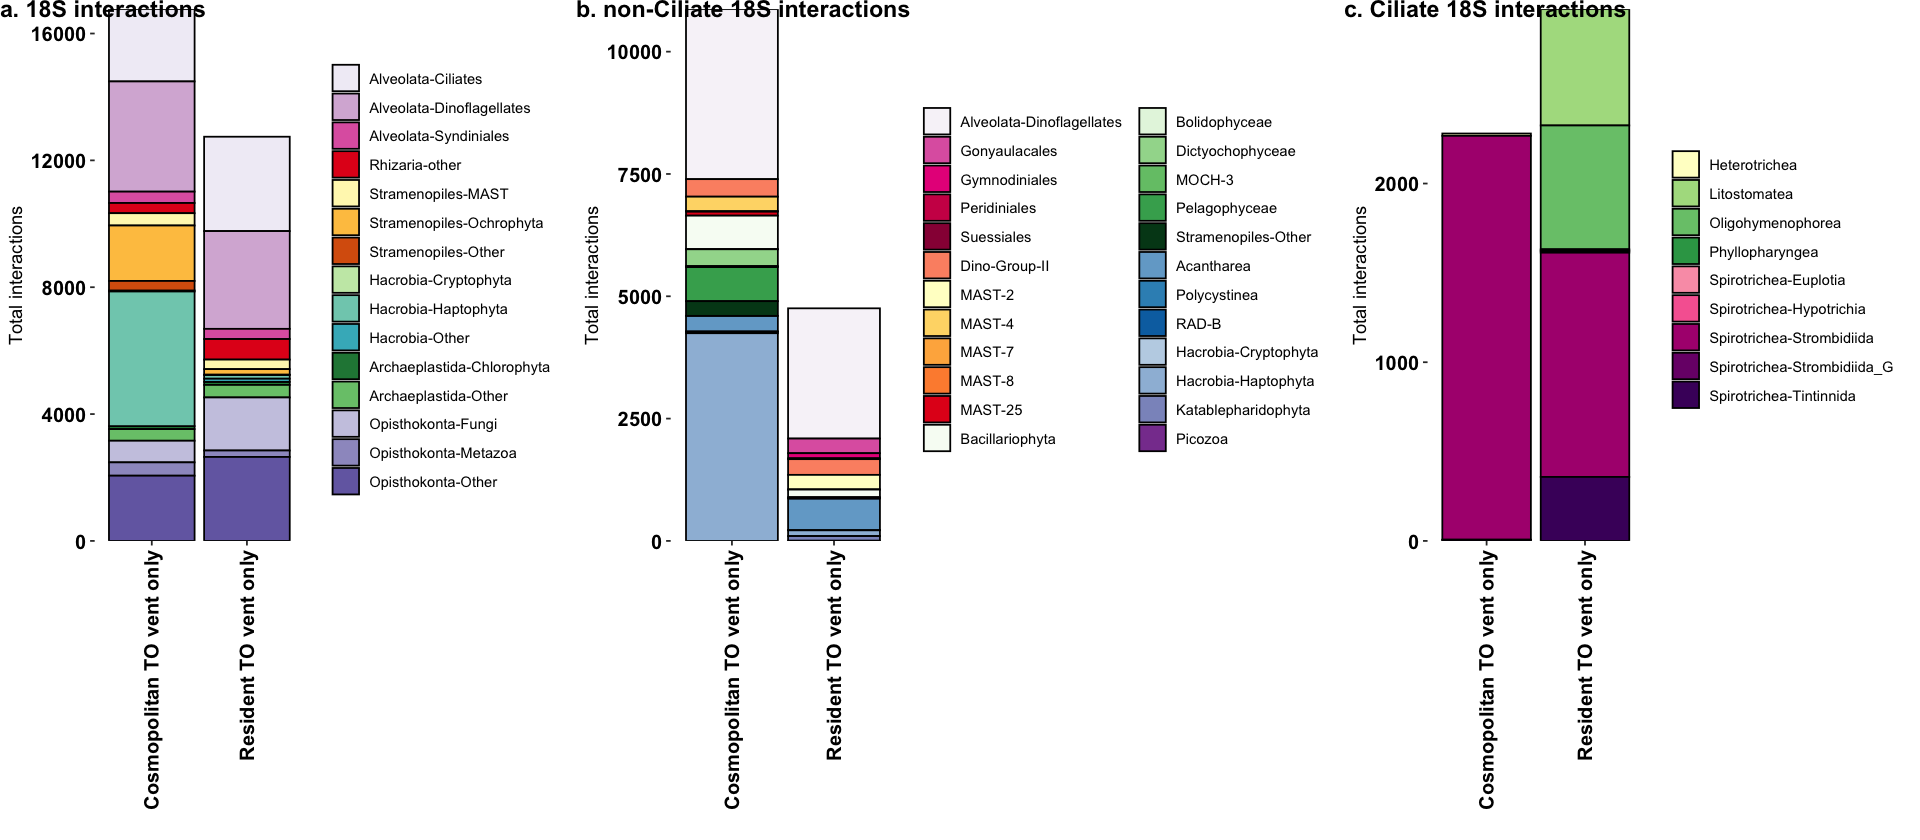

In [177]:
# Plot all together
options(repr.plot.width = 16, repr.plot.height = 7)
plot_grid(taxa_level_int, taxa2_level_int, ciliate_level_int, 
          nrow = 1, rel_widths = c(0.75,1,0.75),
            labels = c("a. 18S interactions", "b. non-Ciliate 18S interactions", "c. Ciliate 18S interactions"),
             hjust = 0, vjust = 1)
# Observations:
# * Overall, more interactions with vent only bacteria in the cosmopolitan protists
# * This is the same when we look at the whole community, but varies within taxonomic groups.

In [64]:
# List of 18S significant interactions with vent-only 16S ASVs
tmp <- taxa_dist_int %>% 
    select(-TAXORDER) %>% 
    pivot_wider(names_from = INT_TYPE, values_from = TOTAL_euk_wcat) %>% 
    data.frame
colnames(tmp)<- c("Taxa", "Cosmo", "Resident")
tmp %>% mutate(HIGHEST_IN = case_when(
    Cosmo > Resident ~ "Cosmo",
    Resident > Cosmo ~ "Resident"))

Taxa                       Cosmo Resident HIGHEST_IN
1  Alveolata-Ciliates         2280  2976     Resident  
2  Alveolata-Dinoflagellates  3475  3083     Cosmo     
3  Alveolata-Syndiniales       358   321     Cosmo     
4  Archaeplastida-Chlorophyta   94    97     Resident  
5  Archaeplastida-Other        367   395     Resident  
6  Hacrobia-Cryptophyta         33    NA     NA        
7  Hacrobia-Haptophyta        4245   120     Cosmo     
8  Hacrobia-Other               NA    99     NA        
9  Opisthokonta-Fungi          682  1673     Resident  
10 Opisthokonta-Metazoa        420   203     Cosmo     
11 Opisthokonta-Other         2057  2648     Resident  
12 Rhizaria-other              322   648     Resident  
13 Stramenopiles-MAST          388   301     Cosmo     
14 Stramenopiles-Ochrophyta   1748   175     Cosmo     
15 Stramenopiles-Other         300     7     Cosmo

In [180]:
colnames(spearman_wtax)

[1] "Feature.ID.18S"    "Feature.ID.16S"    "value"            
 [4] "pval"              "Domain_sideA"      "Phylum_sideA"     
 [7] "Class_sideA"       "Order_sideA"       "Family_sideA"     
[10] "Genus_sideA"       "Species_sideA"     "Domain_sideB"     
[13] "Phylum_sideB"      "Class_sideB"       "Order_sideB"      
[16] "Family_sideB"      "Genus_sideB"       "Species_sideB"    
[19] "NUM_INTERACTIONS"  "dist_18s"          "dist_18s_category"
[22] "Taxa"              "Taxa2"             "Taxon"            
[25] "dist_16s"

## Look at individual ASV level

In [234]:
# Target top ASVs for key categories of interest
# From above: write_delim(gr_topASV_taxa2, path = "supptable-topASVs-taxa2.txt", delim = "\t")
gr_topASV_taxa2 <- read.delim("supptable-topASVs-taxa2.txt")

taxa_of_interest <- c("Spirotrichea-Strombidiida", "Heterotrichea", 
                      "Spirotrichea-Euplotia", "Phyllopharyngea", "Litostomatea", "Oligohymenophorea",
                     "Rhizaria-Cercozoa", "Peridiniales", "Gymnodiniales", "Polycystinea", 
                     "Hacrobia-Cryptophyta", "Chrysophyceae", "MAST-7")

tmp <- gr_topASV_taxa2 %>% 
    filter(Taxa2 %in% taxa_of_interest) %>% 
    filter(!RES_COSMO == "Other") %>% #Remove other category
    data.frame
asvs_of_interest <- as.character(unique(tmp$Feature.ID))
head(asvs_of_interest)
length(asvs_of_interest) #Isolated 70 ASVs to look at further

[1] "b49e108de05dd32605eb0263f9544897" "c5dfc11258658e1ebbbcc832fe0be452"
[3] "76f2f78cd9c0b045697ced09b9380344" "926ea69bba331d539924eeabb644baa4"
[5] "6826f86c77c01fc144324cedaaf6032a" "9aab7e571e72bc162ad8207f8e7e834e"

[1] 70

In [244]:
interactions_by18s <- spearman_wtax %>% 
    filter(Feature.ID.18S %in% asvs_of_interest) %>% 
    select(-dist_18s_category, -dist_16s) %>% 
    unite(Taxon_16S, Domain_sideB:Species_sideB) %>% 
    select(Feature.ID.18S, dist_18s, Taxa, Taxa2, Taxon, Feature.ID.16S, Taxon_16S, NUM_INTERACTIONS, Spearman = value) %>% 
    group_by(dist_18s, Taxa, Taxa2, Taxon, Taxon_16S, Spearman) %>% 
    summarise(Total_significant_interactions = sum(NUM_INTERACTIONS),
             ASVs_18S_IDs = paste(unique(Feature.ID.18S), collapse=","),
             ASVs_16S_IDs = paste(unique(Feature.ID.16S), collapse=",")) %>% 
    data.frame
head(interactions_by18s)
dim(interactions_by18s)
write_delim(interactions_by18s, path = "Interactions_by_taxa_of_interest.txt", delim = "\t")

`summarise()` regrouping output by 'dist_18s', 'Taxa', 'Taxa2', 'Taxon', 'Taxon_16S' (override with `.groups` argument)



dist_18s     Taxa               Taxa2        
1 Cosmopolitan Alveolata-Ciliates Heterotrichea
2 Cosmopolitan Alveolata-Ciliates Heterotrichea
3 Cosmopolitan Alveolata-Ciliates Heterotrichea
4 Cosmopolitan Alveolata-Ciliates Heterotrichea
5 Cosmopolitan Alveolata-Ciliates Heterotrichea
6 Cosmopolitan Alveolata-Ciliates Heterotrichea
  Taxon                                                                                                             
1 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
2 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
3 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
4 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
5 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
6 Eukaryota;Alveolata;Ciliophora;Heterotrichea;Heterotrichea_X;Folliculinidae;Folliculinidae_X;Folliculinidae_X_sp.;
  Taxon_16S                                                                                                                   
1 Archaea_Euryarchaeota_Thermoplasmata_Marine Group II_NA_NA_NA                                                               
2 Archaea_Nanoarchaeaeota_Woesearchaeia_NA_NA_NA_NA                                                                           
3 Bacteria_Aquificae_Aquificae_Aquificales_Aquificaceae_NA_NA                                                                 
4 Bacteria_Bacteroidetes_Bacteroidia_Flavobacteriales_Flavobacteriaceae_NS2b marine group_NA                                  
5 Bacteria_Bacteroidetes_Bacteroidia_Flavobacteriales_Flavobacteriaceae_NS5 marine group_NA                                   
6 Bacteria_Bacteroidetes_Bacteroidia_Flavobacteriales_NS9 marine group_uncultured marine bacterium_uncultured marine bacterium
  Spearman   Total_significant_interactions ASVs_18S_IDs                    
1  0.8601512 1                              ffa3237237107b5e385a22e6a3b0c5da
2 -0.8151238 1                              ffa3237237107b5e385a22e6a3b0c5da
3 -0.8090398 1                              ffa3237237107b5e385a22e6a3b0c5da
4 -0.8747670 1                              ffa3237237107b5e385a22e6a3b0c5da
5 -0.9145292 1                              ffa3237237107b5e385a22e6a3b0c5da
6 -0.8090398 1                              ffa3237237107b5e385a22e6a3b0c5da
  ASVs_16S_IDs                    
1 1ed76496f7f4f65005f625f7135e164d
2 06153859cfe85d3d21603f43f3d168ec
3 0e1960ce45b0da598db6a3194dfde68e
4 0f593c675b5e22484a03323bde0fbe15
5 5e9d27dfbb2c8da6c1a16afa4eac913a
6 439ad8cf53757579bdbf6a82995df944

[1] 4689    9

In [ ]:
interactions_by18s <- spearman_wtax %>% 
    filter(Feature.ID.18S %in% asvs_of_interest) %>% 
    select(-dist_18s_category, -dist_16s) %>% 
    unite(Taxon_16S, Domain_sideB:Species_sideB) %>% 
    select(Feature.ID.18S, dist_18s, Taxa, Taxa2, Taxon, Feature.ID.16S, Taxon_16S, NUM_INTERACTIONS, Spearman = value) %>% 
    group_by(dist_18s, Taxa, Taxa2, Taxon, Taxon_16S, Spearman) %>% 
    summarise(Total_significant_interactions = sum(NUM_INTERACTIONS),
             ASVs_18S_IDs = paste(unique(Feature.ID.18S), collapse=","),
             ASVs_16S_IDs = paste(unique(Feature.ID.16S), collapse=",")) %>% 
    data.frame
head(interactions_by18s)
dim(interactions_by18s)
write_delim(interactions_by18s, path = "Interactions_by_taxa_of_interest.txt", delim = "\t")

In [255]:
colnames(spearman_wtax)

[1] "Feature.ID.18S"    "Feature.ID.16S"    "value"            
 [4] "pval"              "Domain_sideA"      "Phylum_sideA"     
 [7] "Class_sideA"       "Order_sideA"       "Family_sideA"     
[10] "Genus_sideA"       "Species_sideA"     "Domain_sideB"     
[13] "Phylum_sideB"      "Class_sideB"       "Order_sideB"      
[16] "Family_sideB"      "Genus_sideB"       "Species_sideB"    
[19] "NUM_INTERACTIONS"  "dist_18s"          "dist_18s_category"
[22] "Taxa"              "Taxa2"             "Taxon"            
[25] "dist_16s"

In [258]:
interactions_by18s_class <- spearman_wtax %>% 
    filter(Feature.ID.18S %in% asvs_of_interest) %>% 
    select(-dist_18s_category, -dist_16s) %>% 
    unite(Taxon_16S, Domain_sideB:Class_sideB) %>% 
    unite(Order_Family, Order_sideB:Family_sideB) %>% 
    select(dist_18s, Taxa, Taxa2, Taxon_16S, Order_Family, NUM_INTERACTIONS, Spearman = value) %>% 
    group_by(dist_18s, Taxa, Taxa2, Taxon_16S) %>% 
    summarise(Total_significant_interactions = sum(NUM_INTERACTIONS),
             Order_Family_list = paste(unique(Order_Family), collapse=",")) %>% 
    data.frame
head(interactions_by18s_class)
dim(interactions_by18s_class)
write_delim(interactions_by18s_class, path = "Interactions_by_class.txt", delim = "\t")

`summarise()` regrouping output by 'dist_18s', 'Taxa', 'Taxa2' (override with `.groups` argument)



dist_18s     Taxa               Taxa2        
1 Cosmopolitan Alveolata-Ciliates Heterotrichea
2 Cosmopolitan Alveolata-Ciliates Heterotrichea
3 Cosmopolitan Alveolata-Ciliates Heterotrichea
4 Cosmopolitan Alveolata-Ciliates Heterotrichea
5 Cosmopolitan Alveolata-Ciliates Heterotrichea
6 Cosmopolitan Alveolata-Ciliates Heterotrichea
  Taxon_16S                               Total_significant_interactions
1 Archaea_Euryarchaeota_Thermoplasmata    1                             
2 Archaea_Nanoarchaeaeota_Woesearchaeia   1                             
3 Bacteria_Aquificae_Aquificae            1                             
4 Bacteria_Bacteroidetes_Bacteroidia      3                             
5 Bacteria_Cyanobacteria_Oxyphotobacteria 1                             
6 Bacteria_Deinococcus-Thermus_Deinococci 1                             
  Order_Family_list                                                   
1 Marine Group II_NA                                                  
2 NA_NA                                                               
3 Aquificales_Aquificaceae                                            
4 Flavobacteriales_Flavobacteriaceae,Flavobacteriales_NS9 marine group
5 Chloroplast_NA                                                      
6 Thermales_Thermaceae

[1] 625   6

In [249]:
# vent_spec <- c("Sulfurimonas", "Sulfurovum")
monas <- interactions_by18s %>% filter(grepl("Sulfurimonas", Taxon_16S))
table(monas$Taxa2)

ovum <- interactions_by18s %>% filter(grepl("Sulfurovum", Taxon_16S))
table(ovum$Taxa2)


            Gymnodiniales      Hacrobia-Cryptophyta              Litostomatea 
                        5                         6                         8 
                   MAST-7         Oligohymenophorea              Peridiniales 
                        3                        22                         9 
          Phyllopharyngea     Spirotrichea-Euplotia Spirotrichea-Strombidiida 
                        1                         2                        22 


     Hacrobia-Cryptophyta              Litostomatea                    MAST-7 
                        2                         7                         1 
        Oligohymenophorea              Peridiniales           Phyllopharyngea 
                       14                         6                         1 
             Polycystinea     Spirotrichea-Euplotia Spirotrichea-Strombidiida 
                        1                         1                        22 

In [274]:
# vent_spec <- c("Sulfurimonas", "Sulfurovum")
monas <- spearman_wtax %>% filter(grepl("Sulfurimonas", Genus_sideB))
table(monas$Taxa)
table(monas$dist_18s)
ovum <- spearman_wtax %>% filter(grepl("Sulfurovum", Genus_sideB))
table(ovum$Taxa)
table(ovum$dist_18s)


        Alveolata-Ciliates  Alveolata-Dinoflagellates 
                       189                        276 
     Alveolata-Syndiniales Archaeplastida-Chlorophyta 
                        46                         14 
      Archaeplastida-Other       Hacrobia-Cryptophyta 
                        21                          7 
       Hacrobia-Haptophyta             Hacrobia-Other 
                       207                         10 
        Opisthokonta-Fungi       Opisthokonta-Metazoa 
                       164                         41 
        Opisthokonta-Other             Rhizaria-other 
                       238                         36 
        Stramenopiles-MAST   Stramenopiles-Ochrophyta 
                        38                         96 
       Stramenopiles-Other 
                        19 


Cosmopolitan        Other     Resident 
         829           18          555 


        Alveolata-Ciliates  Alveolata-Dinoflagellates 
                       121                        154 
     Alveolata-Syndiniales Archaeplastida-Chlorophyta 
                        33                          1 
      Archaeplastida-Other       Hacrobia-Cryptophyta 
                        13                          2 
       Hacrobia-Haptophyta             Hacrobia-Other 
                       131                          2 
        Opisthokonta-Fungi       Opisthokonta-Metazoa 
                        92                         21 
        Opisthokonta-Other             Rhizaria-other 
                       143                         28 
        Stramenopiles-MAST   Stramenopiles-Ochrophyta 
                        23                         61 
       Stramenopiles-Other 
                        12 


Cosmopolitan        Other     Resident 
         529           15          293 

In [259]:
head(spearman_wtax)

Feature.ID.18S                   Feature.ID.16S                   value     
1 0038478be7fb4f097ce93a5e9341af2a 02e3786b602e7ce1cade04f24c7f3629 -0.8178608
2 0038478be7fb4f097ce93a5e9341af2a 07c652ab78300566d45f2b3f312feca7 -0.8975491
3 0038478be7fb4f097ce93a5e9341af2a 0a4eeac3e2210696bb59c2c803440ca1 -0.7783118
4 0038478be7fb4f097ce93a5e9341af2a 0d490df42ba7534dd774e6a2dad95b93 -0.8076923
5 0038478be7fb4f097ce93a5e9341af2a 103cf8e289fb6995e5a1287c82b4cf74 -0.8461538
6 0038478be7fb4f097ce93a5e9341af2a 139ad7417ef0dfb630699faea2eb5e06 -0.8524367
  pval        Domain_sideA Phylum_sideA Class_sideA Order_sideA Family_sideA
1 0.028691311 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
2 0.011795879 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
3 0.029782145 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
4 0.012949666 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
5 0.005880238 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
6 0.033280264 Eukaryota    Opisthokonta Metazoa     Cnidaria    Cnidaria_X  
  Genus_sideA ⋯ Family_sideB                            
1 Hydrozoa    ⋯ Clade I                                 
2 Hydrozoa    ⋯ NA                                      
3 Hydrozoa    ⋯ Marinimicrobia bacterium SCGC AAA003-E22
4 Hydrozoa    ⋯ Clade II                                
5 Hydrozoa    ⋯ uncultured marine archaeon              
6 Hydrozoa    ⋯ Nitrosopumilaceae                       
  Genus_sideB                             
1 NA                                      
2 NA                                      
3 Marinimicrobia bacterium SCGC AAA003-E22
4 NA                                      
5 uncultured marine archaeon              
6 uncultured marine archaeon              
  Species_sideB                            NUM_INTERACTIONS dist_18s    
1 NA                                       1                Cosmopolitan
2 NA                                       1                Cosmopolitan
3 Marinimicrobia bacterium SCGC AAA003-E22 1                Cosmopolitan
4 NA                                       1                Cosmopolitan
5 uncultured marine archaeon               1                Cosmopolitan
6 uncultured marine archaeon               1                Cosmopolitan
  dist_18s_category                            Taxa                 Taxa2   
1 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
2 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
3 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
4 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
5 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
6 ASV appears in BSW and throughout vent/plume Opisthokonta-Metazoa Cnidaria
  Taxon                                                       dist_16s      
1 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
2 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
3 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
4 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
5 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw
6 Eukaryota;Opisthokonta;Metazoa;Cnidaria;Cnidaria_X;Hydrozoa present in bsw

In [260]:
table(spearman_wtax$dist_18s)


Cosmopolitan        Other     Resident 
       35653          432        30570 

In [272]:
# First filter by the 
all_top_ASVs <- as.character(unique(gr_topASV_taxa2$Feature.ID))

tmp <- spearman_wtax %>% 
    filter(Feature.ID.18S %in% all_top_ASVs) %>% 
    select(Feature.ID.16S, Taxa, dist_18s) %>% 
    add_column(COUNT = 1) %>% 
    pivot_wider(names_from = dist_18s, values_from = COUNT, values_fn = sum, values_fill = 0) %>% 
    mutate(category_16s = case_when(
        (Cosmopolitan != 0 & Resident != 0) ~ "BOTH",
        (Cosmopolitan != 0 & Resident == 0) ~ "COSMO ONLY",
        (Cosmopolitan == 0 & Resident != 0) ~ "RESIDENT ONLY")) %>% 
    data.frame
head(tmp)
table(tmp$category_16s)
tmp2 <- select(tmp, Taxa, category_16s)
table(tmp2)

Feature.ID.16S                   Taxa                     Cosmopolitan
1 0f593c675b5e22484a03323bde0fbe15 Stramenopiles-Ochrophyta 2           
2 12c4cf4a9b6a4541ef111f02191bae96 Stramenopiles-Ochrophyta 3           
3 144935e2e65353d33c3b4d2249fb9313 Stramenopiles-Ochrophyta 2           
4 1705b03d7545991e3ed7bb67827dc17f Stramenopiles-Ochrophyta 1           
5 2ed7d51e061664183c05fbbb56c0787e Stramenopiles-Ochrophyta 2           
6 2f64137e04bfef3d66655ceddc601602 Stramenopiles-Ochrophyta 1           
  Resident category_16s
1 0        COSMO ONLY  
2 0        COSMO ONLY  
3 0        COSMO ONLY  
4 0        COSMO ONLY  
5 0        COSMO ONLY  
6 0        COSMO ONLY


         BOTH    COSMO ONLY RESIDENT ONLY 
         3391          9064          3964 

                            category_16s
Taxa                         BOTH COSMO ONLY RESIDENT ONLY
  Alveolata-Ciliates         1205        551           597
  Alveolata-Dinoflagellates   687        458           489
  Alveolata-Syndiniales         8        423          1113
  Archaeplastida-Chlorophyta   99         19            55
  Archaeplastida-Other          0       1281             0
  Hacrobia-Cryptophyta          0         57             0
  Hacrobia-Haptophyta           0        750             0
  Hacrobia-Other                8        180           272
  Opisthokonta-Fungi           28        698           424
  Opisthokonta-Metazoa          9        870           141
  Opisthokonta-Other           36       1356            85
  Rhizaria-other              973        235           615
  Stramenopiles-MAST          285        217            24
  Stramenopiles-Ochrophyta     52       1647           115
  Stramenopiles-Other           1        322            34

In [233]:
# spearman_wtax  %>% filter(Taxa == "Alveolata-Ciliates") %>% select(Taxa, Taxa2) %>% distinct()
# ciliate1 <- c("Spirotrichea-Strombidiida", "Heterotrichea")
# ciliate2 <- c("Spirotrichea-Euplotia", "Phyllopharyngea", "Litostomatea")

In [245]:
# # Overall:
# ciliate_widespread <- spearman_wtax %>% 
#     filter(Taxa2 %in% ciliate1) %>% 
# #     unite(bac, Domain_sideB:Phylum_sideB) %>% 
# #     unite(euk, Domain_sideA:Family_sideA) %>% 
# #     group_by(bac, Taxa2, dist_18s, dist_16s) %>% 
#     group_by(Domain_sideB, Taxa2, dist_18s, dist_16s) %>% 
#     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     arrange(Taxa2, desc(TOTAL)) %>% 
#     data.frame
# ciliate_widespread; dim(ciliate_widespread)
# colnames(ciliate_widespread)

In [246]:
# # # Sort by highest ASVs of resident and ubiquitous 
# # # ciliate1 <- c("Spirotrichea-Strombidiida", "Heterotrichea")
# # # Includes ubiquitious and resident ASVs"
# # euplotia <- c("cb041dbc73427574182e7eb9298d7882","76095e6eba731c2c1f3a6a75117b382f","a01056c22ed5e17aaf9c21cc12022414","1c19952ff101ef7c2ceb851feae4b131","7d2b388258ff034982c71ec28bee03ec","ebefbd02d4253133d954f42cc650d526")
# # ciliate_euplotia <- spearman_wtax %>% 
# #     filter(Feature.ID.18S %in% euplotia) %>% 
# #     unite(bac, Domain_sideB:Species_sideB) %>% 
# #     group_by(bac, Taxon, dist_18s) %>% 
# #     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
# #     arrange(Taxon, desc(TOTAL)) %>%
# #     data.frame
# # ciliate_euplotia
# # length(unique(ciliate_euplotia$bac))

# # Sort by highest ASVs of resident and ubiquitous 
# spiro_strom <- c("1ec57dbba9f08644c82c8993cc0be047","c5ffc66b15459f2709fa625c42de4981","db38f1b47bbe57241030f94f3cab84cd","2133fc07124882f822e01d15c48278fb","a14505f55d873fb93fecfd9140f81536","498d3bb1bcd42777848393150e589913","438bc168743a3690175c3fe66d765a30","ba4c49aeaa9be5513f80dbee759d224d","5dec2d9b1e393dfde569293f7d3c2c0f","0dfe7a9e677ce342589fbd789438995a","f6ec8a341098724a8b61989aa15f7362")
# ciliate_sprio_strom <- spearman_wtax %>% 
#     filter(Feature.ID.18S %in% spiro_strom) %>% 
#     unite(bac, Domain_sideB:Species_sideB) %>% 
#     group_by(bac, Taxon, dist_18s) %>% 
#     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     arrange(Taxon, desc(TOTAL)) %>%
#     data.frame
# ciliate_sprio_strom
# length(unique(ciliate_sprio_strom$bac)) #681 different 16S ASVs for these 5 ASVs

# heterotricha <- c("ffa3237237107b5e385a22e6a3b0c5da","45179451a08aee512273351a4ba50dbd","d18acede8e1e5054e57937f1577522c3","bbfa5f360e190ba2aa7fb18cf39d2ebc","3e11d2b8f63b1e96c99ac18089b6a6b6")
# ciliate_heterot <- spearman_wtax %>% 
#     filter(Feature.ID.18S %in% heterotricha) %>% 
#     unite(bac, Domain_sideB:Species_sideB) %>% 
#     group_by(bac, Taxon, dist_18s) %>% 
#     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     arrange(Taxon, desc(TOTAL)) %>%
#     data.frame
# ciliate_heterot
# length(unique(ciliate_heterot$bac)) #681 different 16S ASVs for these 5 ASVs

# lito <- c("a3a866756aa4943b2f4dfbf95badcab0","783097719b24fd32a5841b664b16d5cc","4405eb9f81b16ceb9f9bbb5ee8781610","9317251391914b00918e11d897f15a65","b4e1bd5eac322b803425414f19938cd6","9f2432816fa15ffbfd7998afdc0963df","de63aada9b79bc1eaf8147700655391f","0d48f7bdac06ddad230afb4f6682e106","985d2b4ff158899383b56e4a02f76d02")
# # Overall number of interactions based on taxonomic ID
# taxa2_litostome <- spearman_wtax %>% 
#     filter(Feature.ID.18S %in% lito) %>% 
#     unite(bac, Domain_sideB:Species_sideB) %>% 
#     group_by(bac, Taxon, dist_18s) %>% 
#     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     arrange(Taxon, desc(TOTAL)) %>% 
#     data.frame
# dim(taxa2_litostome)
# head(taxa2_litostome)

# cerco <- c("b3e1c54a1d53227eab2686268ebfcec4","0f23b01956435ad0b1d6b9899166125e","fb8951ee6d0b0a91b24c8a3ab0f2f9af")
# taxa2_cerco <- spearman_wtax %>% 
#     filter(Feature.ID.18S %in% cerco) %>% 
#     unite(bac, Domain_sideB:Species_sideB) %>% 
#     group_by(bac, Taxon, dist_18s) %>% 
#     summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     arrange(Taxon, desc(TOTAL)) %>% 
#     data.frame
# dim(taxa2_cerco)
# head(taxa2_cerco)

In [ ]:
# head(countbac_df[1:2,])
#
bac_asvs <- countbac_df %>% 
    rownames_to_column(var = "Feature.ID.16S") %>% 
    select(Feature.ID.16S, Domain, Phylum, Class, Order, Family, Genus, Species) %>% 
    data.frame
head(bac_asvs)

In [ ]:
# Combine ASV tax and category information with correlation output
spearman_16s_18s <- CLR_sig_interactions_wtax_filtered %>% 
    separate(sideA, c("euk", "Feature.ID.18S"), sep = "_") %>% 
    separate(sideB, c("prok", "Feature.ID.16S"), sep = "_") %>% 
    select(-euk, -prok, -INTERACTION) %>% 
    left_join(gr_tax_target_corr, by = c("Feature.ID.18S" = "Feature.ID")) %>% 
    left_join(bac_asvs) %>% 
    data.frame
head(spearman_16s_18s[1:2,])
colnames(spearman_16s_18s)

In [ ]:
# Sum by 16S, based on resident or cosmopolitan protist populations
dist_bac <- spearman_16s_18s %>% 
    group_by(Domain, Phylum, RES_COSMO) %>% 
    summarise(Total = sum(NUM_INTERACTIONS)) %>% 
    data.frame
# head(dist_bac)
#
options(repr.plot.width = 12, repr.plot.height = 8)
#
# svg("bacteria-res-cosmo.svg", w=12, h=8)
ggplot(filter(dist_bac, !(RES_COSMO == "Other")), aes(x = RES_COSMO, y = Total, fill = Phylum)) +
    geom_bar(stat="identity", position="stack", color="black") +
    scale_y_continuous(expand = c(0,0))+
    theme(legend.position = "right",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          panel.background = element_blank(),
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, color = "black", face="bold", size = 12),
          axis.text.y = element_text(color="black", face="bold", size = 12),
#           strip.text = element_blank(),
          legend.title = element_blank()) +
    labs(x="", y="Total interactions") +
    facet_wrap(Domain~., scales = "free")
# dev.off()

In [ ]:
library(corrplot)

In [ ]:
# Requires input of group A as rownames and group B as column head.
# Numerics are spearman

In [ ]:
# head(CLR_sig_interactions_wtax_filtered[1:2,])

vent_spec <- c("Sulfurimonas", "Sulfurovum")

mat_subset <- CLR_sig_interactions_wtax_filtered %>% 
    filter(Genus_sideB %in% vent_spec) %>% 
    filter(!(Phylum_sideA == "Opisthokonta")) %>% 
    group_by(Genus_sideB, Species_sideB) %>% 
    summarise(TOTAL = sum(NUM_INTERACTIONS)) %>% 
#     filter(abs(value) > 0.6) %>% 
#     unite(A, sideA, Genus_sideA, sep = "_") %>% 
#     unite(B, sideB, Genus_sideB, sep = "_") %>% 
#     select(A, B, value) %>% 
#     pivot_wider(names_from = B, values_from = value, values_fill = list(value = 0)) %>% 
#     column_to_rownames(var = "A") %>% 
    data.frame
# class(mat_subset)
range(mat_subset$TOTAL)
# If I select Genus and Species of vent Sulfurimonas with over 100 interactions, how many am I looking at?
length(unique(mat_subset$Species_sideB))
mat_subset

In [ ]:
# Select list of Sulfurimonas ASVs and then Sulfurovum ASVs that are listed to species level
## c("Sulfurimonas", "Sulfurovum")
tmp <- CLR_sig_interactions_wtax_filtered %>% 
    filter(Genus_sideB == "Sulfurimonas") %>% 
    filter(!(Phylum_sideA == "Opisthokonta")) %>% 
    filter(!(is.na(Species_sideB))) %>% 
#     separate(sideB, c("prok", "Feature.ID.16S"), sep = "_") %>% 
    data.frame
monas <- as.character(unique(tmp$sideB))
length(monas)
#
tmp <- CLR_sig_interactions_wtax_filtered %>% 
    filter(Genus_sideB == "Sulfurovum") %>% 
    filter(!(Phylum_sideA == "Opisthokonta")) %>% 
    filter(!(is.na(Species_sideB))) %>% 
#     separate(sideB, c("prok", "Feature.ID.16S"), sep = "_") %>% 
    data.frame
ovum <- as.character(unique(tmp$sideB))
length(ovum)

monas;ovum

In [ ]:
load("data-input/sig-spear-filtered.RData")

In [ ]:
# head(sig_spear_filtered)
monas_plot <- sig_spear_filtered %>% 
    filter(sideB %in% monas | sideB %in% ovum) %>% 
    select(-INTERACTION) %>% 
    pivot_wider(names_from = sideB, values_from = value, values_fill = list(value = 0)) %>% 
    column_to_rownames(var = "sideA") %>% 
    data.frame

monas_plot_mat <- as.matrix(monas_plot)

head(monas_plot_mat); dim(monas_plot_mat)

# corrplot(monas_plot_mat, method="circle", tl.col="black", tl.pos = "n")

In [ ]:
# For taxa2 groupings, what are the top 10 ASVs in the correlation results? (most frequent)
# Import top ASVs
topasv <- read.delim("supptable-topASVs-taxa2.txt")
head(topasv)
# Include in the supplementary table????
# Subset 16S ASVs that correspond, add to this table and re-make supplementary table

In [ ]:
# Top ASVs for all taxonomic groups, what are corresponding interactions?
topASVs_wSpearman <- CLR_sig_interactions_wtax_filtered %>% 
    separate(sideA, c("euk", "Feature.ID.18S"), sep = "_") %>% 
    separate(sideB, c("prok", "Feature.ID.16S"), sep = "_") %>% 
    select(-euk, -prok, -INTERACTION) %>% 
    right_join(topasv, by = c("Feature.ID.18S" = "Feature.ID")) %>% 
    select(-ends_with("_sideA")) %>% 
    data.frame
head(topASVs_wSpearman[1:2,])
dim(topasv); dim(topASVs_wSpearman)
colnames(topASVs_wSpearman)

In [ ]:
#
# How else can I explore the top protistan ASVs??
#

In [ ]:
# Ciliates:
# Isolate resident 18S ASVs from Ciliates, esp. 
# Spirotrichea-Strombidiida and Heterotrichea- compare resident vs cosmo?
# For resident - Spirotrichea-Strombiidiida, Oligohymenophorea, Spirotrichea-Euplotia, and Litostomatea
head(spearman_wtax[1:2,])
# Ciliate


In [ ]:
# Stramenopiles:
## MAST were cosmopolitan, what were their main 16S putative prey??
## resident stramenopiles? 

## Cercozoa! Specifically resident???
# Other Rhizaria?

# Hacrobia

In [ ]:
## Subsample vent-endemic 16S ASVs, what is the composition of 18S ASVs?

## Explore correlation results
* What is the overall taxonomic composition of 18S ASVs that were significantly correlated with the 16S ASVs? Specifically, wanting to look at broad level, because I want to know Unassigned and Opisthokonts. Then, hopefully, can remove these for downstream analyses
* What is the overall taxonomic composition of 18S ASVs that were significant correlated to 16S ASVs with respect to Resident vs. Cosmopolitan?

## Clustering of all samples - include replicates

In [ ]:
# Dendrogram - supplementary - demonstrate how all samples cluster (include replicates)
load("data-input/GordaRidge-ASVtable-avg-22-07-2020.RData", verbose = T)
gr_counts_dendro <- gr_counts_avg_wtax %>%
  unite("SAMPLE", Sampletype, LocationName, LOCATION_SPECIFIC, SAMPLEID, sep = "_", remove = FALSE) %>%
  select(Feature.ID, SAMPLE, COUNT_AVG) %>%
  pivot_wider(names_from = SAMPLE, values_from = COUNT_AVG, values_fill = list(COUNT_AVG = 0)) %>%
  column_to_rownames(var = "Feature.ID") %>%
  data.frame
head(gr_counts_dendro[1:2,])

In [ ]:
library(vegan); library(ggdendro)
# Dendrogram with all samples:
gr_clust <- hclust(vegdist(t(gr_counts_dendro), method = "jaccard"), method = "complete")
all <- ggdendrogram(gr_clust, rotate = TRUE, size = 3, face = "bold")

In [ ]:
# Average across replicates
gr_all_avg <- gr_counts_avg_wtax %>%
  unite("SAMPLE", LocationName, SAMPLEID, sep = "_", remove = FALSE) %>%
  group_by(SAMPLE, Feature.ID) %>%
  summarise(AVG_insitu = mean(COUNT_AVG)) %>%
  select(Feature.ID, SAMPLE, AVG_insitu) %>%
  pivot_wider(names_from = SAMPLE, values_from = AVG_insitu, values_fill = list(AVG_insitu = 0)) %>%
  column_to_rownames(var = "Feature.ID") %>%
  data.frame
gr_clust_all_avg <- hclust(vegdist(t(gr_all_avg), method = "jaccard"), method = "average")
avg <- ggdendrogram(gr_clust_all_avg, rotate = TRUE, size = 10)
# avg
#
# Plot together as supplementary figure
options(repr.plot.width = 12, repr.plot.height = 8)

plot_grid(all, avg, labels = c("a","b"))

In [ ]:
# Dendrogram of only in situ samples
options(repr.plot.width = 4, repr.plot.height = 5)
gr_clust_insitu_avg <- hclust(vegdist(t(gr_insitu_avg), method = "jaccard"), method = "complete")
ggdendrogram(gr_clust_insitu_avg, rotate = TRUE, size = 10)

In [275]:
library(devtools)
install_github("zdk123/SpiecEasi")
library(SpiecEasi)

Loading required package: usethis




huge         (NA          -> 1.3.4.1    ) [CRAN]
VGAM         (NA          -> 1.1-3      ) [CRAN]
glmnet       (4.0         -> 4.0-2      ) [CRAN]
Rcpp         (1.0.4.6     -> 1.0.5      ) [CRAN]
RcppArmad... (0.9.880.1.0 -> 0.9.900.2.0) [CRAN]


Skipping 1 packages not available: pulsar

Installing 6 packages: huge, pulsar, VGAM, glmnet, Rcpp, RcppArmadillo



ERROR: Error: Failed to install 'SpiecEasi' from GitHub:
  (converted from warning) package ‘pulsar’ is not available (for R version 3.6.1)


## END ##
Last updated SKH - 27-July-2020